<a href="https://colab.research.google.com/github/meeshu/disruptions/blob/main/disruptions_goals_smallmultiples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

!pwd
from google.colab.data_table import DataTable
DataTable.max_columns = 30

/content


### **data cleaning**

In [ ]:
# @title
#importing data from github. switched from google drive.
#url= 'https://raw.githubusercontent.com/meeshu/disruptions/refs/heads/main/data/Survey%20data%20-%20all-participants-coding-alpha.csv' # Changed url to raw data url
# using beta coding data file
#url = 'https://raw.githubusercontent.com/meeshu/disruptions/refs/heads/main/data/Survey%20data%20-%20all-participants-coding-beta.csv'
# using gamma coding data file
url = 'https://raw.githubusercontent.com/meeshu/disruptions/refs/heads/main/data/Survey%20data%20-%20all-participants-coding-gamma.csv'

df=pd.read_csv(url)
df.head()

,pid,old-pid,gid,unique gid,goaldisrupted,old-cid,goal-statement,Goal categories,cid,uniquecid,...,Disruption labor produced.2,affect-goal: how did circumstance affect your goal? (answer only if,change- how did you change your goal in response to circumstance,Goal changes,notes.2,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,S01,S01,goal1,S01goal1,"S01goal2, S01goal4",circ1,Financial independence,Financial Stability/Safety,circ1,S01goal1circ1,...,NaN,I live far away from opportunities/ There are ...,I have shifted to trying to find work online,Substituted activity,NaN,NaN,NaN,NaN,NaN,NaN
1,S01,S01,goal1,S01goal1,NaN,circ2,Financial independence,Financial Stability/Safety,circ2,S01goal1circ2,...,NaN,I feel things are hopeless,"If I were more motivated, I could be more fina...",Abandoned,NaN,NaN,NaN,NaN,NaN,NaN
2,S01,S01,goal1,S01goal1,NaN,circ3,Financial independence,Financial Stability/Safety,circ3,S01goal1circ3,...,NaN,I cannot stand or walk much,"I have to work more from home, but my level of...",Other,NaN,NaN,NaN,NaN,NaN,NaN
3,S01,S01,goal2,S01goal2,NaN,circ1,Quell fears,Mental health and wellbeing,circ1,S01goal2circ1,...,NaN,I am fearful of the enemy (his father),I made an appt with a dr despite wanting to ha...,Changed/ adopted support,NaN,NaN,NaN,NaN,NaN,NaN
4,S01,S01,goal2,S01goal2,NaN,circ2,Quell fears,Mental health and wellbeing,circ2,S01goal2circ2,...,NaN,Fearful I won't be able to sell home if I tried,I have to trust the universe/God,No change,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# @title
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.rstrip()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df = df.drop(columns=['old-pid'])
df = df.drop(columns=['old-cid'])
df['disruption_labor_aggregated'] = df[['disruption_labor_produced',
                                                          'disruption_labor_produced.1',
                                                          'disruption_labor_produced.2']].apply(
    lambda row: ', '.join(row.dropna().astype(str)), axis=1)


In [ ]:
# @title
df['pid*gid'] = df['pid'] + "*" + df['gid']
df['pid*gid*cid'] = df['pid'] + "*" + df['gid'] + "*" + df['cid']

In [ ]:
# @title
df['how-long'] = df['how-long'].apply(
    lambda x: "No disruption" if isinstance(x, str) and "no disruption" in x else x
)
df['disruption_status'] = df.apply(
    lambda x: 'No Disruption' if (x['situation_that_occurred'] == "No disruption")
    or(x['disruption_labor_aggregated'] in ["No labor- positive disruption"])
    or (x['how-long'] in ["No disruption"])
    else 'Disruption', axis=1)

df

,pid,gid,unique_gid,goaldisrupted,goal-statement,goal_categories,cid,uniquecid,goal_scope,rep-id,...,disruption_labor_produced.1,disruption_labor_produced.2,affect-goal:_how_did_circumstance_affect_your_goal?_(answer_only_if,change-_how_did_you_change_your_goal_in_response_to_circumstance,goal_changes,notes.2,disruption_labor_aggregated,pid*gid,pid*gid*cid,disruption_status
0,S01,goal1,S01goal1,"S01goal2, S01goal4",Financial independence,Financial Stability/Safety,circ1,S01goal1circ1,Long term,NaN,...,NaN,NaN,I live far away from opportunities/ There are ...,I have shifted to trying to find work online,Substituted activity,NaN,No response,S01*goal1,S01*goal1*circ1,Disruption
1,S01,goal1,S01goal1,NaN,Financial independence,Financial Stability/Safety,circ2,S01goal1circ2,Long term,NaN,...,NaN,NaN,I feel things are hopeless,"If I were more motivated, I could be more fina...",Abandoned,NaN,Emotional,S01*goal1,S01*goal1*circ2,Disruption
2,S01,goal1,S01goal1,NaN,Financial independence,Financial Stability/Safety,circ3,S01goal1circ3,Long term,NaN,...,NaN,NaN,I cannot stand or walk much,"I have to work more from home, but my level of...",Other,NaN,Physical,S01*goal1,S01*goal1*circ3,Disruption
3,S01,goal2,S01goal2,NaN,Quell fears,Mental health and wellbeing,circ1,S01goal2circ1,Aspirational,r1,...,NaN,NaN,I am fearful of the enemy (his father),I made an appt with a dr despite wanting to ha...,Changed/ adopted support,NaN,Emotional,S01*goal2,S01*goal2*circ1,Disruption
4,S01,goal2,S01goal2,NaN,Quell fears,Mental health and wellbeing,circ2,S01goal2circ2,Aspirational,r2,...,NaN,NaN,Fearful I won't be able to sell home if I tried,I have to trust the universe/God,No change,NaN,Emotional,S01*goal2,S01*goal2*circ2,Disruption
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,S149,goal1,S149goal1,NaN,Save money for a newer car,Shopping,circ2,S149goal1circ2,Long term,NaN,...,Financial,Logistical,"Well, instead of spending $45 on pads and $60-...",Instead of putting away $200 from my paycheck ...,Skipped,NaN,"Emotional, Financial, Logistical",S149*goal1,S149*goal1*circ2,Disruption
685,S149,goal1,S149goal1,NaN,Save money for a newer car,Shopping,circ3,S149goal1circ3,Long term,NaN,...,NaN,NaN,Instead of paying $32.99 I had to spend $55.99...,I had to be realistic and had to add more time...,Changed quantity,NaN,Emotional,S149*goal1,S149*goal1*circ3,Disruption
686,S149,goal1,S149goal1,NaN,Save money for a newer car,Shopping,circ4,S149goal1circ4,Long term,NaN,...,NaN,NaN,"Well, instead of paying a fair price withing m...",I had to call around and ask everyone if they ...,Changed quantity,NaN,Emotional,S149*goal1,S149*goal1*circ4,Disruption
687,S149,goal2,S149goal2,NaN,workout 3-4 times a week,Physical Activity,circ1,S149goal2circ1,Medium term,NaN,...,Emotional,NaN,it's hard to put weight on my leg when it's al...,I twisted my knee and was unable to walk strai...,Paused,changed to paused from substituted activity- t...,"Physical, Emotional",S149*goal2,S149*goal2*circ1,Disruption


# well-being goals only

In [ ]:
df_wellbeing = df[['pid','pid*gid','pid*gid*cid','duplicate?','goal_categories', 'barrier_or_event', 'situation_that_occurred', 'disruption_status']]
# filter out disruption_status = Disruption
df_wellbeing = df_wellbeing[df_wellbeing['disruption_status'] == 'Disruption']
#filter out goal_categories == 'Financial Stability/Safety', 'Housing', 'Work/Career', 'Education/Learning'
df_wellbeing = df_wellbeing[~df_wellbeing['goal_categories'].isin(['Financial Stability/Safety', 'Housing', 'Work/Career', 'Education/Learning'])]
df_wellbeing

,pid,pid*gid,pid*gid*cid,duplicate?,goal_categories,barrier_or_event,situation_that_occurred,disruption_status
3,S01,S01*goal2,S01*goal2*circ1,No,Mental health and wellbeing,event,Social interactions - negative,Disruption
4,S01,S01*goal2,S01*goal2*circ2,No,Mental health and wellbeing,barrier,Finances,Disruption
5,S01,S01*goal2,S01*goal2*circ3,No,Mental health and wellbeing,barrier,Social interactions - negative,Disruption
6,S01,S01*goal2,S01*goal2*circ4,No,Mental health and wellbeing,event,Weather,Disruption
7,S01,S01*goal2,S01*goal2*circ5,No,Mental health and wellbeing,event,Finances,Disruption
...,...,...,...,...,...,...,...,...
684,S149,S149*goal1,S149*goal1*circ2,No,Shopping,event,Finances,Disruption
685,S149,S149*goal1,S149*goal1*circ3,No,Shopping,event,Finances,Disruption
686,S149,S149*goal1,S149*goal1*circ4,No,Shopping,event,Social interaction - other,Disruption
687,S149,S149*goal2,S149*goal2*circ1,No,Physical Activity,event,Pain,Disruption


### how many participants and how many goals

In [ ]:
# count of unique pid in df_wellbeing
df_wellbeing['pid'].nunique()

136

In [ ]:
# count of unique pid*gid in df_wellbeing
df_wellbeing['pid*gid'].nunique()

272

### non-well-being goals participants and goal count

In [ ]:
df_nonwellbeing = df[['pid','pid*gid','pid*gid*cid','duplicate?','goal_categories', 'barrier_or_event', 'situation_that_occurred', 'disruption_status']]
# filter out disruption_status = Disruption
df_nonwellbeing = df_nonwellbeing[df_nonwellbeing['disruption_status'] == 'Disruption']
#filter out goal_categories == 'Financial Stability/Safety', 'Housing', 'Work/Career', 'Education/Learning'
df_nonwellbeing = df_nonwellbeing[df_nonwellbeing['goal_categories'].isin(['Financial Stability/Safety', 'Housing', 'Work/Career', 'Education/Learning'])]
# count of unique pid in df_wellbeing
df_nonwellbeing['pid'].nunique()

87

# all goal types

## num of goals and num of disruptions by goal category analysis

### **#goals for each goal type**

**How many goals were reported under each type of goal category?**


* goal categories with count of goals- per participant per goal statement (Number of goals (gid) under each goal category)
  * **DONE** - Table
  * **DONE** - Bar chart   
* **YES** - unique Identifier for each goal: gid*pid
* **TRUE** - Validation- sum of all goals should be 433


In [ ]:
# @title
# Number of goals (gid) under each goal category

# Identifier: gid*pid

df_goalcategories = df[['pid', 'gid', 'pid*gid', 'goal-statement', 'goal_categories']]

goals_each_category = df_goalcategories.drop_duplicates(subset = 'pid*gid')

pivot_table = goals_each_category.pivot_table(index='goal_categories', aggfunc='size', fill_value=0)

goals_each_category = pivot_table.reset_index()

goals_each_category.rename(columns={0: 'count of goals'}, inplace=True)

goals_each_category.sort_values(by='count of goals', ascending=False, inplace=True)

goals_each_category_graph = goals_each_category

# Calculate the total count
total_count = goals_each_category['count of goals'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'goal_categories': ['Total'], 'count of goals': [total_count]})

# Concatenate the original DataFrame and the total row
goals_each_category = pd.concat([goals_each_category, total_row], ignore_index=True)

In [ ]:
# @title
goals_each_category

,goal_categories,count of goals
0,Physical Activity,71
1,Mental health and wellbeing,63
2,Financial Stability/Safety,53
3,Weight management,39
4,Work/Career,34
5,Nutrition,34
6,Social connection,33
7,Housing,20
8,Recreation,17
9,Education/Learning,17


### for manuscript- goal categories combines

health: combining physical activity, mental health and well-being, weight management, nutrition, health-other, sobriety

finances: financial stability/ safety, shopping, housing, recreation

Work/education:

social connection:

cleaning/organizing

Other: other, screentime

In [ ]:
# Number of goals (gid) under each goal category

# Identifier: gid*pid

df_goalcategories = df[['pid', 'gid', 'pid*gid', 'goal-statement', 'goal_categories']]
df_goalcategories_combined = df[['pid', 'gid', 'pid*gid', 'goal-statement', 'goal_categories']]

#creating new dataframe for combined categories
df_goalcategories_combined['goal_categories'] = df_goalcategories['goal_categories'].replace({
    'Manage chronic condition': 'Health',
    'Sleep': 'Health',
    'Physical Activity': 'Health',
    'Mental health and wellbeing': 'Health',
    'Weight management': 'Health',
    'Nutrition': 'Health',
    'Health - other': 'Health',
    'Financial Stability/Safety': 'Finances',
    'Shopping': 'Finances',
    'Housing': 'Finances',
    'Work/Career': 'Career/Education',
    'Education/Learning': 'Career/Education',
    'Screentime management': 'Other',
    'Cleaning/organizing' : 'Other',
    'Social connection':'Relationship',
    'Recreation': 'Finances',
    'Sobriety': 'Health'
})

goals_each_category = df_goalcategories_combined.drop_duplicates(subset = 'pid*gid')

pivot_table = goals_each_category.pivot_table(index='goal_categories', aggfunc='size', fill_value=0)

goals_each_category = pivot_table.reset_index()

goals_each_category.rename(columns={0: 'count of goals'}, inplace=True)

goals_each_category.sort_values(by='count of goals', ascending=False, inplace=True)

goals_each_category_graph = goals_each_category

# Calculate the total count
total_count = goals_each_category['count of goals'].sum()

# Create a new DataFrame for the total row
total_row = pd.DataFrame({'goal_categories': ['Total'], 'count of goals': [total_count]})

# Concatenate the original DataFrame and the total row
goals_each_category = pd.concat([goals_each_category,total_row], ignore_index=True)

goals_each_category

/tmp/ipython-input-2073934354.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goalcategories_combined['goal_categories'] = df_goalcategories['goal_categories'].replace({


,goal_categories,count of goals
0,Health,228
1,Finances,99
2,Career/Education,51
3,Relationship,33
4,Other,15
5,Total,426


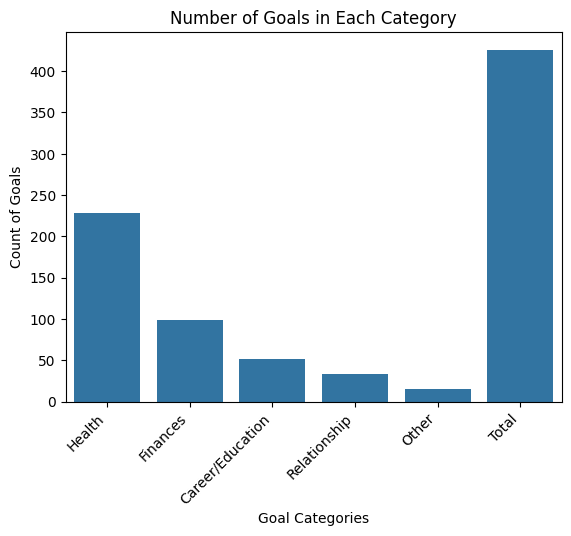

In [ ]:
# prompt: Using dataframe goals_each_category: create a bar chart using seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar chart using seaborn
sns.barplot(x='goal_categories', y='count of goals', data=goals_each_category)

# Add labels and title
plt.xlabel("Goal Categories")
plt.ylabel("Count of Goals")
plt.title("Number of Goals in Each Category")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


## health and well-being goals only

In [ ]:
# Number of goals (gid) under each goal category

# Identifier: gid*pid

df_goalcategories = df[['pid', 'gid', 'pid*gid', 'goal-statement', 'goal_categories']]
df_wellbeing_goalcategories_combined = df[['pid', 'gid', 'pid*gid', 'goal-statement', 'goal_categories']]

#creating new dataframe for combined categories
df_wellbeing_goalcategories_combined['goal_categories'] = df_goalcategories['goal_categories'].replace({
    'Manage chronic condition': 'Health',
    'Sleep': 'Health',
    'Physical Activity': 'Health',
    'Mental health and wellbeing': 'Health',
    'Weight management': 'Health',
    'Nutrition': 'Health',
    'Health - other': 'Health',
    'Financial Stability/Safety': 'Finances',
    'Shopping': 'Finances',
    'Housing': 'Finances',
    'Work/Career': 'Career/Education',
    'Education/Learning': 'Career/Education',
    'Screentime management': 'Other',
    'Cleaning/organizing' : 'Other',
    'Social connection':'Relationship',
    'Recreation': 'Finances',
    'Sobriety': 'Health'
})

# filter out rows where goal_categories == Finances and Work/Education
df_wellbeing_goalcategories_combined = df_wellbeing_goalcategories_combined[df_wellbeing_goalcategories_combined['goal_categories'] != 'Finances']
df_wellbeing_goalcategories_combined = df_wellbeing_goalcategories_combined[df_wellbeing_goalcategories_combined['goal_categories'] != 'Career/Education']

goals_each_category = df_wellbeing_goalcategories_combined.drop_duplicates(subset = 'pid*gid')

pivot_table = goals_each_category.pivot_table(index='goal_categories', aggfunc='size', fill_value=0)

goals_each_category = pivot_table.reset_index()

goals_each_category.rename(columns={0: 'count of goals'}, inplace=True)

goals_each_category.sort_values(by='count of goals', ascending=False, inplace=True)

goals_each_category_graph = goals_each_category

# Calculate the total count
total_count = goals_each_category['count of goals'].sum()

# Create a new DataFrame for the total row
#total_row = pd.DataFrame({'goal_categories': ['Total'], 'count of goals': [total_count]})

# Concatenate the original DataFrame and the total row
#goals_each_category = pd.concat([goals_each_category], ignore_index=True)

goals_each_category

/tmp/ipython-input-1243817714.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wellbeing_goalcategories_combined['goal_categories'] = df_goalcategories['goal_categories'].replace({


,goal_categories,count of goals
0,Health,228
2,Relationship,33
1,Other,15


## breakdown of health goals only wrt num of goals

In [ ]:
# Identifier: gid*pid

#creating new dataframe for health categories only
df_goalcategories_health =df_goalcategories[df_goalcategories['goal_categories'].isin(['Manage chronic condition', 'Sleep', 'Physical Activity', 'Mental health and wellbeing', 'Weight management', 'Nutrition', 'Health - other','Sobriety'])]

#renaming and categorizing health goals for manuscript
df_goalcategories_health['goal_categories'] = df_goalcategories_health['goal_categories'].replace({
    'Physical Activity': 'Physical activity and fitness',
    'Weight management': 'Nutrition and weight management',
    'Nutrition': 'Nutrition and weight management',
    'Sobriety': 'Other',
    'Manage chronic condition': 'Other',
    'Sleep': 'Other',
    'Health - other': 'Other'
})

goals_each_health_category = df_goalcategories_health.drop_duplicates(subset = 'pid*gid')

pivot_t = goals_each_health_category.pivot_table(index='goal_categories', aggfunc='size', fill_value=0)

goals_each_health_category = pivot_t.reset_index()

goals_each_health_category.rename(columns={0: 'count of goals'}, inplace=True)

goals_each_health_category.sort_values(by='count of goals', ascending=False, inplace=True)

goals_health_graph = goals_each_health_category

# Calculate the total count
total_health = goals_each_health_category['count of goals'].sum()

goals_each_health_category

/tmp/ipython-input-1580470408.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goalcategories_health['goal_categories'] = df_goalcategories_health['goal_categories'].replace({


,goal_categories,count of goals
1,Nutrition and weight management,73
3,Physical activity and fitness,71
0,Mental health and wellbeing,63
2,Other,21


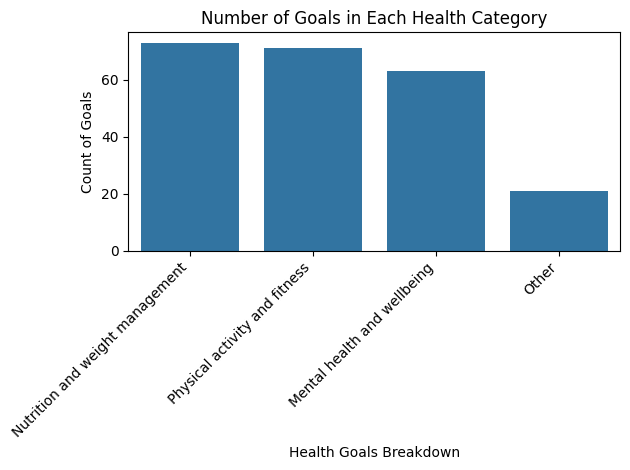

In [ ]:
# prompt: Using dataframe goals_each_health_category: plot seaborn bar chart of count of goals vs goal_categories

import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(x='goal_categories', y='count of goals', data=goals_each_health_category)

# Customize the plot (optional)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Health Goals Breakdown')
plt.ylabel('Count of Goals')
plt.title('Number of Goals in Each Health Category')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


## table of number of disruptions for each goal category

In [ ]:
# @title
df['pid*gid*cid'] = df['pid'] + "*" + df['gid'] + "*" + df['cid']

len(df['pid*gid*cid'])
df['pid*gid*cid'].nunique()

disruptions_df = df[['pid', 'gid', 'pid*gid', 'pid*gid*cid', 'goal_categories', 'situation_that_occurred', 'disruption_status']]

disruptions_df

,pid,gid,pid*gid,pid*gid*cid,goal_categories,situation_that_occurred,disruption_status
0,S01,goal1,S01*goal1,S01*goal1*circ1,Financial Stability/Safety,Resources,Disruption
1,S01,goal1,S01*goal1,S01*goal1*circ2,Financial Stability/Safety,Internal - Feelings and thoughts,Disruption
2,S01,goal1,S01*goal1,S01*goal1*circ3,Financial Stability/Safety,Pain,Disruption
3,S01,goal2,S01*goal2,S01*goal2*circ1,Mental health and wellbeing,Social interactions - negative,Disruption
4,S01,goal2,S01*goal2,S01*goal2*circ2,Mental health and wellbeing,Finances,Disruption
...,...,...,...,...,...,...,...
684,S149,goal1,S149*goal1,S149*goal1*circ2,Shopping,Finances,Disruption
685,S149,goal1,S149*goal1,S149*goal1*circ3,Shopping,Finances,Disruption
686,S149,goal1,S149*goal1,S149*goal1*circ4,Shopping,Social interaction - other,Disruption
687,S149,goal2,S149*goal2,S149*goal2*circ1,Physical Activity,Pain,Disruption


In [ ]:
# @title
# filter out no disruptions

disruptions_df_filter = disruptions_df[disruptions_df['disruption_status'] == 'Disruption']


disruption_by_category = disruptions_df_filter.groupby('pid*gid*cid')['goal_categories'].unique()
disruption_by_category = disruptions_df_filter['goal_categories'].value_counts()
disruption_by_category = disruption_by_category.reset_index()
disruption_by_category

,goal_categories,count
0,Physical Activity,106
1,Mental health and wellbeing,81
2,Financial Stability/Safety,80
3,Weight management,75
4,Work/Career,53
5,Social connection,52
6,Nutrition,50
7,Housing,30
8,Education/Learning,23
9,Recreation,18


### goal categories combined- work and education goals and chronic condition and sleeping goals with other health goals

In [ ]:
# @title
# filter out no disruptions
disruptions_df = disruptions_df[disruptions_df['disruption_status'] == 'Disruption']

#creating new dataframe for combined categories
disruptions_by_goal_type_combined = disruptions_df

#grouping [chronic and sleep] and [work and education]
disruptions_by_goal_type_combined['goal_categories'] = disruptions_by_goal_type_combined['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})



disruption_by_category = disruptions_by_goal_type_combined.groupby('pid*gid*cid')['goal_categories'].unique()
disruption_by_category = disruptions_by_goal_type_combined['goal_categories'].value_counts()
disruption_by_category = disruption_by_category.reset_index()
disruption_by_category

/tmp/ipython-input-508069547.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disruptions_by_goal_type_combined['goal_categories'] = disruptions_by_goal_type_combined['goal_categories'].replace({


,goal_categories,count
0,Physical Activity,106
1,Mental health and wellbeing,81
2,Financial Stability/Safety,80
3,Work/Education,76
4,Weight management,75
5,Social connection,52
6,Nutrition,50
7,Housing,30
8,Health - other,24
9,Recreation,18


### for manuscript- goal categories combines

health: combining physical activity, mental health and well-being, weight management, nutrition, health-other

finances: financial stability/ safety, shopping, housing

Work/education:

social connection:

Recreation

cleaning/organizing

Other: other, screentime

In [ ]:
# @title
# filter out no disruptions
disruptions_df = disruptions_df[disruptions_df['disruption_status'] == 'Disruption']

#creating new dataframe for combined categories
disruptions_by_goal_type_combined = disruptions_df

#grouping [chronic and sleep] and [work and education]
disruptions_by_goal_type_combined['goal_categories'] = disruptions_by_goal_type_combined['goal_categories'].replace({
    'Manage chronic condition': 'Health',
    'Sleep': 'Health',
    'Physical Activity': 'Health',
    'Mental health and wellbeing': 'Health',
    'Weight management': 'Health',
    'Nutrition': 'Health',
    'Health - other': 'Health',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education',
    'Financial Stability/Safety': 'Finances',
    'Shopping': 'Finances',
    'Housing': 'Finances',
    'Screentime management': 'Other',
        'Cleaning/organizing' : 'Cleaning'

})



disruption_by_category = disruptions_by_goal_type_combined.groupby('pid*gid*cid')['goal_categories'].unique()
disruption_by_category = disruptions_by_goal_type_combined['goal_categories'].value_counts()
disruption_by_category = disruption_by_category.reset_index()
disruption_by_category

,goal_categories,count
0,Health,336
1,Finances,125
2,Work/Education,76
3,Social connection,52
4,Recreation,18
5,Cleaning,14
6,Sobriety,8
7,Other,7


## number of goals and disruptions for each goal category

In [ ]:
# prompt: dataframe with goals_each_category and disruption_by_category

combined_df = pd.merge(goals_each_category, disruption_by_category, on='goal_categories', how='left')
combined_df = combined_df.rename(columns={'count of goals': 'number_of_goals', 'goal_categories': 'category', 'count': 'number_of_disruptions'})
combined_df = combined_df[['category', 'number_of_goals', 'number_of_disruptions']]
combined_df

,category,number_of_goals,number_of_disruptions
0,Health,228,336.0
1,Relationship,33,NaN
2,Other,15,7.0


/tmp/ipython-input-1437484872.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
/tmp/ipython-input-1437484872.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


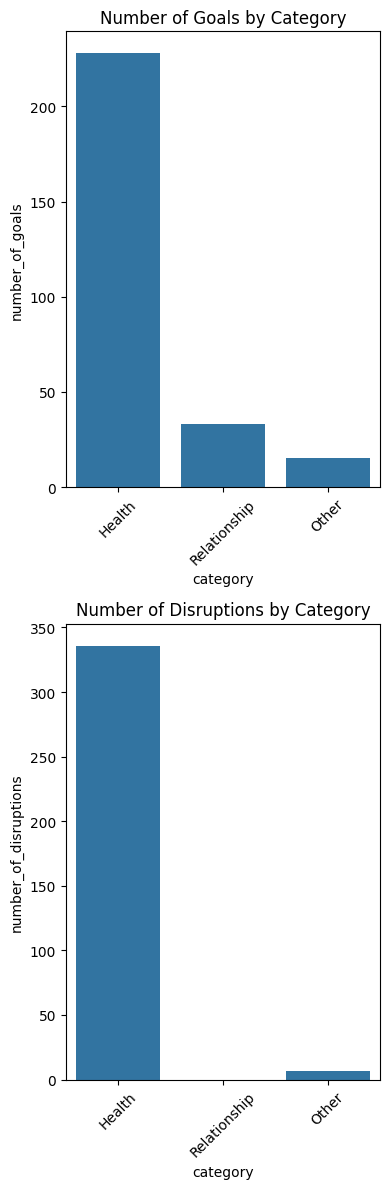

In [ ]:
# prompt: plot as 2 small multiple bar chart

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(4, 12))

# Plot 1: Number of Goals
sns.barplot(ax=axes[0], x='category', y='number_of_goals', data=combined_df)
axes[0].set_title('Number of Goals by Category')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot 2: Number of Disruptions
sns.barplot(ax=axes[1], x='category', y='number_of_disruptions', data=combined_df)
axes[1].set_title('Number of Disruptions by Category')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

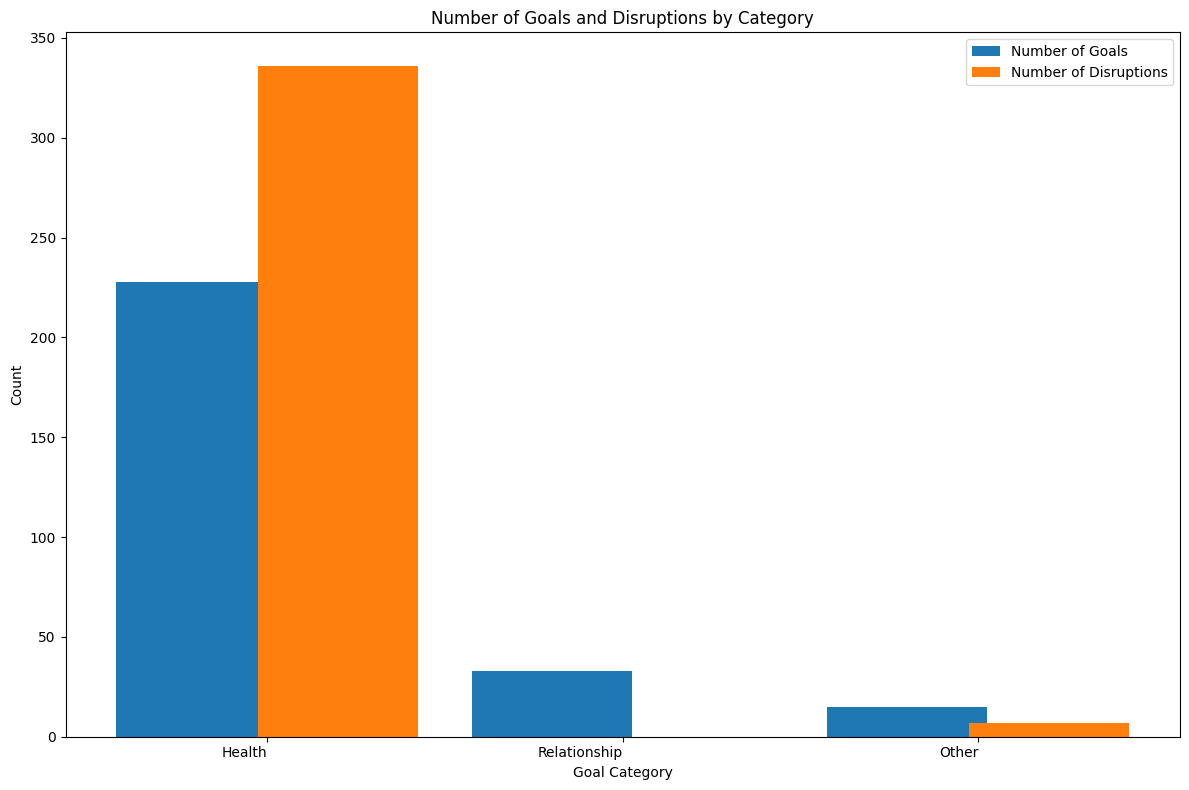

In [ ]:
# prompt: plot combined_df using multiple bar chart or grouped bar chart using matplotlib

import matplotlib.pyplot as plt
import numpy as np


# Assuming combined_df is defined as in your code

fig, ax = plt.subplots(figsize=(12, 8))

width = 0.45  # the width of the bars

X_axis = np.arange(len(combined_df.category))

ax.bar(X_axis - 0.2, combined_df.number_of_goals, width, label='Number of Goals')
ax.bar(X_axis + 0.2, combined_df.number_of_disruptions, width, label='Number of Disruptions')

# Correctly set tick positions and labels together
tick_positions = range(len(combined_df.category)) # Manual indexing starting from 0
ax.set_xticks(tick_positions)
ax.set_xticklabels(labels=combined_df.category, ha='right')

ax.set_xlabel("Goal Category")
ax.set_ylabel("Count")
ax.set_title("Number of Goals and Disruptions by Category")
ax.legend()
plt.tight_layout()
plt.show()

## health goals and unique disruptions only

## number of disruptions of different durations for each goal category

filter out rows with
disruption = “no disruption”

OR "how-long" = no-disruption or no-response

include rows with disruption labor = no response because it is still a disruption

In [ ]:
# @title

df['pid*gid*cid'] = df['pid'] + "*" + df['gid'] + "*" + df['cid']

len(df['pid*gid*cid'])
df['pid*gid*cid'].nunique()

disruptions_duration_goaltype = df[['pid', 'gid', 'pid*gid', 'pid*gid*cid', 'goal_categories','how-long', 'disruption_status']]


#filter out no disruptions
disruptions_duration_goaltype = disruptions_duration_goaltype[disruptions_duration_goaltype['disruption_status'] == 'Disruption']

#filter out no response
disruptions_duration_goaltype = disruptions_duration_goaltype[disruptions_duration_goaltype['how-long'] != 'No response']

#grouping [chronic and sleep] and [work and education]
disruptions_duration_goaltype['goal_categories'] = disruptions_duration_goaltype['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})


disruptions_duration_goaltype = disruptions_duration_goaltype[['pid*gid*cid', 'how-long', 'goal_categories']]
disruptions_duration_goaltype

,pid*gid*cid,how-long,goal_categories
0,S01*goal1*circ1,longer than a year,Financial Stability/Safety
1,S01*goal1*circ2,longer than a year,Financial Stability/Safety
2,S01*goal1*circ3,longer than a year,Financial Stability/Safety
3,S01*goal2*circ1,multiple days to a week,Mental health and wellbeing
4,S01*goal2*circ2,longer than a year,Mental health and wellbeing
...,...,...,...
684,S149*goal1*circ2,multiple weeks to a month,Shopping
685,S149*goal1*circ3,more than half a day to a day,Shopping
686,S149*goal1*circ4,more than half a day to a day,Shopping
687,S149*goal2*circ1,multiple months to a year,Physical Activity


In [ ]:
# @title
# prompt: Using dataframe disruptions_duration_goaltype: count of values grouped by goal categories and how-long

# Group by goal_categories and how-long and count the number of values
count_by_goal_howlong = disruptions_duration_goaltype.groupby(['goal_categories', 'how-long'])['pid*gid*cid'].count()
print(count_by_goal_howlong.to_string()) # Use .to_string() to display all rows of the Series


goal_categories              how-long                       
Cleaning/organizing          an hour or less                     2
                             longer than a year                  2
                             more than an hour to half a day     3
                             more than half a day to a day       1
                             multiple days to a week             2
                             multiple months to a year           1
                             multiple weeks to a month           2
Financial Stability/Safety   an hour or less                     1
                             longer than a year                 18
                             more than half a day to a day       3
                             multiple days to a week            11
                             multiple months to a year          25
                             multiple weeks to a month          22
Health - other               an hour or less                     1
 

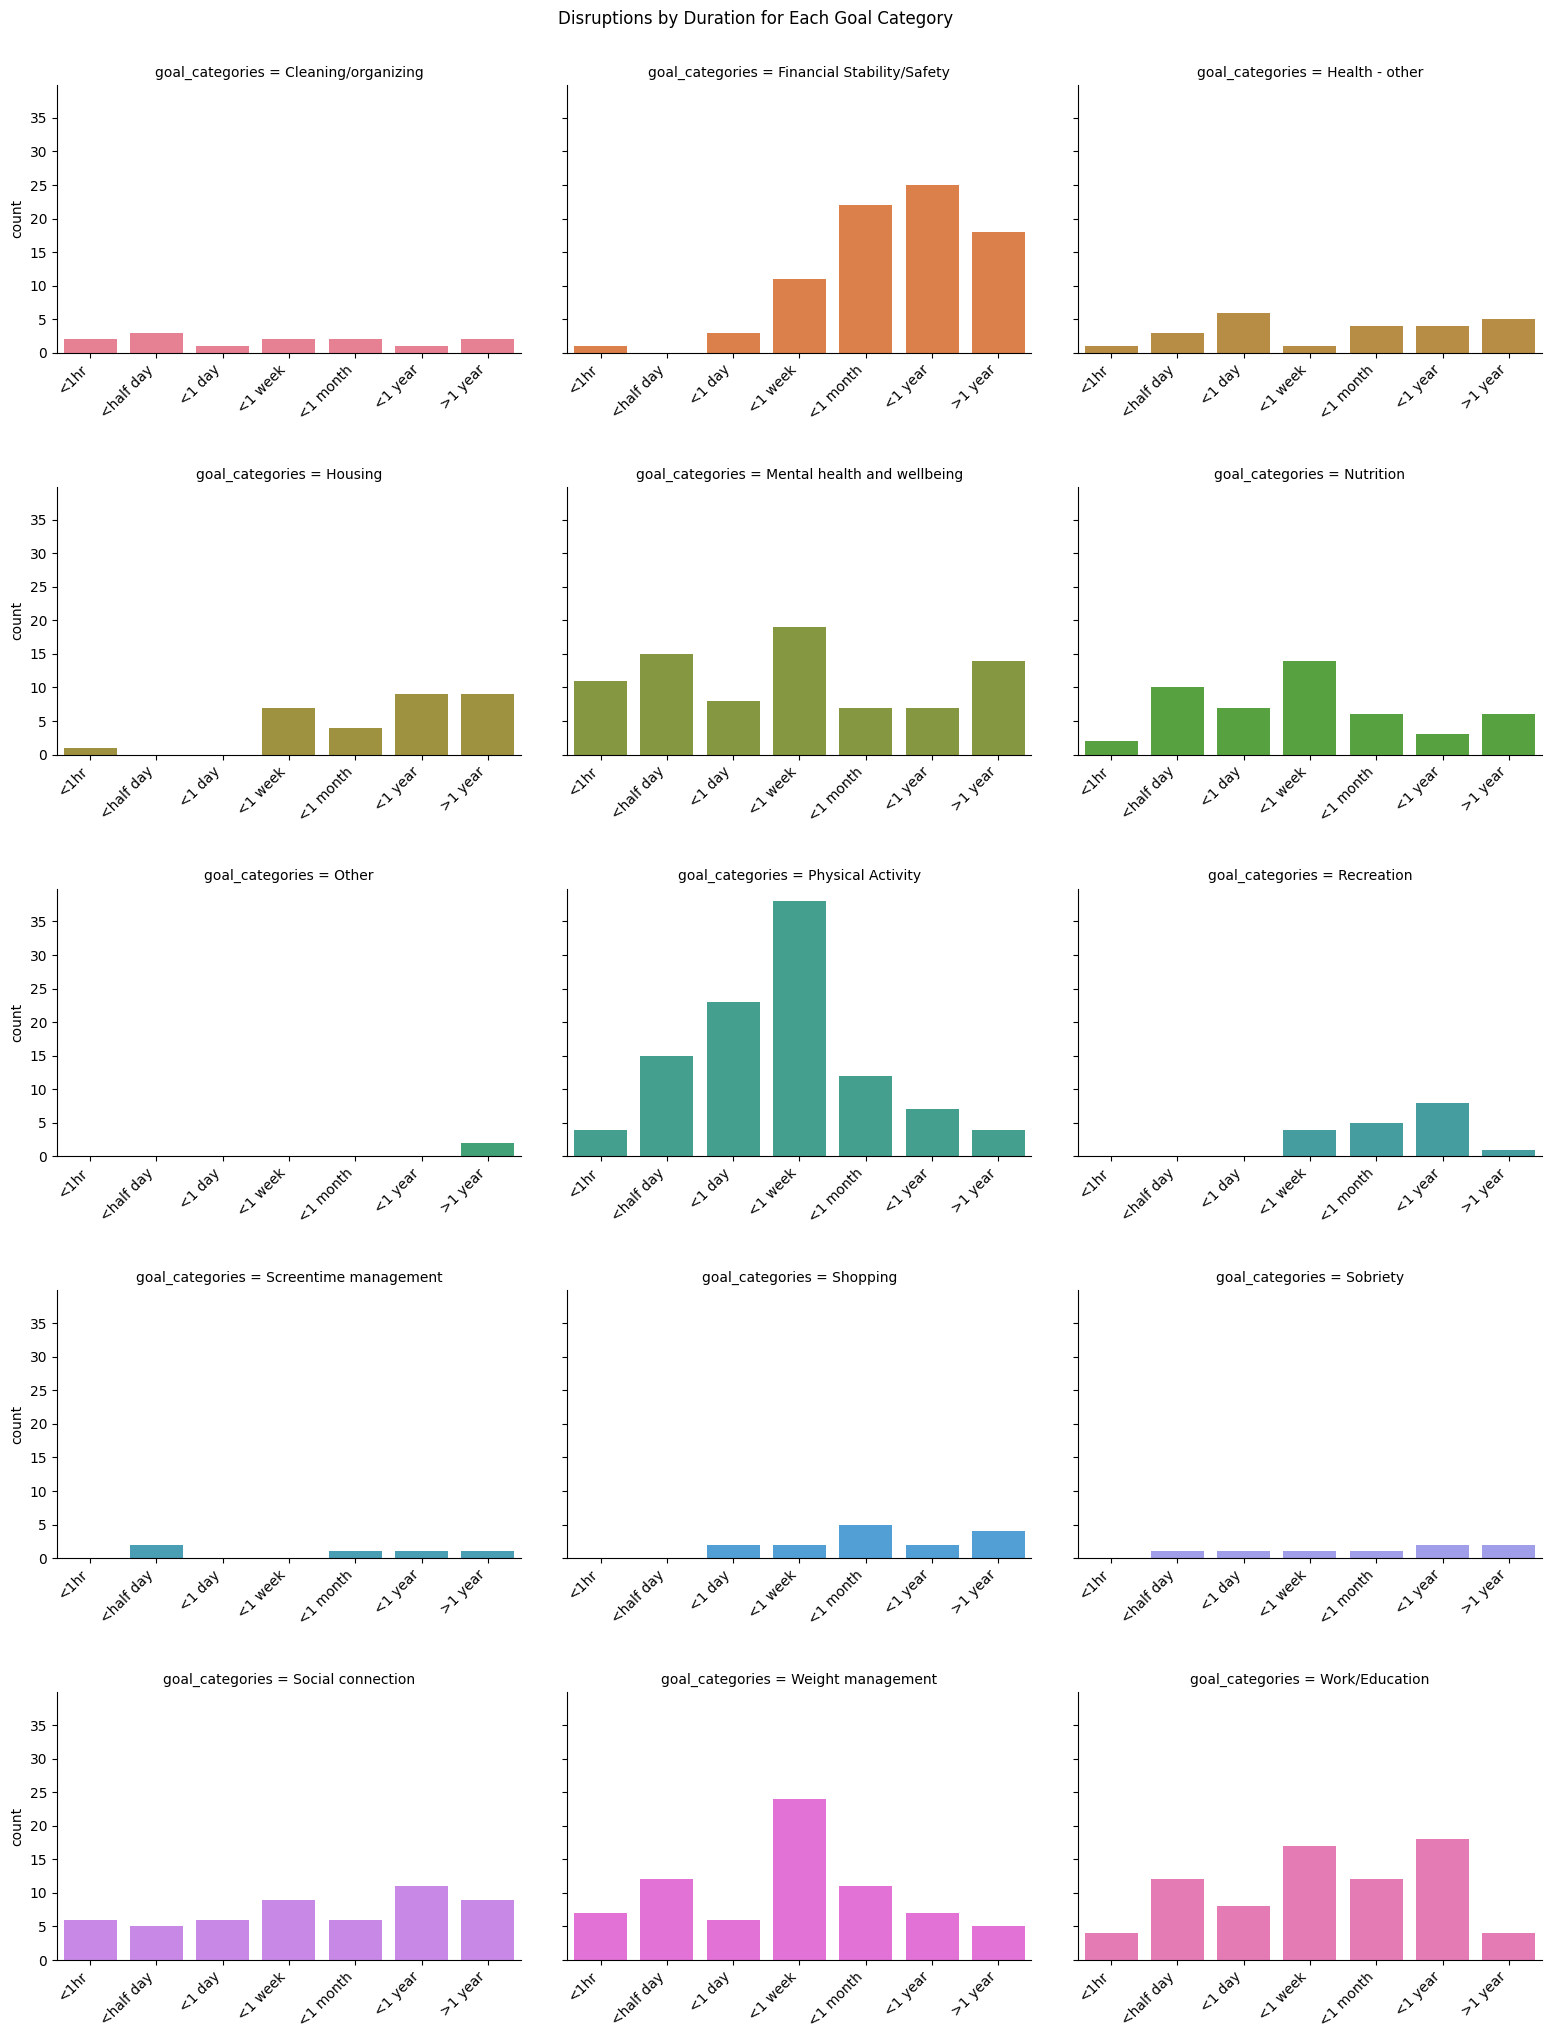

In [ ]:
# @title
from itertools import count
# prompt: plot disruptions_duration_goaltype in small multiple bar graphs

# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_howlong_df = count_by_goal_howlong.reset_index()
# Rename the label names for clarity
count_by_goal_howlong_df['how-long'] = count_by_goal_howlong_df['how-long'].replace({
    'an hour or less': '<1hr',
    'more than an hour to half a day': '<half day',
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

#rename
count_by_goal_howlong_df.rename(columns={'pid*gid*cid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['<1hr', '<half day', '<1 day', '<1 week', '<1 month', '<1 year', '>1 year']
count_by_goal_howlong_df['how-long'] = pd.Categorical(count_by_goal_howlong_df['how-long'], categories=xlabels_order, ordered=True)


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='how-long', y='count', hue='goal_categories', data=count_by_goal_howlong_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Duration for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

### combining [<1hr,<half day]

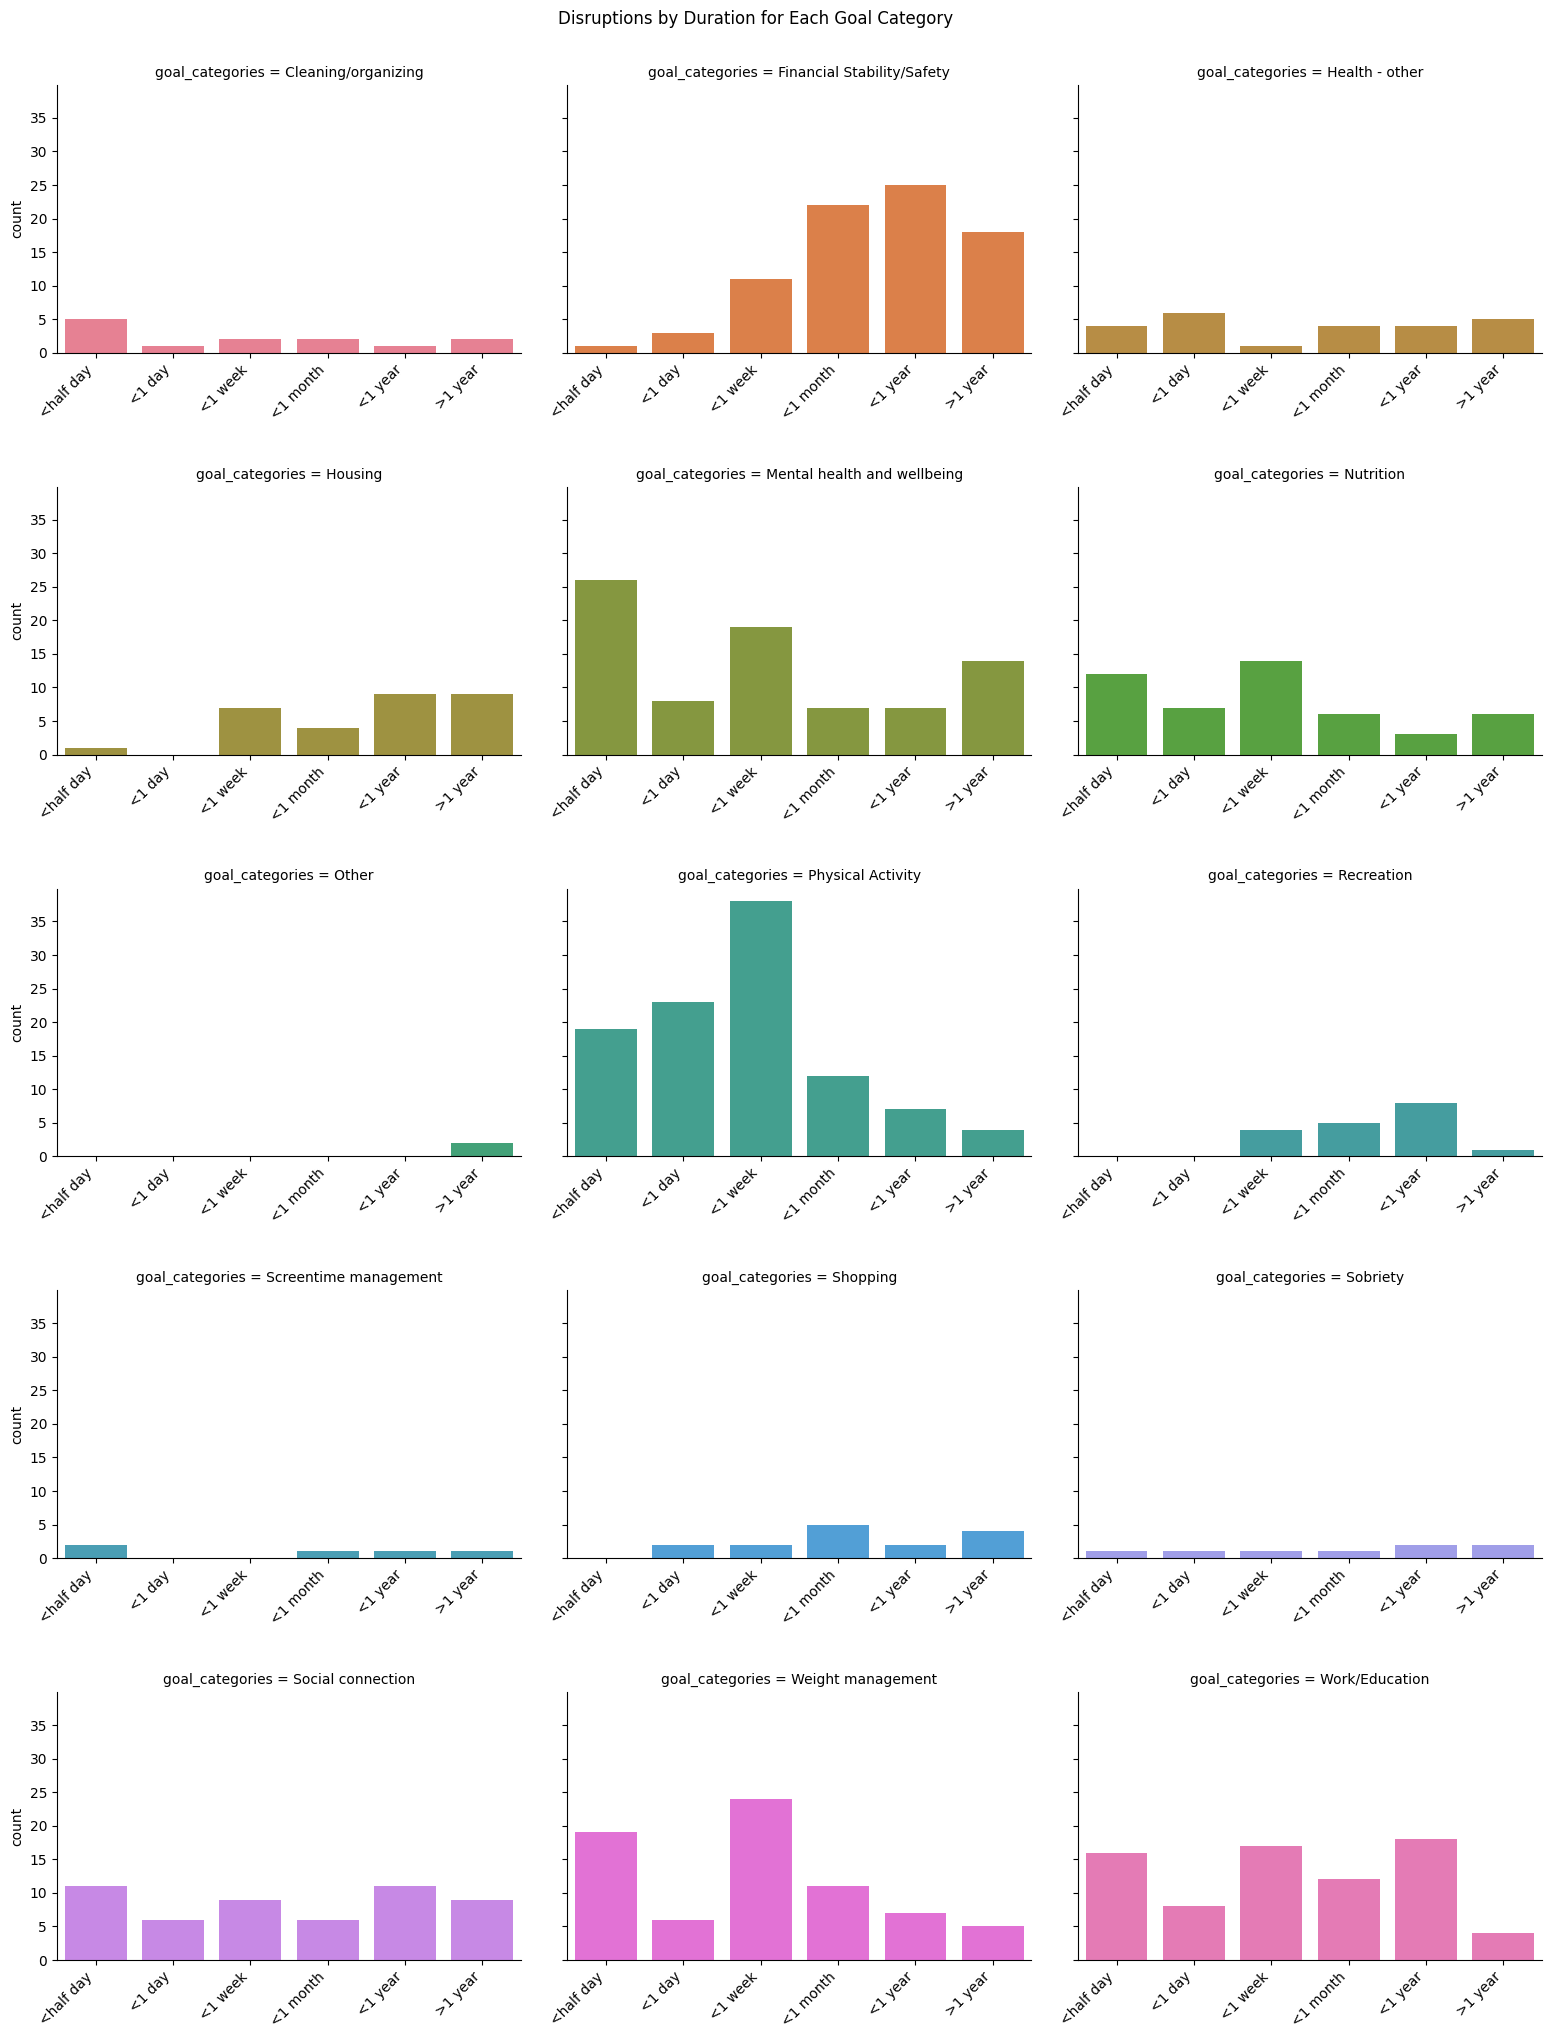

In [ ]:
#grouping [<1hr,<half day]
disruptions_duration_goaltype_combo = disruptions_duration_goaltype
disruptions_duration_goaltype_combo['how-long'] = disruptions_duration_goaltype['how-long'].replace({
    'an hour or less': 'more than an hour to half a day'
})


disruptions_duration_goaltype_combo= disruptions_duration_goaltype_combo[['pid*gid*cid', 'how-long', 'goal_categories']]

# Group by goal_categories and how-long and count the number of values
count_by_goal_howlong_c = disruptions_duration_goaltype_combo.groupby(['goal_categories', 'how-long'])['pid*gid*cid'].count()

# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_howlong_c_df = count_by_goal_howlong_c.reset_index()
# Rename the label names for clarity
count_by_goal_howlong_c_df['how-long'] = count_by_goal_howlong_c_df['how-long'].replace({
    'more than an hour to half a day': '<half day',
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

#rename
count_by_goal_howlong_c_df.rename(columns={'pid*gid*cid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['<half day', '<1 day', '<1 week', '<1 month', '<1 year', '>1 year']
count_by_goal_howlong_c_df['how-long'] = pd.Categorical(count_by_goal_howlong_c_df['how-long'], categories=xlabels_order, ordered=True)


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='how-long', y='count', hue='goal_categories', data=count_by_goal_howlong_c_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Duration for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

### combining [<1hr,<half day, <1 day] and goal categories for manuscript:

combining physical activity, mental health and well-being, weight management, nutrition, health-other

finances: financial stability/ safety, shopping, housing

Work/education:

social connection:

Recreation


Other: other, screentime, cleaning/organizing

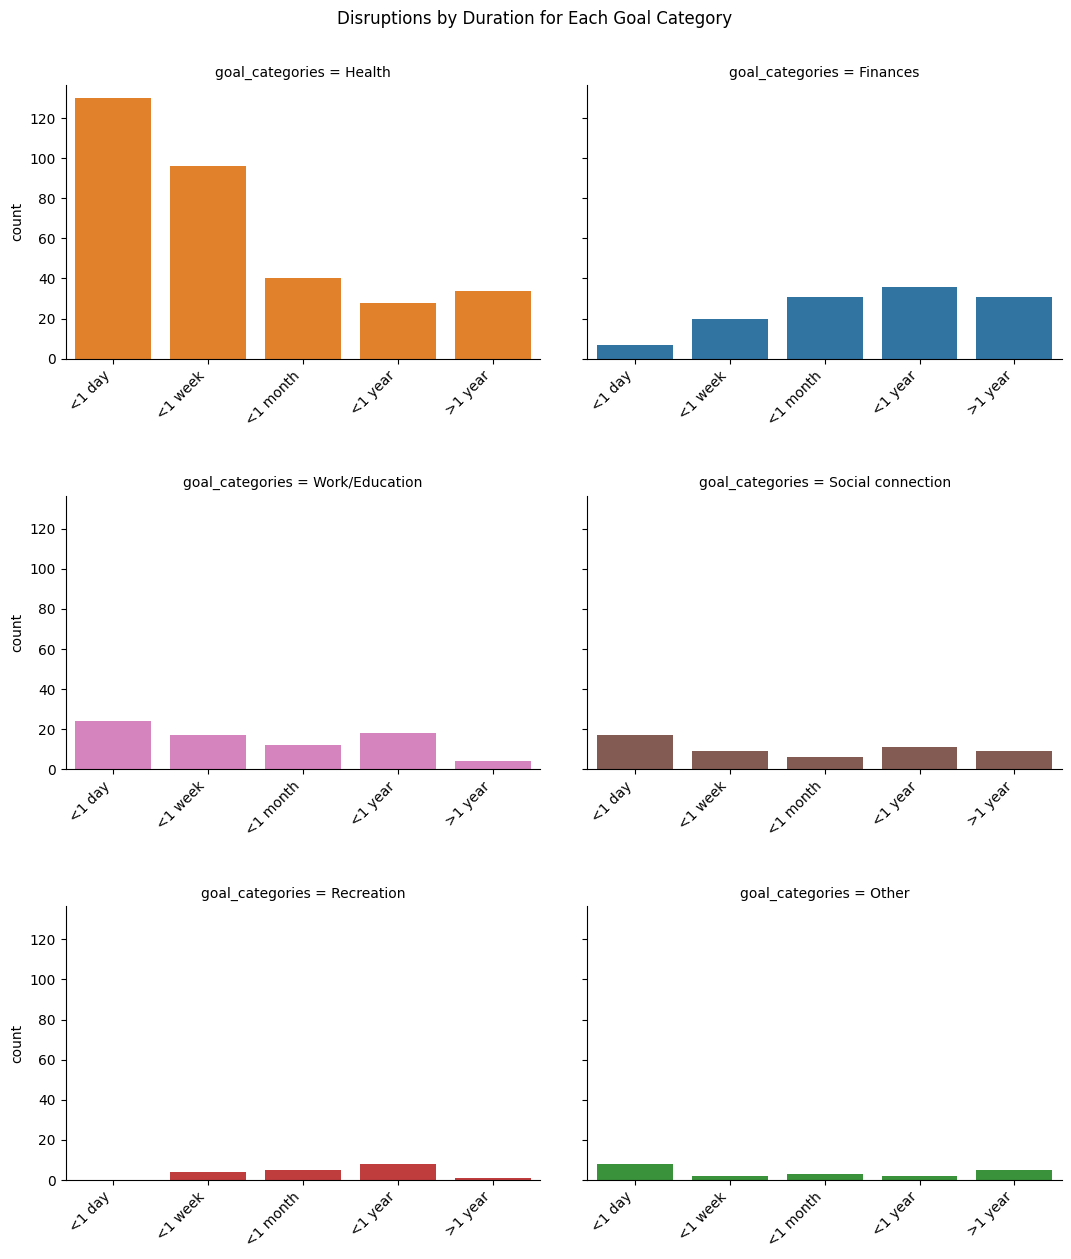

In [ ]:
#grouping [<1hr,<half day]
disruptions_duration_goaltype_combo = disruptions_duration_goaltype
disruptions_duration_goaltype_combo['how-long'] = disruptions_duration_goaltype['how-long'].replace({
    'an hour or less': 'more than half a day to a day',
    'more than an hour to half a day': 'more than half a day to a day'
})

# grouping goals
disruptions_duration_goaltype_combo['goal_categories'] = disruptions_duration_goaltype_combo['goal_categories'].replace({
    'Manage chronic condition': 'Health',
    'Sleep': 'Health',
    'Physical Activity': 'Health',
    'Mental health and wellbeing': 'Health',
    'Weight management': 'Health',
    'Nutrition': 'Health',
    'Health - other': 'Health',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education',
    'Financial Stability/Safety': 'Finances',
    'Shopping': 'Finances',
    'Housing': 'Finances',
    'Screentime management': 'Other',
    'Cleaning/organizing' : 'Other'
})



disruptions_duration_goaltype_combo= disruptions_duration_goaltype_combo[['pid*gid*cid', 'how-long', 'goal_categories']]

# Group by goal_categories and how-long and count the number of values
count_by_goal_howlong_c = disruptions_duration_goaltype_combo.groupby(['goal_categories', 'how-long'])['pid*gid*cid'].count()

# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_howlong_c_df = count_by_goal_howlong_c.reset_index()
# Rename the label names for clarity
count_by_goal_howlong_c_df['how-long'] = count_by_goal_howlong_c_df['how-long'].replace({
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

#rename
count_by_goal_howlong_c_df.rename(columns={'pid*gid*cid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['<1 day', '<1 week', '<1 month', '<1 year', '>1 year']
count_by_goal_howlong_c_df['how-long'] = pd.Categorical(count_by_goal_howlong_c_df['how-long'], categories=xlabels_order, ordered=True)

#set order of plots
plot_order = ['Health', 'Finances', 'Work/Education','Social connection','Recreation','Other']


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='how-long', y='count', hue='goal_categories', data=count_by_goal_howlong_c_df, kind='bar', col='goal_categories', col_wrap=2,col_order=plot_order, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.93, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Duration for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

## number of disruptions of different frequency for each goal category

filter out rows with
disruption = “no disruption”

OR "how-long" = no-disruption or no-response

include rows with disruption labor = no response because it is still a disruption



In [ ]:
# @title

df['pid*gid*cid'] = df['pid'] + "*" + df['gid'] + "*" + df['cid']

len(df['pid*gid*cid'])
df['pid*gid*cid'].nunique()

disruptions_frequency_goaltype = df[['pid*gid*cid', 'goal_categories','frequency', 'disruption_status']]


#filter out no disruptions
disruptions_frequency_goaltype = disruptions_frequency_goaltype[disruptions_frequency_goaltype['disruption_status'] == 'Disruption']

#filter out no response
disruptions_frequency_goaltype = disruptions_frequency_goaltype[disruptions_frequency_goaltype['frequency'] != 'No response']

#grouping [chronic and sleep] and [work and education]
disruptions_frequency_goaltype['goal_categories'] = disruptions_frequency_goaltype['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})


disruptions_frequency_goaltype = disruptions_frequency_goaltype[['pid*gid*cid', 'frequency', 'goal_categories']]

# Group by goal_categories and frequency and count the number of values
count_by_goal_frequency = disruptions_frequency_goaltype.groupby(['goal_categories', 'frequency'])['pid*gid*cid'].count()
print(count_by_goal_frequency.to_string()) # Use .to_string() to display all rows of the Series


goal_categories              frequency       
Cleaning/organizing          daily                5
                             every other week     2
                             monthly              1
                             weekly               3
                             yearly or less       2
Financial Stability/Safety   daily               15
                             every 6 months      10
                             every other week     8
                             monthly             22
                             weekly               6
                             yearly or less      19
Health - other               daily                5
                             every 6 months       4
                             monthly              7
                             weekly               7
                             yearly or less       1
Housing                      daily                7
                             every 6 months       6
                  

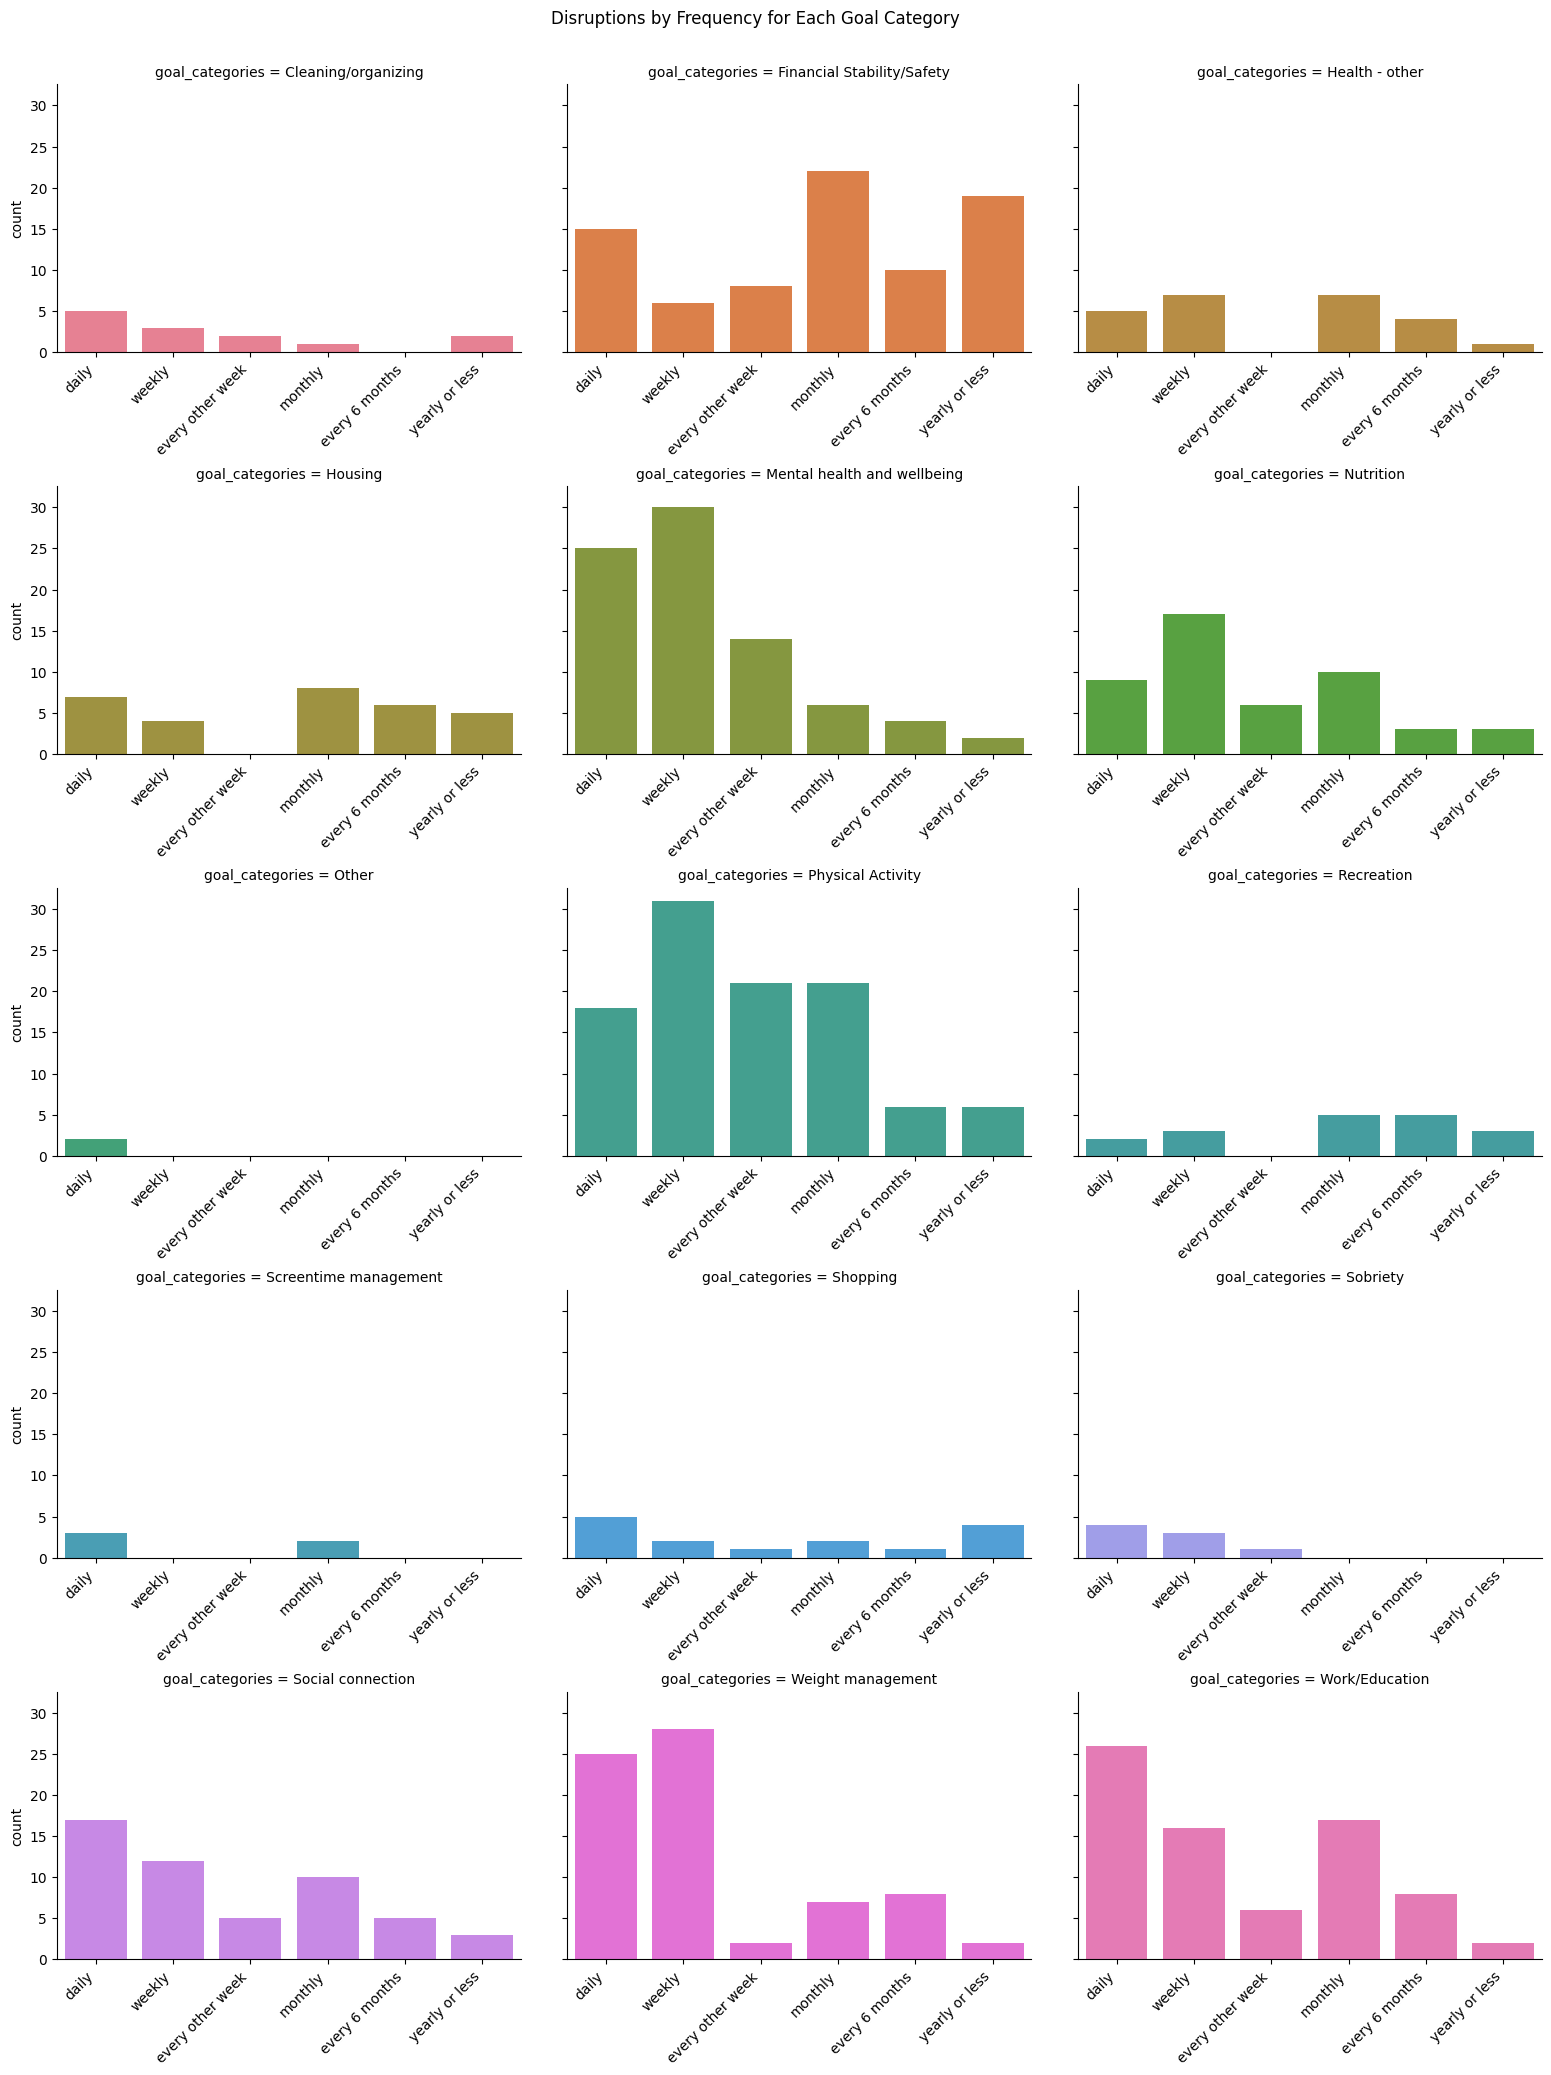

In [ ]:
# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_freq_df = count_by_goal_frequency.reset_index()

#rename
count_by_goal_freq_df.rename(columns={'pid*gid*cid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['daily','weekly','every other week', 'monthly','every 6 months','yearly or less']

count_by_goal_freq_df['frequency'] = pd.Categorical(count_by_goal_freq_df['frequency'], categories=xlabels_order, ordered=True)


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='frequency', y='count', hue='goal_categories', data=count_by_goal_freq_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Frequency for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

### combining goal categories for manuscript:
combining physical activity, mental health and well-being, weight management, nutrition, health-other

finances: financial stability/ safety, shopping, housing

Work/education:

social connection:

Recreation

Other: other, screentime, cleaning/organizing

In [ ]:
# @title

df['pid*gid*cid'] = df['pid'] + "*" + df['gid'] + "*" + df['cid']

len(df['pid*gid*cid'])
df['pid*gid*cid'].nunique()

disruptions_frequency_goaltype = df[['pid*gid*cid','goal-statement', 'goal_categories','frequency', 'disruption_status']]


#filter out no disruptions
disruptions_frequency_goaltype = disruptions_frequency_goaltype[disruptions_frequency_goaltype['disruption_status'] == 'Disruption']

#filter out no response
disruptions_frequency_goaltype = disruptions_frequency_goaltype[disruptions_frequency_goaltype['frequency'] != 'No response']

#grouping [chronic and sleep] and [work and education]
disruptions_frequency_goaltype['goal_categories'] = disruptions_frequency_goaltype['goal_categories'].replace({
    'Manage chronic condition': 'Health',
    'Sleep': 'Health',
    'Physical Activity': 'Health',
    'Mental health and wellbeing': 'Health',
    'Weight management': 'Health',
    'Nutrition': 'Health',
    'Health - other': 'Health',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education',
    'Financial Stability/Safety': 'Finances',
    'Shopping': 'Finances',
    'Housing': 'Finances',
    'Screentime management': 'Other',
    'Cleaning/organizing' : 'Other'
})


disruptions_frequency_goaltype = disruptions_frequency_goaltype[['pid*gid*cid', 'frequency', 'goal_categories']]

# Group by goal_categories and frequency and count the number of values
count_by_goal_frequency = disruptions_frequency_goaltype.groupby(['goal_categories', 'frequency'])['pid*gid*cid'].count()
print(count_by_goal_frequency.to_string()) # Use .to_string() to display all rows of the Series


goal_categories    frequency       
Finances           daily                27
                   every 6 months       17
                   every other week      9
                   monthly              32
                   weekly               12
                   yearly or less       28
Health             daily                82
                   every 6 months       25
                   every other week     43
                   monthly              51
                   weekly              113
                   yearly or less       14
Other              daily                10
                   every other week      2
                   monthly               3
                   weekly                3
                   yearly or less        2
Recreation         daily                 2
                   every 6 months        5
                   monthly               5
                   weekly                3
                   yearly or less        3
Sobriety          

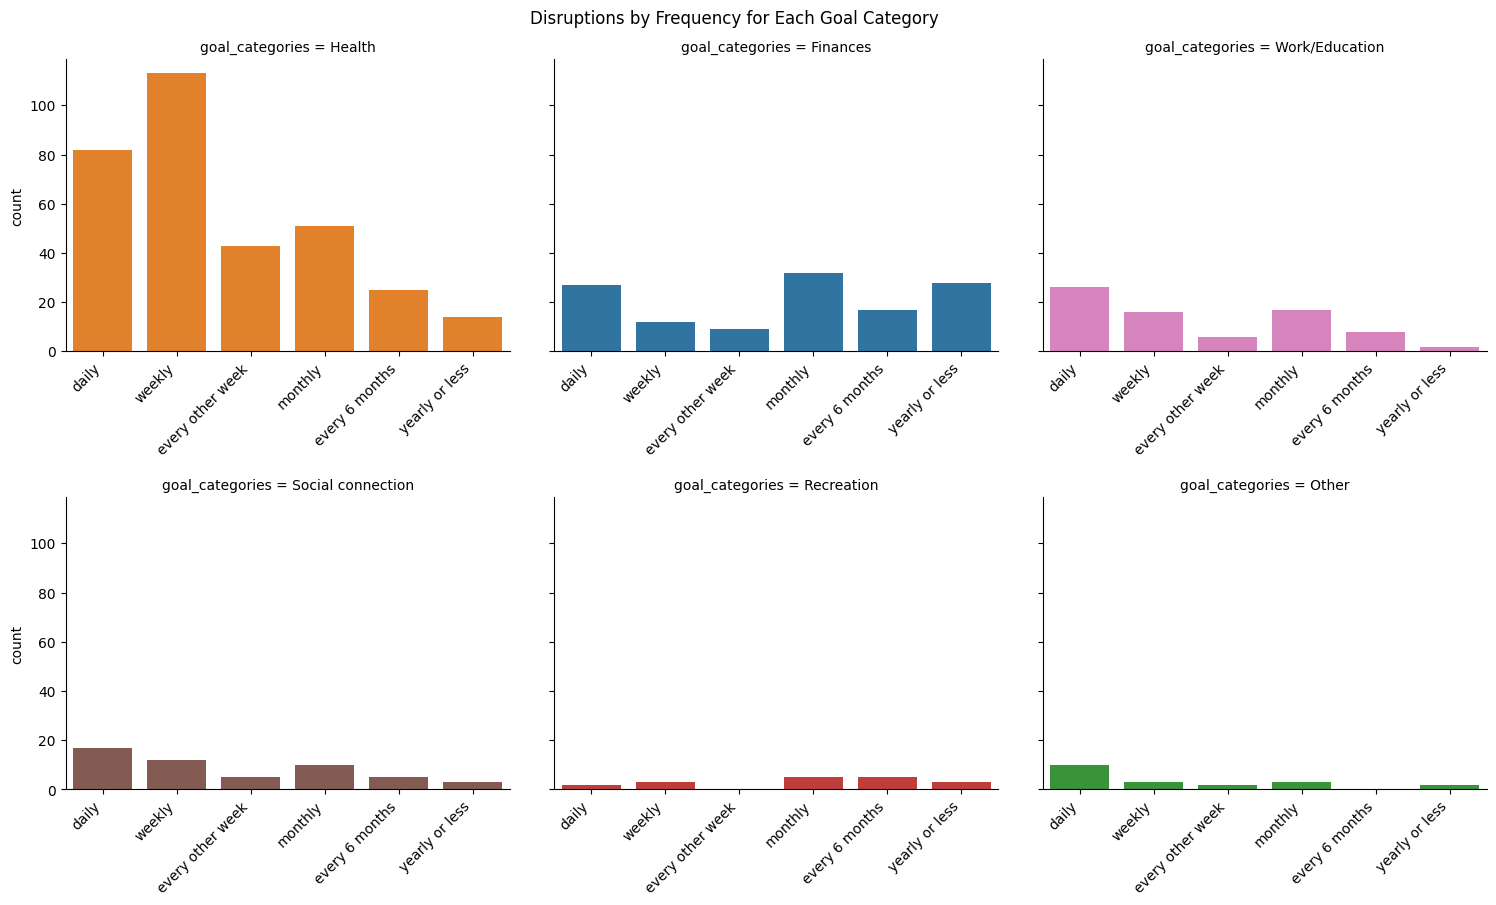

In [ ]:
# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_freq_df = count_by_goal_frequency.reset_index()

#rename
count_by_goal_freq_df.rename(columns={'pid*gid*cid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['daily','weekly','every other week', 'monthly','every 6 months','yearly or less']

count_by_goal_freq_df['frequency'] = pd.Categorical(count_by_goal_freq_df['frequency'], categories=xlabels_order, ordered=True)

#set order of plots
plot_order = ['Health', 'Finances', 'Work/Education','Social connection','Recreation','Other']

# Create a small multiple bar plot using seaborn
g = sns.catplot(x='frequency', y='count', hue='goal_categories', data=count_by_goal_freq_df, kind='bar', col='goal_categories', col_wrap=3, col_order=plot_order,sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.93, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Frequency for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

## number of disruptions with different adjustments for each goal category


In [ ]:
df['pid*gid*cid'] = df['pid'] + "*" + df['gid'] + "*" + df['cid']

len(df['pid*gid*cid'])
df['pid*gid*cid'].nunique()

disruptions_changes_goaltype = df[['pid', 'gid', 'pid*gid', 'pid*gid*cid', 'goal_categories','goal_changes', 'disruption_status']]


#filter out no disruptions
disruptions_changes_goaltype = disruptions_changes_goaltype[disruptions_changes_goaltype['disruption_status'] == 'Disruption']

#filter out no response
disruptions_changes_goaltype = disruptions_changes_goaltype[disruptions_changes_goaltype['goal_changes'] != 'No response']

#grouping [chronic and sleep] and [work and education]
disruptions_changes_goaltype['goal_categories'] = disruptions_changes_goaltype['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})


disruptions_changes_goaltype = disruptions_changes_goaltype[['pid*gid*cid', 'goal_changes', 'goal_categories']]

# Group by goal_categories and frequency and count the number of values
count_by_goal_changes = disruptions_changes_goaltype.groupby(['goal_categories', 'goal_changes'])['pid*gid*cid'].count()
print(count_by_goal_changes.to_string()) # Use .to_string() to display all rows of the Series


goal_categories              goal_changes              
Cleaning/organizing          Abandoned                      1
                             Changed environment            1
                             Changed quantity               2
                             Changed/ adopted support       1
                             No change                      2
                             Rescheduled                    3
                             Skipped                        3
                             Substituted activity           1
Financial Stability/Safety   Abandoned                      4
                             Changed environment            3
                             Changed quantity              18
                             Changed strategy-other         4
                             Changed thoughts or belief     2
                             Changed/ adopted support       2
                             No change                      9
              

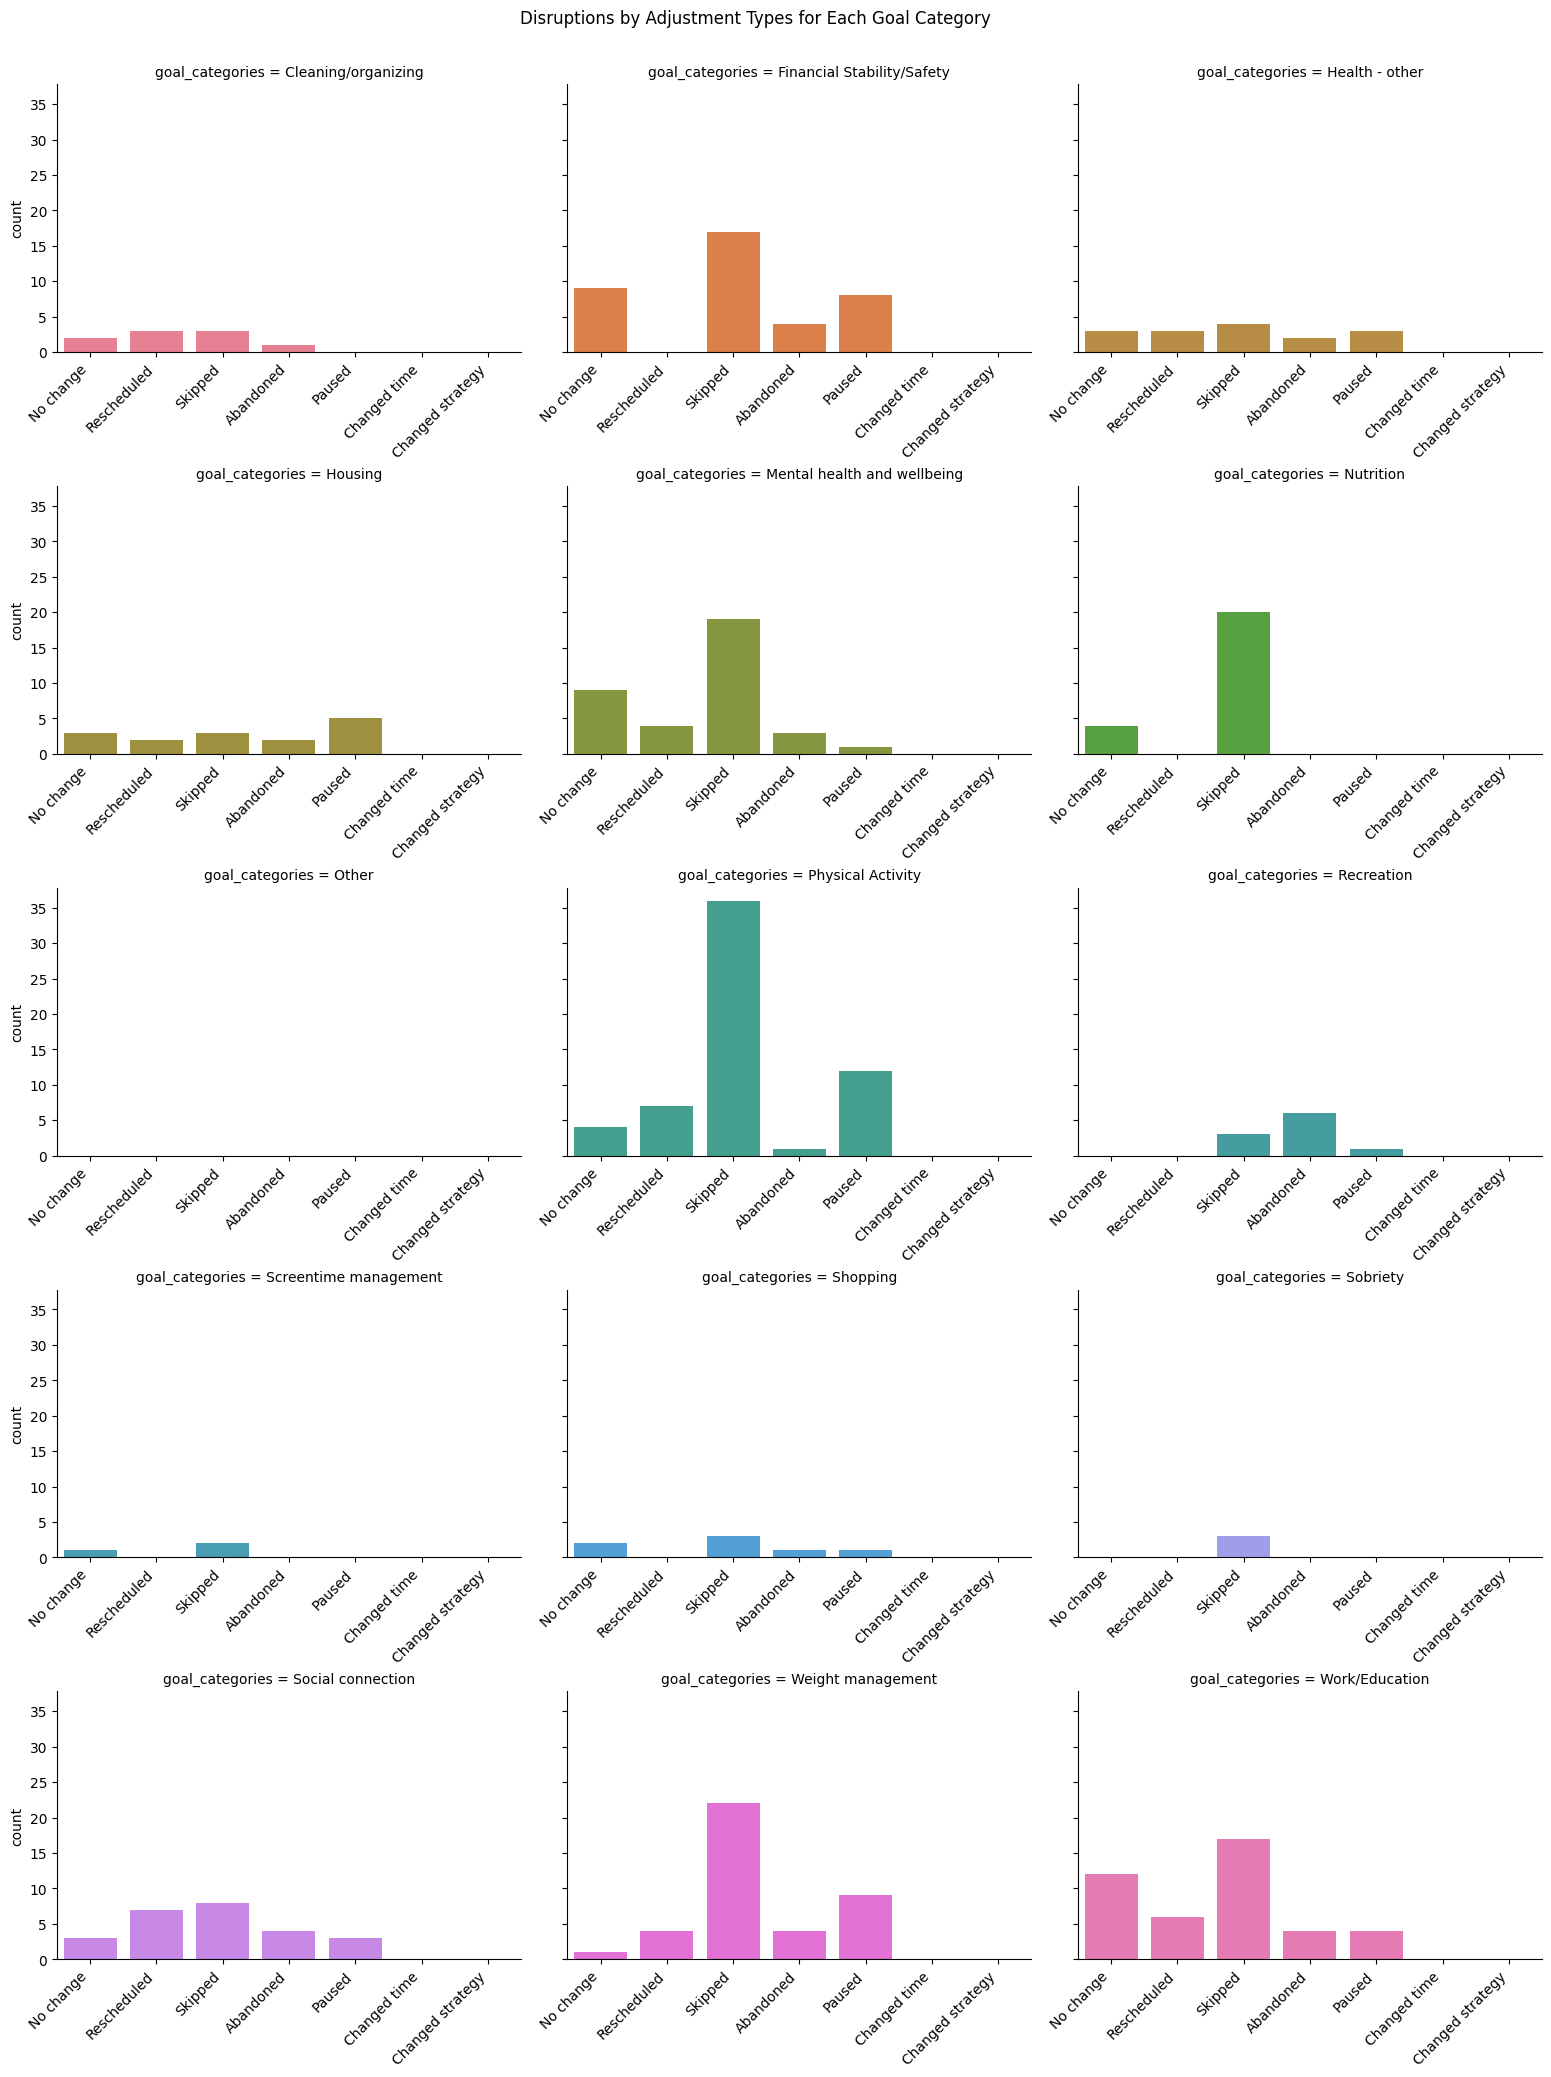

In [ ]:
# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_changes_df = count_by_goal_changes.reset_index()

#rename
count_by_goal_changes_df.rename(columns={'pid*gid*cid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['No change', 'Rescheduled', 'Skipped','Abandoned','Paused', 'Changed time', 'Changed strategy']


count_by_goal_changes_df['goal_changes'] = pd.Categorical(count_by_goal_changes_df['goal_changes'], categories=xlabels_order, ordered=True)


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='goal_changes', y='count', hue='goal_categories', data=count_by_goal_changes_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Adjustment Types for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

### combining goal categories

In [ ]:
df['pid*gid*cid'] = df['pid'] + "*" + df['gid'] + "*" + df['cid']

len(df['pid*gid*cid'])
df['pid*gid*cid'].nunique()

disruptions_changes_goaltype = df[['pid', 'gid', 'pid*gid', 'pid*gid*cid', 'goal_categories','goal_changes', 'disruption_status']]


#filter out no disruptions
disruptions_changes_goaltype = disruptions_changes_goaltype[disruptions_changes_goaltype['disruption_status'] == 'Disruption']

#filter out no response
disruptions_changes_goaltype = disruptions_changes_goaltype[disruptions_changes_goaltype['goal_changes'] != 'No response']

#grouping [chronic and sleep] and [work and education]
disruptions_changes_goaltype['goal_categories'] = disruptions_changes_goaltype['goal_categories'].replace({
   'Manage chronic condition': 'Health',
    'Sleep': 'Health',
    'Physical Activity': 'Health',
    'Mental health and wellbeing': 'Health',
    'Weight management': 'Health',
    'Nutrition': 'Health',
    'Health - other': 'Health',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education',
    'Financial Stability/Safety': 'Finances',
    'Shopping': 'Finances',
    'Housing': 'Finances',
    'Screentime management': 'Other',
    'Cleaning/organizing' : 'Other'
})


disruptions_changes_goaltype = disruptions_changes_goaltype[['pid*gid*cid', 'goal_changes', 'goal_categories']]

# Group by goal_categories and frequency and count the number of values
count_by_goal_changes = disruptions_changes_goaltype.groupby(['goal_categories', 'goal_changes'])['pid*gid*cid'].count()
print(count_by_goal_changes.to_string()) # Use .to_string() to display all rows of the Series


goal_categories    goal_changes              
Finances           Abandoned                       7
                   Changed environment             3
                   Changed quantity               34
                   Changed strategy-other          4
                   Changed thoughts or belief      4
                   Changed/ adopted support        3
                   No change                      14
                   Other                           4
                   Paused                         14
                   Rescheduled                     2
                   Skipped                        23
                   Substituted activity            6
Health             Abandoned                      10
                   Changed environment            26
                   Changed quantity               36
                   Changed strategy-other          8
                   Changed thoughts or belief     11
                   Changed/ adopted support       10


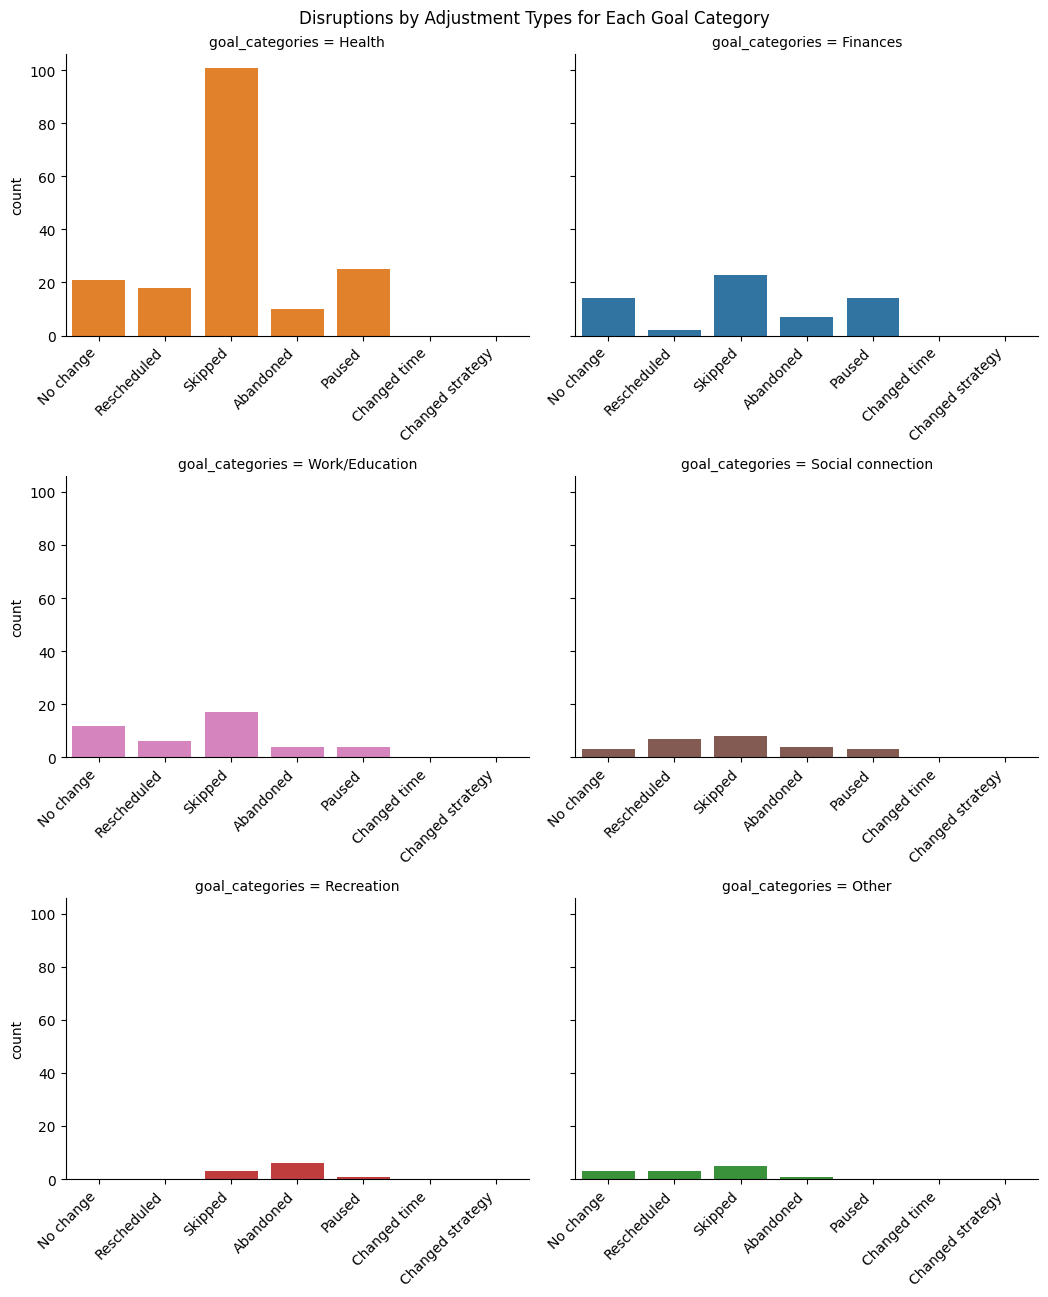

In [ ]:
# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_changes_df = count_by_goal_changes.reset_index()

#rename
count_by_goal_changes_df.rename(columns={'pid*gid*cid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['No change', 'Rescheduled', 'Skipped','Abandoned','Paused', 'Changed time', 'Changed strategy']


count_by_goal_changes_df['goal_changes'] = pd.Categorical(count_by_goal_changes_df['goal_changes'], categories=xlabels_order, ordered=True)

#set order of plots
plot_order = ['Health', 'Finances', 'Work/Education','Social connection','Recreation','Other']

# Create a small multiple bar plot using seaborn
g = sns.catplot(x='goal_changes', y='count', hue='goal_categories', data=count_by_goal_changes_df, kind='bar', col='goal_categories', col_wrap=2, col_order=plot_order, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.93, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Adjustment Types for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

## number of disruptions by type of burden created for each goal category

In [ ]:
df['pid*gid*cid'] = df['pid'] + "*" + df['gid'] + "*" + df['cid']

len(df['pid*gid*cid'])
df['pid*gid*cid'].nunique()

disruptions_burden_goaltype = df[['pid', 'gid', 'pid*gid', 'pid*gid*cid', 'goal_categories','disruption_labor_aggregated', 'disruption_status']]
#filter out no disruptions
disruptions_burden_goaltype = disruptions_burden_goaltype[disruptions_burden_goaltype['disruption_status'] == 'Disruption']

# explode this column to ensure each disruption labor type is in a single row

survey_data_exploded = disruptions_burden_goaltype.assign(disruption_labor_split=disruptions_burden_goaltype['disruption_labor_aggregated'].str.split(', ')).explode('disruption_labor_split')


# Filter out 'No response', 'No labor- positive disruption', 'Other' before unstacking
survey_data_exploded = survey_data_exploded[~survey_data_exploded['disruption_labor_split'].isin(['No response','No labor- positive disruption','Other'])]

#grouping [chronic and sleep] and [work and education]
survey_data_exploded['goal_categories'] = survey_data_exploded['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})

survey_data_exploded = survey_data_exploded[['pid*gid*cid', 'disruption_labor_split', 'goal_categories']]

# Group by goal_categories and frequency and count the number of values
count_by_goal_burden = survey_data_exploded.groupby(['goal_categories', 'disruption_labor_split'])['pid*gid*cid'].count()

print(count_by_goal_burden.to_string()) # Use .to_string() to display all rows of the DataFrame


# Perform groupby and unstack to get the desired format
#disruption_labor_data = survey_data_exploded.groupby(['goal_categories', 'disruption_labor_split'])['pid*gid*cid'].count()

# Reset index to make 'goal_categories' a column again
#disruption_labor_data = disruption_labor_data.reset_index()

goal_categories              disruption_labor_split
Cleaning/organizing          Emotional                  7
                             Logistical                 1
                             Physical                   5
Financial Stability/Safety   Emotional                 55
                             Financial                 30
                             Logistical                22
                             Physical                   7
Health - other               Emotional                 12
                             Financial                  2
                             Logistical                 5
                             Physical                   4
Housing                      Emotional                 19
                             Financial                  9
                             Logistical                 3
                             Physical                   1
Mental health and wellbeing  Emotional                 72
                    

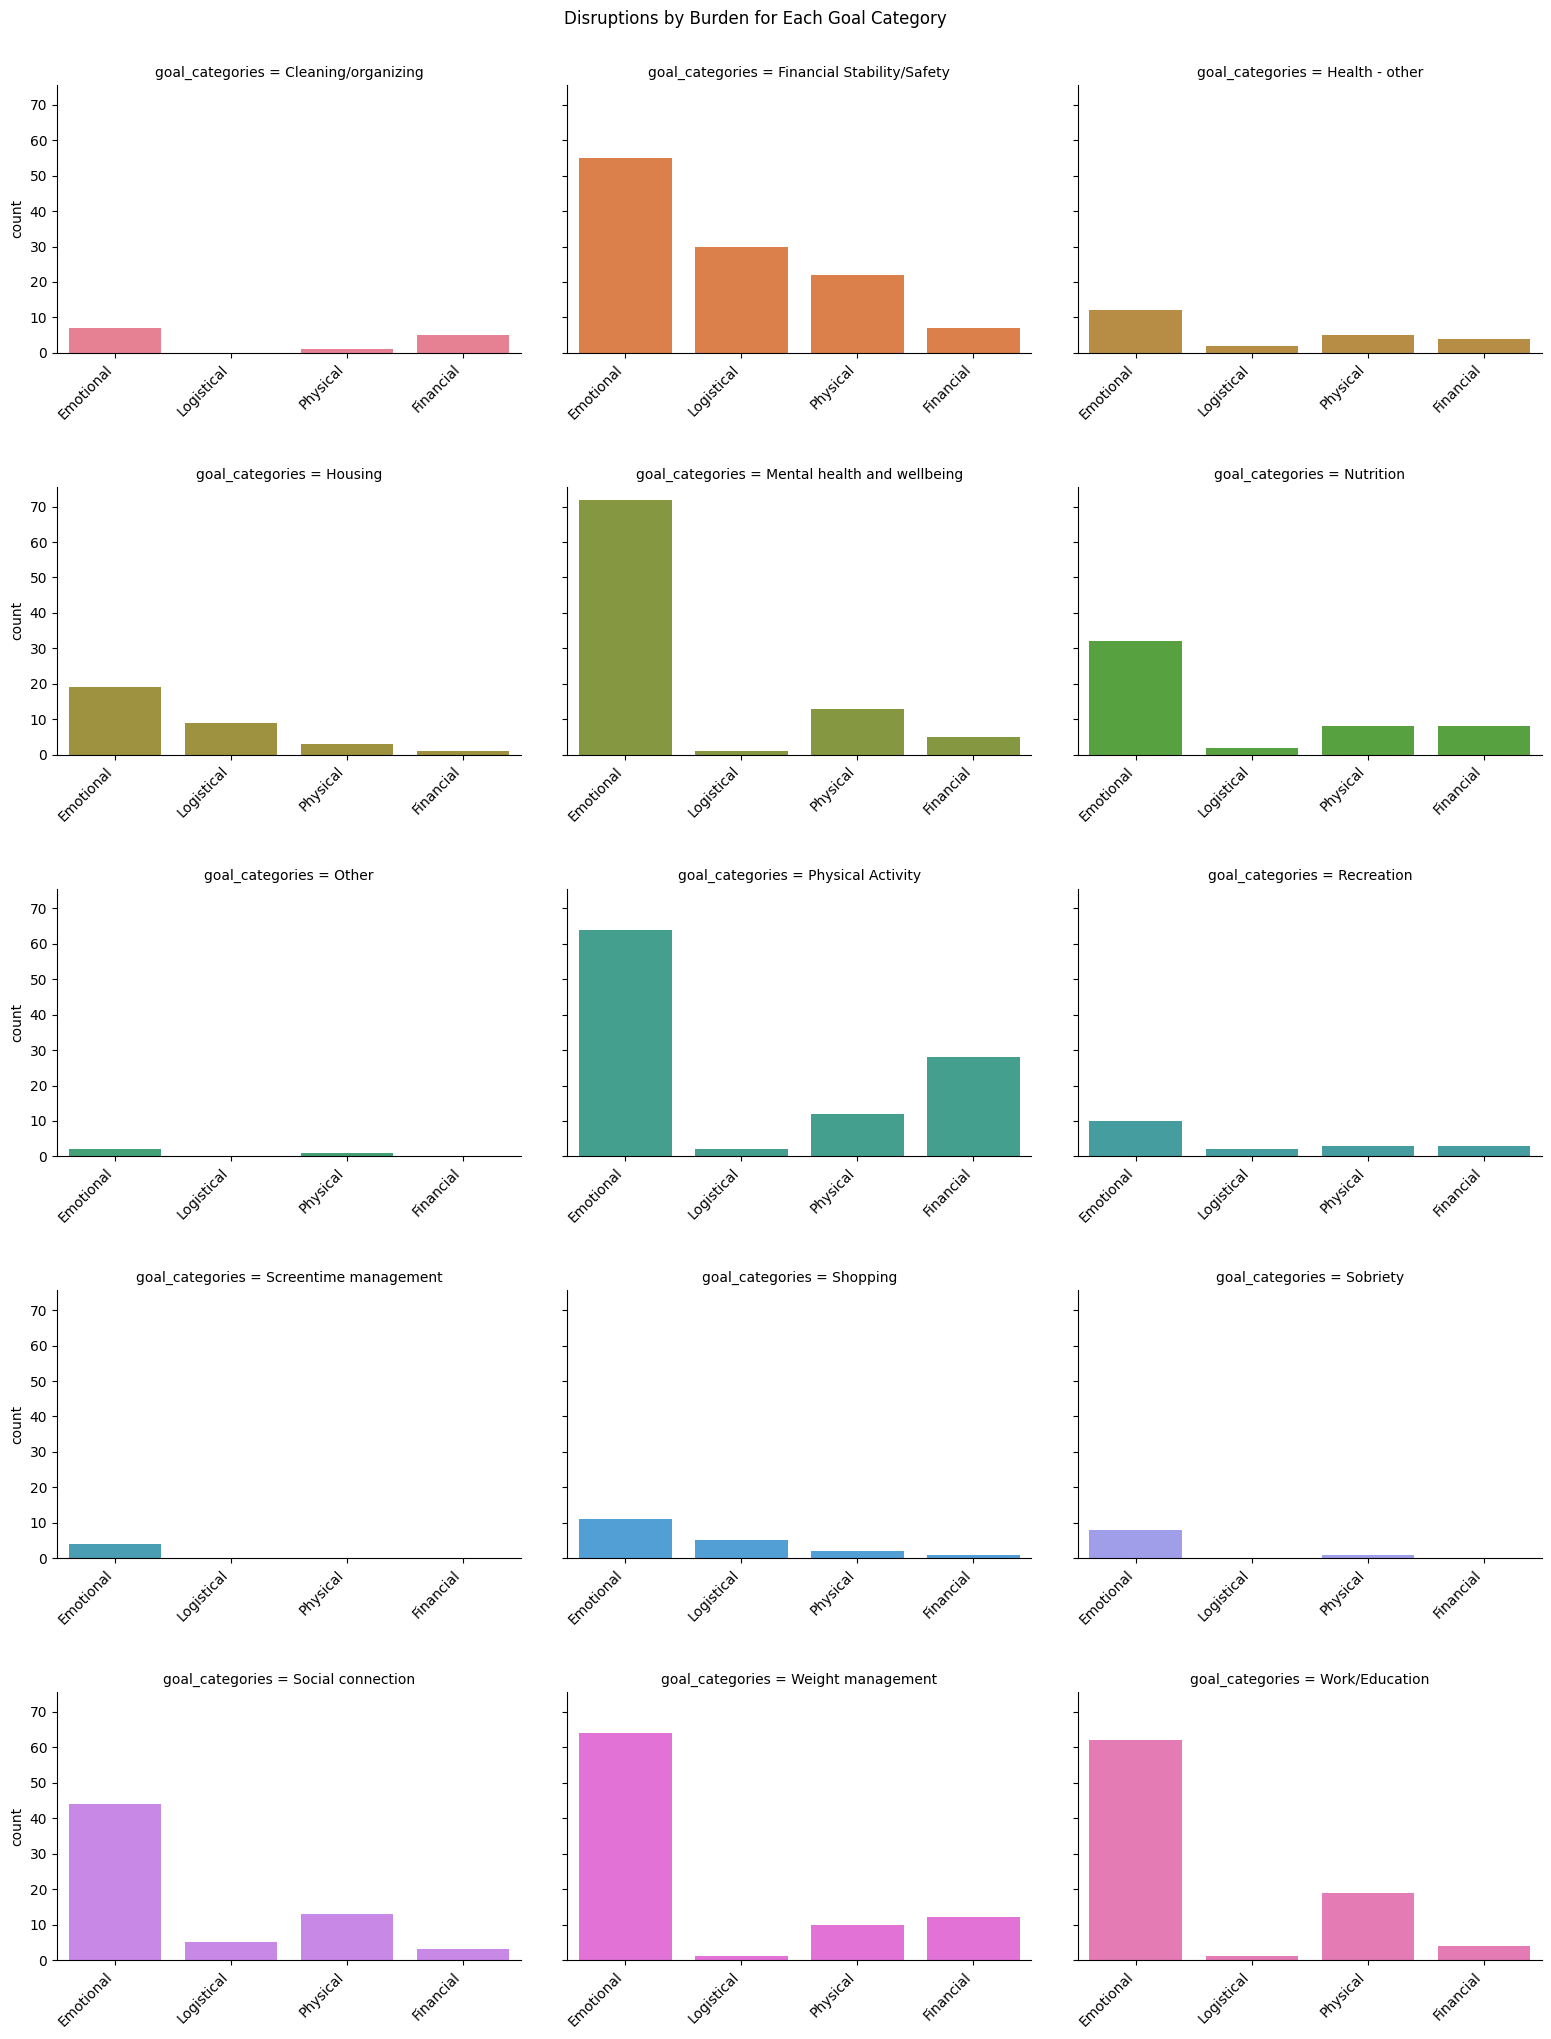

In [ ]:
# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_burden_df = count_by_goal_burden.reset_index()

#rename
count_by_goal_burden_df.rename(columns={'pid*gid*cid': 'count'}, inplace=True)


count_by_goal_burden_df['disruption_labor_split'] = pd.Categorical(count_by_goal_burden_df['disruption_labor_split'])

# get label and set order
xlabels_order = ['Emotional', 'Logistical', 'Physical','Financial']


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='disruption_labor_split', y='count', hue='goal_categories', data=count_by_goal_burden_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Burden for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order,rotation=45, ha='right')

plt.show()

### for manuscript combining goal categories

In [ ]:
df['pid*gid*cid'] = df['pid'] + "*" + df['gid'] + "*" + df['cid']

len(df['pid*gid*cid'])
df['pid*gid*cid'].nunique()

disruptions_burden_goaltype = df[['pid', 'gid', 'pid*gid', 'pid*gid*cid', 'goal_categories','disruption_labor_aggregated', 'disruption_status']]
#filter out no disruptions
disruptions_burden_goaltype = disruptions_burden_goaltype[disruptions_burden_goaltype['disruption_status'] == 'Disruption']

# explode this column to ensure each disruption labor type is in a single row

survey_data_exploded = disruptions_burden_goaltype.assign(disruption_labor_split=disruptions_burden_goaltype['disruption_labor_aggregated'].str.split(', ')).explode('disruption_labor_split')


# Filter out 'No response', 'No labor- positive disruption', 'Other' before unstacking
survey_data_exploded = survey_data_exploded[~survey_data_exploded['disruption_labor_split'].isin(['No response','No labor- positive disruption','Other'])]

#grouping [chronic and sleep] and [work and education]
survey_data_exploded['goal_categories'] = survey_data_exploded['goal_categories'].replace({
    'Manage chronic condition': 'Health',
    'Sleep': 'Health',
    'Physical Activity': 'Health',
    'Mental health and wellbeing': 'Health',
    'Weight management': 'Health',
    'Nutrition': 'Health',
    'Health - other': 'Health',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education',
    'Financial Stability/Safety': 'Finances',
    'Shopping': 'Finances',
    'Housing': 'Finances',
    'Screentime management': 'Other',
    'Cleaning/organizing' : 'Other'
})

survey_data_exploded = survey_data_exploded[['pid*gid*cid', 'disruption_labor_split', 'goal_categories']]

# Group by goal_categories and frequency and count the number of values
count_by_goal_burden = survey_data_exploded.groupby(['goal_categories', 'disruption_labor_split'])['pid*gid*cid'].count()

print(count_by_goal_burden.to_string()) # Use .to_string() to display all rows of the DataFrame



goal_categories    disruption_labor_split
Finances           Emotional                  85
                   Financial                  44
                   Logistical                 27
                   Physical                    9
Health             Emotional                 244
                   Financial                   8
                   Logistical                 48
                   Physical                   57
Other              Emotional                  13
                   Logistical                  2
                   Physical                    5
Recreation         Emotional                  10
                   Financial                   2
                   Logistical                  3
                   Physical                    3
Sobriety           Emotional                   8
                   Logistical                  1
Social connection  Emotional                  44
                   Financial                   5
                   Logistic



---
## breakdown of number of unique participants who reported a disruption

### number of unique participants who reported a disruption


In [ ]:
# @title
df_goalcategories = df[['pid', 'goal_categories', 'situation_that_occurred', 'disruption_status']]

# drop duplicates
df_goalcategories = df_goalcategories[['pid','goal_categories','situation_that_occurred']].drop_duplicates()

#creating new dataframe for combined categories
df_goalcategories_combined['goal_categories'] = df_goalcategories['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})

#filter out unique values
disruption_by_category = disruptions_by_goal_type_combined.groupby('pid')['goal_categories'].unique()
disruption_by_category = disruption_by_category.reset_index()
# prompt: convert disruption_by_category into a dataframe with pid and goal_categories in separate rows
disruption_by_category= disruption_by_category.explode('goal_categories')

# prompt: dataframe with count of pid for goal_categories in disruption_by_category

disruption_pid_count = disruption_by_category.groupby('goal_categories')['pid'].nunique().reset_index()
disruption_pid_count = disruption_pid_count.rename(columns={'pid': 'count_of_par_disruptions_reported'})
disruption_pid_count

/tmp/ipython-input-458356630.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goalcategories_combined['goal_categories'] = df_goalcategories['goal_categories'].replace({


,goal_categories,count_of_par_disruptions_reported
0,Cleaning,9
1,Finances,64
2,Health,118
3,Other,5
4,Recreation,11
5,Sobriety,5
6,Social connection,29
7,Work/Education,39


## number of participants who reported a disruption of different durations for each goal category
filter out rows with disruption = “no disruption”

OR "how-long" = no-disruption or no-response

include rows with disruption labor = no response because it is still a disruption

In [ ]:
# @title
pp_disruptions_duration_goaltype = df[['pid', 'goal_categories','how-long', 'disruption_status']]


#filter out no disruptions
pp_disruptions_duration_goaltype = pp_disruptions_duration_goaltype[pp_disruptions_duration_goaltype['disruption_status'] == 'Disruption']

#filter out no response
pp_disruptions_duration_goaltype = pp_disruptions_duration_goaltype[pp_disruptions_duration_goaltype['how-long'] != 'No response']

#grouping [chronic and sleep] and [work and education]
pp_disruptions_duration_goaltype['goal_categories'] = pp_disruptions_duration_goaltype['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})

#filter out unique values
pp_disruptions_duration_goaltype = pp_disruptions_duration_goaltype[['pid','goal_categories','how-long']].drop_duplicates()

# prompt: Using dataframe disruptions_duration_goaltype: count of values grouped by goal categories and how-long

# Group by goal_categories and how-long and count the number of values
count_by_goal_howlong = pp_disruptions_duration_goaltype.groupby(['goal_categories', 'how-long'])['pid'].count()
print(count_by_goal_howlong.to_string()) # Use .to_string() to display all rows of the Series

goal_categories              how-long                       
Cleaning/organizing          an hour or less                     2
                             longer than a year                  2
                             more than an hour to half a day     2
                             more than half a day to a day       1
                             multiple days to a week             2
                             multiple months to a year           1
                             multiple weeks to a month           2
Financial Stability/Safety   an hour or less                     1
                             longer than a year                 12
                             more than half a day to a day       3
                             multiple days to a week            10
                             multiple months to a year          19
                             multiple weeks to a month          18
Health - other               an hour or less                     1
 

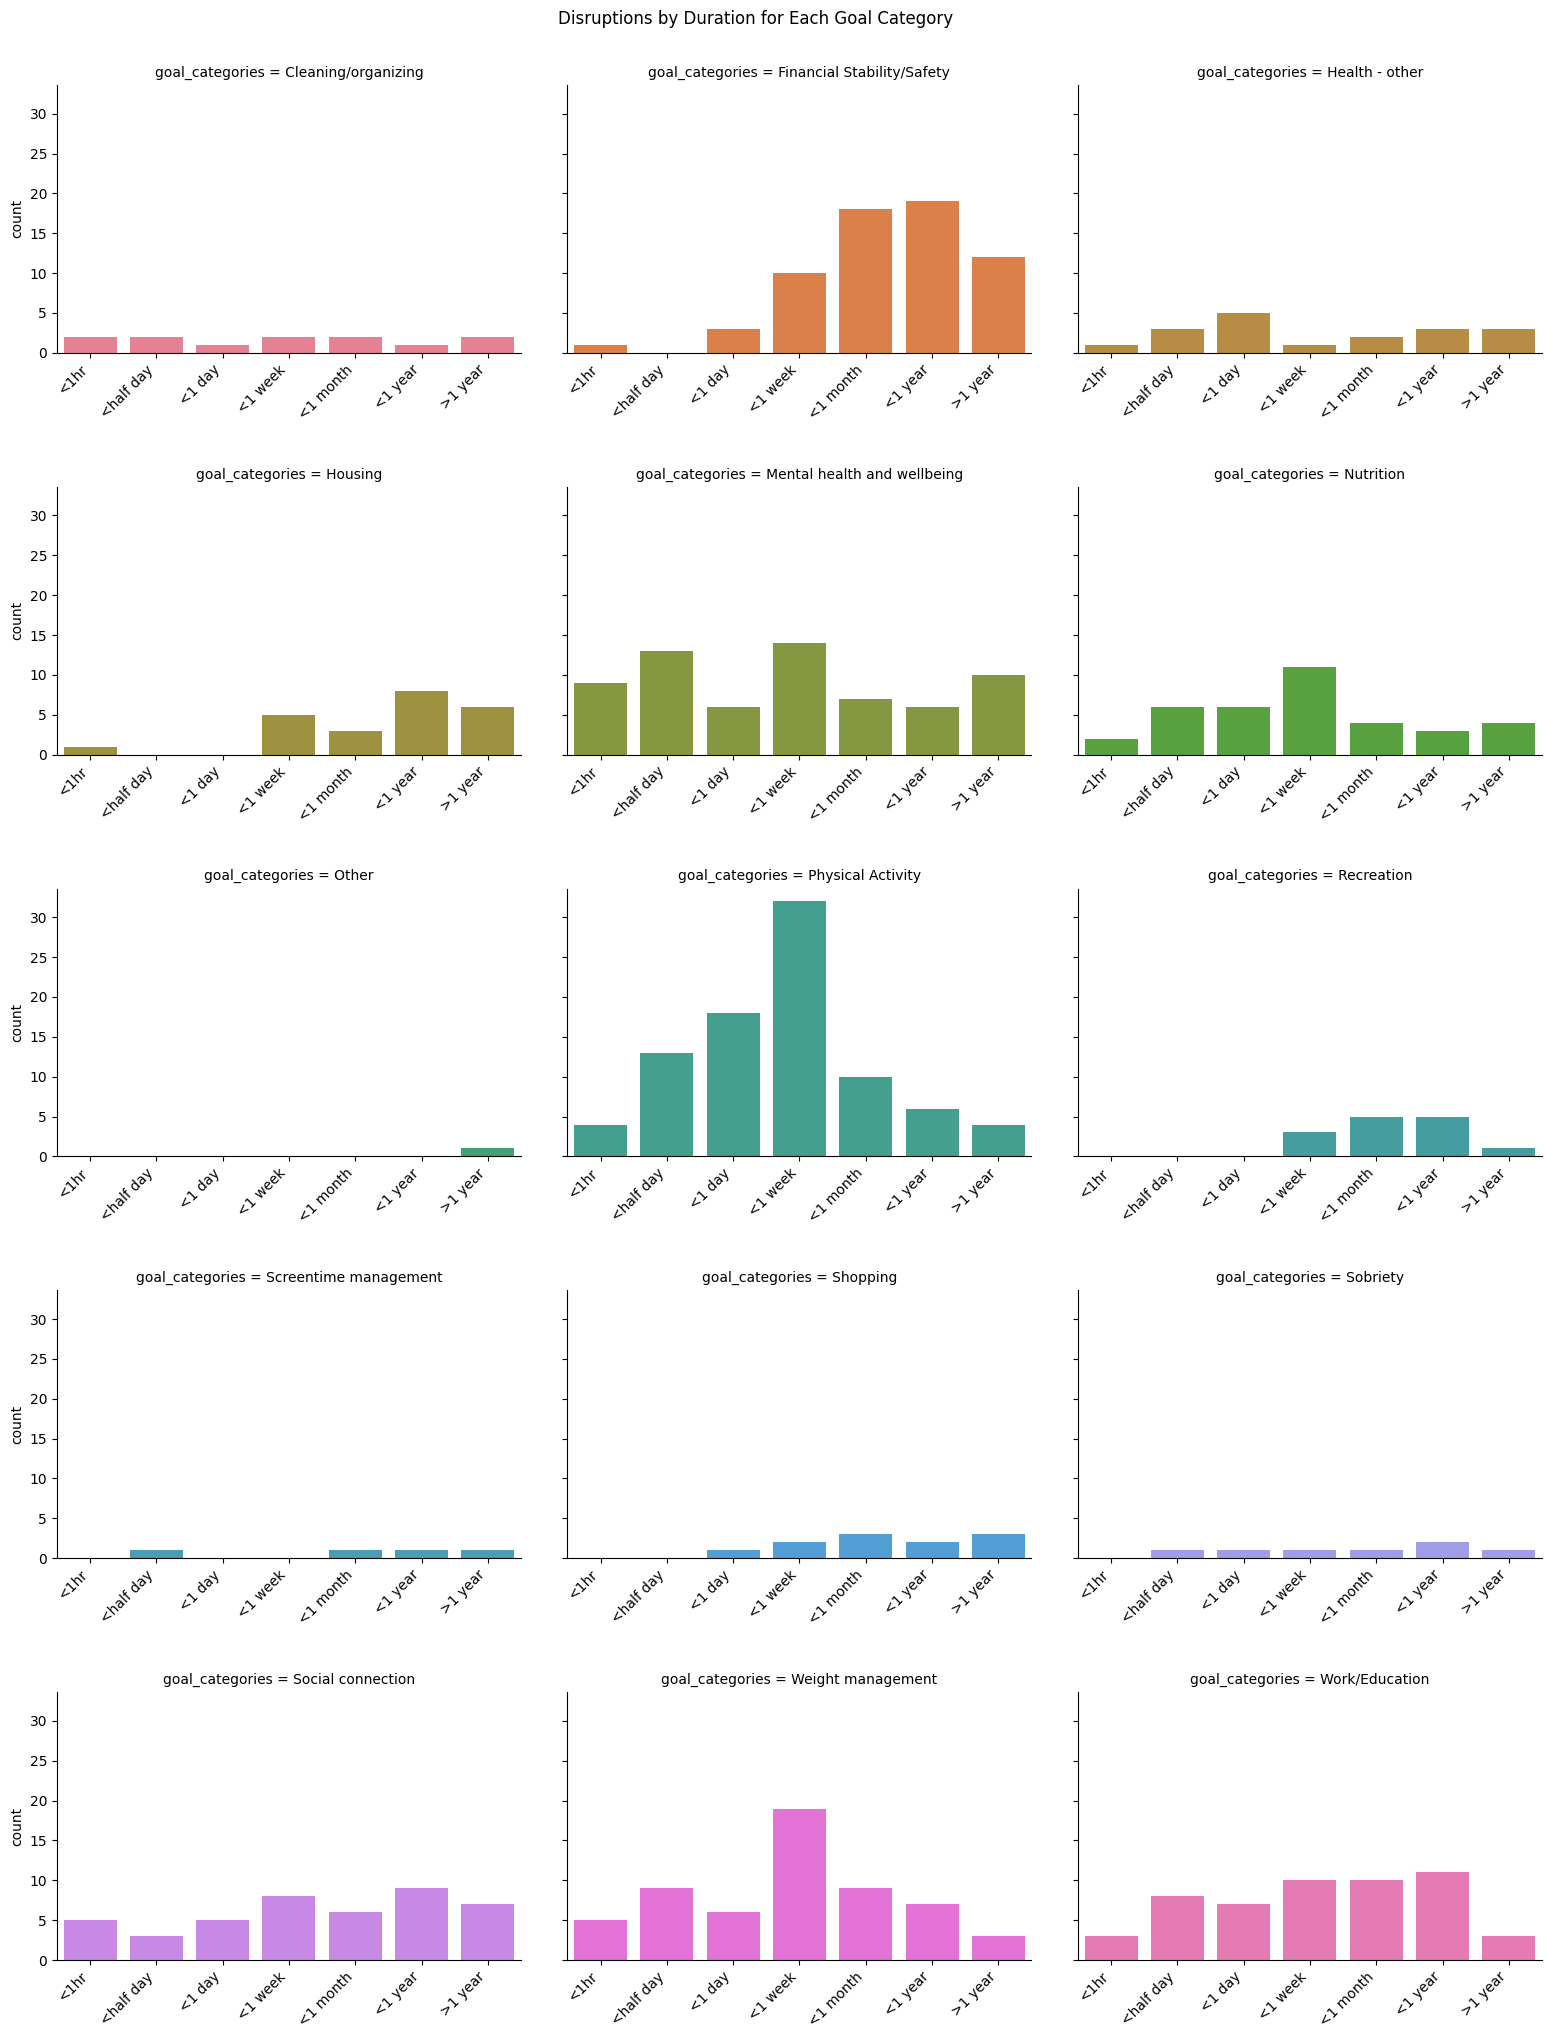

In [ ]:
# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_howlong_df = count_by_goal_howlong.reset_index()
# Rename the label names for clarity
count_by_goal_howlong_df['how-long'] = count_by_goal_howlong_df['how-long'].replace({
    'an hour or less': '<1hr',
    'more than an hour to half a day': '<half day',
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

#rename
count_by_goal_howlong_df.rename(columns={'pid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['<1hr', '<half day', '<1 day', '<1 week', '<1 month', '<1 year', '>1 year']
count_by_goal_howlong_df['how-long'] = pd.Categorical(count_by_goal_howlong_df['how-long'], categories=xlabels_order, ordered=True)


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='how-long', y='count', hue='goal_categories', data=count_by_goal_howlong_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Duration for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

### combined 1hr and <half day

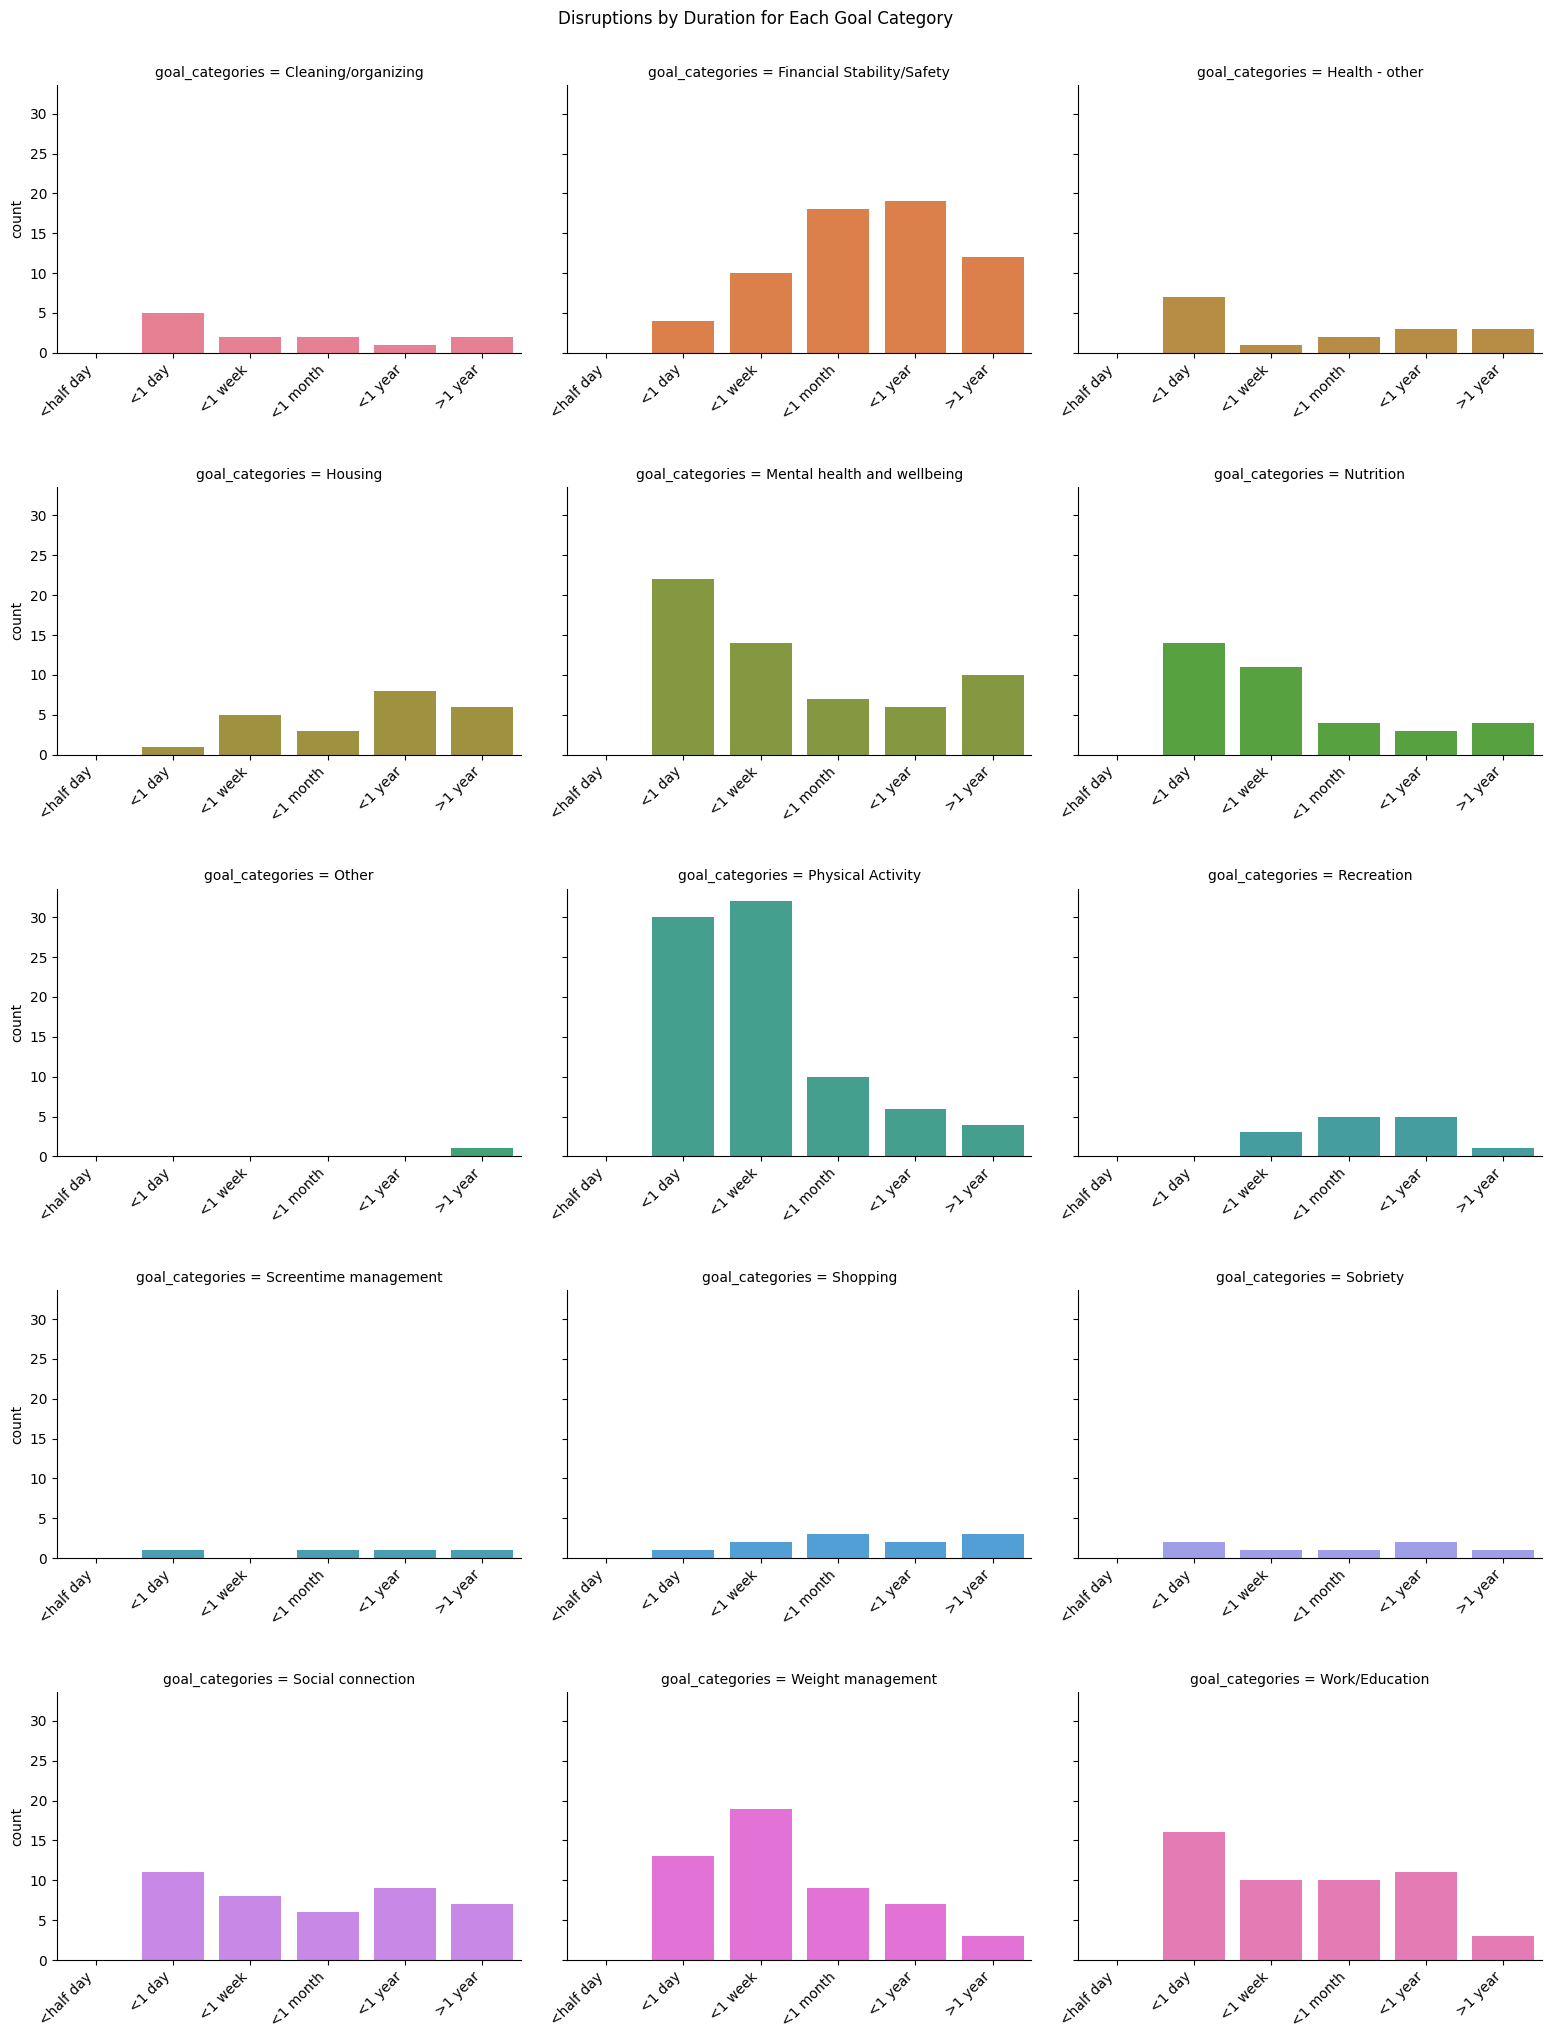

In [ ]:
#grouping [<1hr,<half day]
disruptions_duration_goaltype_combo = pp_disruptions_duration_goaltype
disruptions_duration_goaltype_combo['how-long'] = disruptions_duration_goaltype['how-long'].replace({
    'an hour or less': 'more than an hour to half a day'
})


disruptions_duration_goaltype_combo= disruptions_duration_goaltype_combo[['pid', 'how-long', 'goal_categories']]
#filter out unique values
disruptions_duration_goaltype_combo = disruptions_duration_goaltype_combo[['pid','goal_categories','how-long']].drop_duplicates()
# Group by goal_categories and how-long and count the number of values
count_by_goal_howlong_c = disruptions_duration_goaltype_combo.groupby(['goal_categories', 'how-long'])['pid'].count()

# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_howlong_c_df = count_by_goal_howlong_c.reset_index()
# Rename the label names for clarity
count_by_goal_howlong_c_df['how-long'] = count_by_goal_howlong_c_df['how-long'].replace({
    'more than an hour to half a day': '<half day',
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

#rename
count_by_goal_howlong_c_df.rename(columns={'pid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['<half day', '<1 day', '<1 week', '<1 month', '<1 year', '>1 year']
count_by_goal_howlong_c_df['how-long'] = pd.Categorical(count_by_goal_howlong_c_df['how-long'], categories=xlabels_order, ordered=True)


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='how-long', y='count', hue='goal_categories', data=count_by_goal_howlong_c_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Duration for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

### combining <less than a day and goal categories

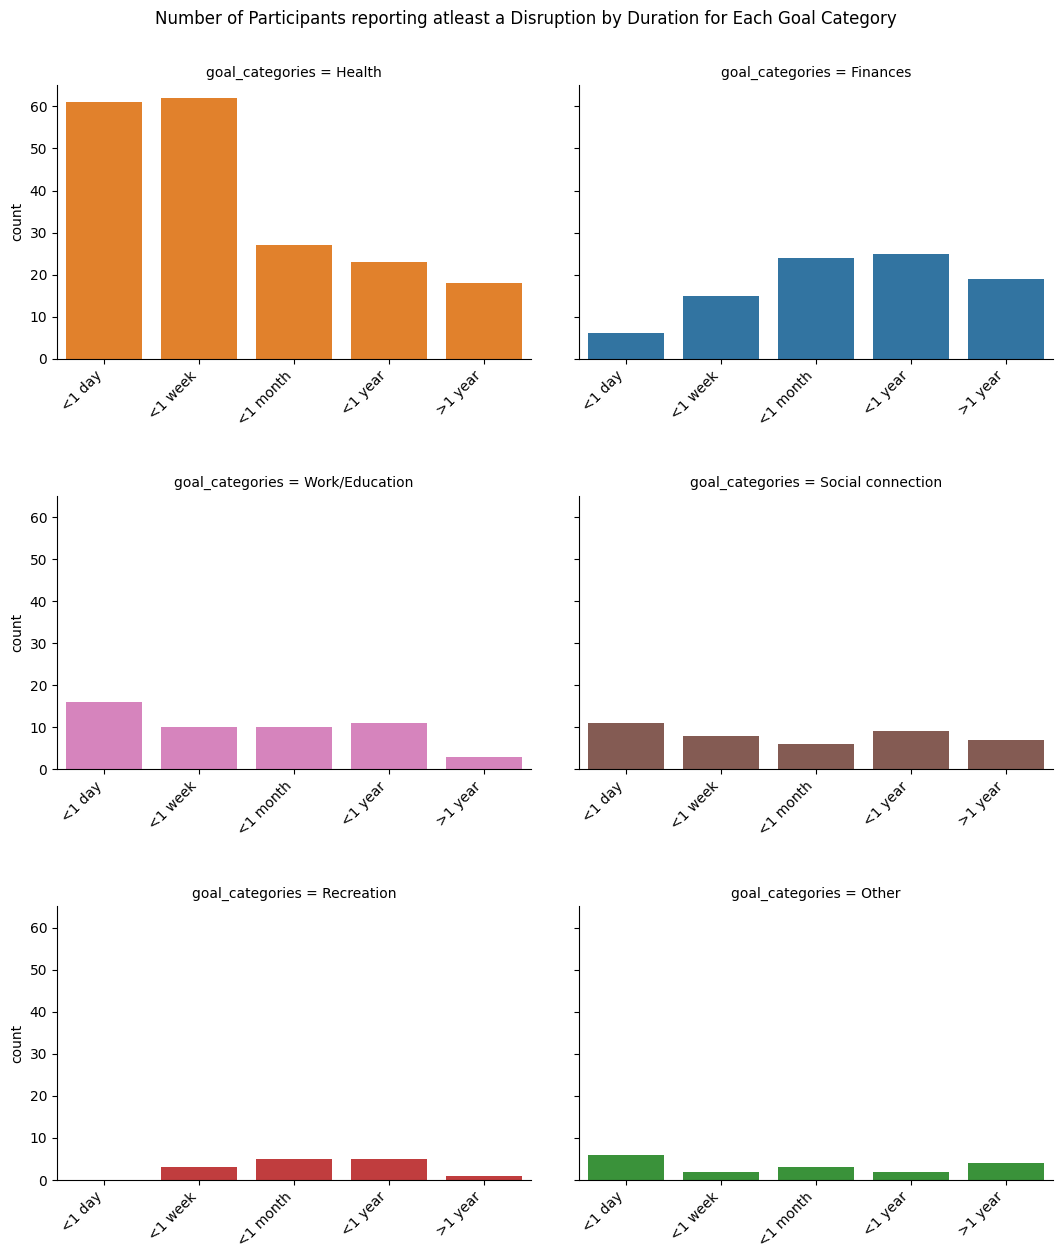

In [ ]:
#grouping [<1hr,<half day]
disruptions_duration_goaltype_combo = pp_disruptions_duration_goaltype
disruptions_duration_goaltype_combo['how-long'] = disruptions_duration_goaltype['how-long'].replace({
    'an hour or less': 'more than half a day to a day',
    'more than an hour to half a day': 'more than half a day to a day'
})

# grouping goals
disruptions_duration_goaltype_combo['goal_categories'] = disruptions_duration_goaltype_combo['goal_categories'].replace({
    'Manage chronic condition': 'Health',
    'Sleep': 'Health',
    'Physical Activity': 'Health',
    'Mental health and wellbeing': 'Health',
    'Weight management': 'Health',
    'Nutrition': 'Health',
    'Health - other': 'Health',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education',
    'Financial Stability/Safety': 'Finances',
    'Shopping': 'Finances',
    'Housing': 'Finances',
    'Screentime management': 'Other',
    'Cleaning/organizing' : 'Other'
})



disruptions_duration_goaltype_combo= disruptions_duration_goaltype_combo[['pid', 'how-long', 'goal_categories']]
#filter out unique values
disruptions_duration_goaltype_combo = disruptions_duration_goaltype_combo[['pid','goal_categories','how-long']].drop_duplicates()

# Group by goal_categories and how-long and count the number of values
count_by_goal_howlong_c = disruptions_duration_goaltype_combo.groupby(['goal_categories', 'how-long'])['pid'].count()

# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_howlong_c_df = count_by_goal_howlong_c.reset_index()
# Rename the label names for clarity
count_by_goal_howlong_c_df['how-long'] = count_by_goal_howlong_c_df['how-long'].replace({
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

#rename
count_by_goal_howlong_c_df.rename(columns={'pid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['<1 day', '<1 week', '<1 month', '<1 year', '>1 year']
count_by_goal_howlong_c_df['how-long'] = pd.Categorical(count_by_goal_howlong_c_df['how-long'], categories=xlabels_order, ordered=True)

#set order of plots
plot_order = ['Health', 'Finances', 'Work/Education','Social connection','Recreation','Other']

# Create a small multiple bar plot using seaborn
g = sns.catplot(x='how-long', y='count', hue='goal_categories', data=count_by_goal_howlong_c_df, kind='bar', col='goal_categories', col_wrap=2, col_order=plot_order,sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.93, wspace=0.1, hspace=0.5)
g.fig.suptitle('Number of Participants reporting atleast a Disruption by Duration for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

## count of participants as a % instead of number


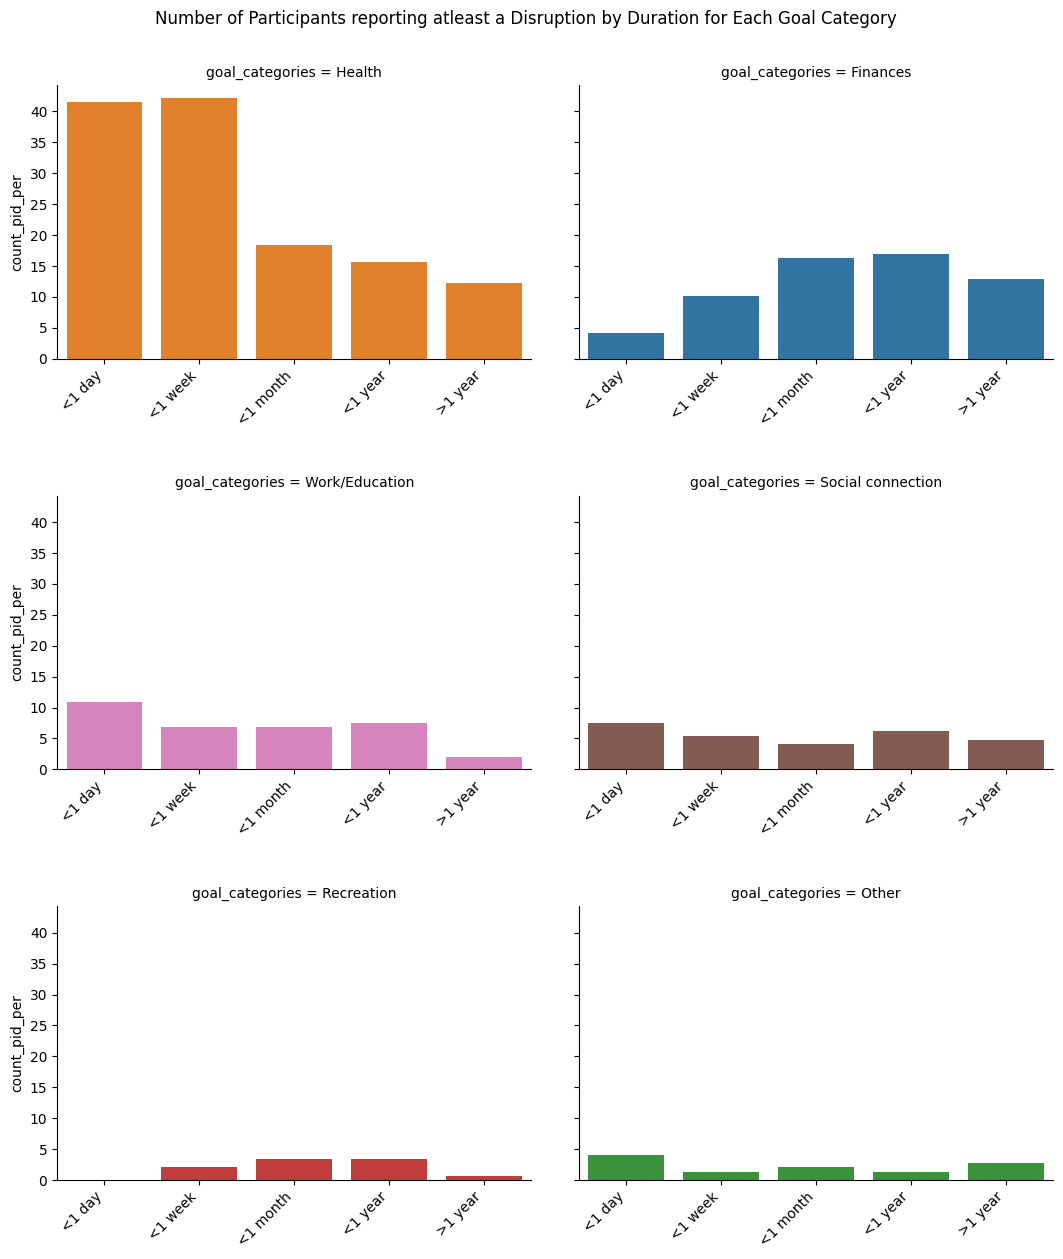

In [ ]:
#grouping [<1hr,<half day]
disruptions_duration_goaltype_combo = pp_disruptions_duration_goaltype
disruptions_duration_goaltype_combo['how-long'] = disruptions_duration_goaltype['how-long'].replace({
    'an hour or less': 'more than half a day to a day',
    'more than an hour to half a day': 'more than half a day to a day'
})

# grouping goals
disruptions_duration_goaltype_combo['goal_categories'] = disruptions_duration_goaltype_combo['goal_categories'].replace({
    'Manage chronic condition': 'Health',
    'Sleep': 'Health',
    'Physical Activity': 'Health',
    'Mental health and wellbeing': 'Health',
    'Weight management': 'Health',
    'Nutrition': 'Health',
    'Health - other': 'Health',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education',
    'Financial Stability/Safety': 'Finances',
    'Shopping': 'Finances',
    'Housing': 'Finances',
    'Screentime management': 'Other',
    'Cleaning/organizing' : 'Other'
})



disruptions_duration_goaltype_combo= disruptions_duration_goaltype_combo[['pid', 'how-long', 'goal_categories']]

#sum of pids for calculating % should be around 149
tot_pid=disruptions_duration_goaltype_combo['pid'].nunique()

#filter out unique values
disruptions_duration_goaltype_combo = disruptions_duration_goaltype_combo[['pid','goal_categories','how-long']].drop_duplicates()

# Group by goal_categories and how-long and count the number of values
count_by_goal_howlong_c = disruptions_duration_goaltype_combo.groupby(['goal_categories', 'how-long'])['pid'].count()

#saving as a dataframe for manipulation
count_by_goal_howlong_c_df = count_by_goal_howlong_c.reset_index()

# add new column count_pid_per with count as a % of tot_pid
count_by_goal_howlong_c_df['count_pid_per'] = count_by_goal_howlong_c_df['pid'] / tot_pid * 100

# Rename the label names for clarity
count_by_goal_howlong_c_df['how-long'] = count_by_goal_howlong_c_df['how-long'].replace({
    'more than half a day to a day': '<1 day',
    'multiple days to a week': '<1 week',
    'multiple weeks to a month': '<1 month',
    'multiple months to a year': '<1 year',
    'longer than a year': '>1 year'
})

#rename
count_by_goal_howlong_c_df.rename(columns={'pid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['<1 day', '<1 week', '<1 month', '<1 year', '>1 year']
count_by_goal_howlong_c_df['how-long'] = pd.Categorical(count_by_goal_howlong_c_df['how-long'], categories=xlabels_order, ordered=True)

#set order of plots
plot_order = ['Health', 'Finances', 'Work/Education','Social connection','Recreation','Other']

# Create a small multiple bar plot using seaborn
g = sns.catplot(x='how-long', y='count_pid_per', hue='goal_categories', data=count_by_goal_howlong_c_df, kind='bar', col='goal_categories', col_wrap=2, col_order=plot_order,sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.93, wspace=0.1, hspace=0.5)
g.fig.suptitle('Number of Participants reporting atleast a Disruption by Duration for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

## of different frequency

In [ ]:
df['pid'].nunique()

disruptions_frequency_goaltype = df[['pid', 'goal_categories','frequency', 'disruption_status']]


#filter out no disruptions
disruptions_frequency_goaltype = disruptions_frequency_goaltype[disruptions_frequency_goaltype['disruption_status'] == 'Disruption']

#filter out no response
disruptions_frequency_goaltype = disruptions_frequency_goaltype[disruptions_frequency_goaltype['frequency'] != 'No response']

#grouping [chronic and sleep] and [work and education]
disruptions_frequency_goaltype['goal_categories'] = disruptions_frequency_goaltype['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})


disruptions_frequency_goaltype = disruptions_frequency_goaltype[['pid', 'frequency', 'goal_categories']]

#filter out unique values
disruptions_frequency_goaltype = disruptions_frequency_goaltype[['pid','goal_categories','frequency']].drop_duplicates()

# Group by goal_categories and frequency and count the number of values
count_by_goal_frequency = disruptions_frequency_goaltype.groupby(['goal_categories', 'frequency'])['pid'].count()
print(count_by_goal_frequency.to_string()) # Use .to_string() to display all rows of the Series

goal_categories              frequency       
Cleaning/organizing          daily                5
                             every other week     2
                             monthly              1
                             weekly               3
                             yearly or less       2
Financial Stability/Safety   daily                9
                             every 6 months       9
                             every other week     7
                             monthly             18
                             weekly               6
                             yearly or less      14
Health - other               daily                4
                             every 6 months       3
                             monthly              5
                             weekly               6
                             yearly or less       1
Housing                      daily                5
                             every 6 months       5
                  

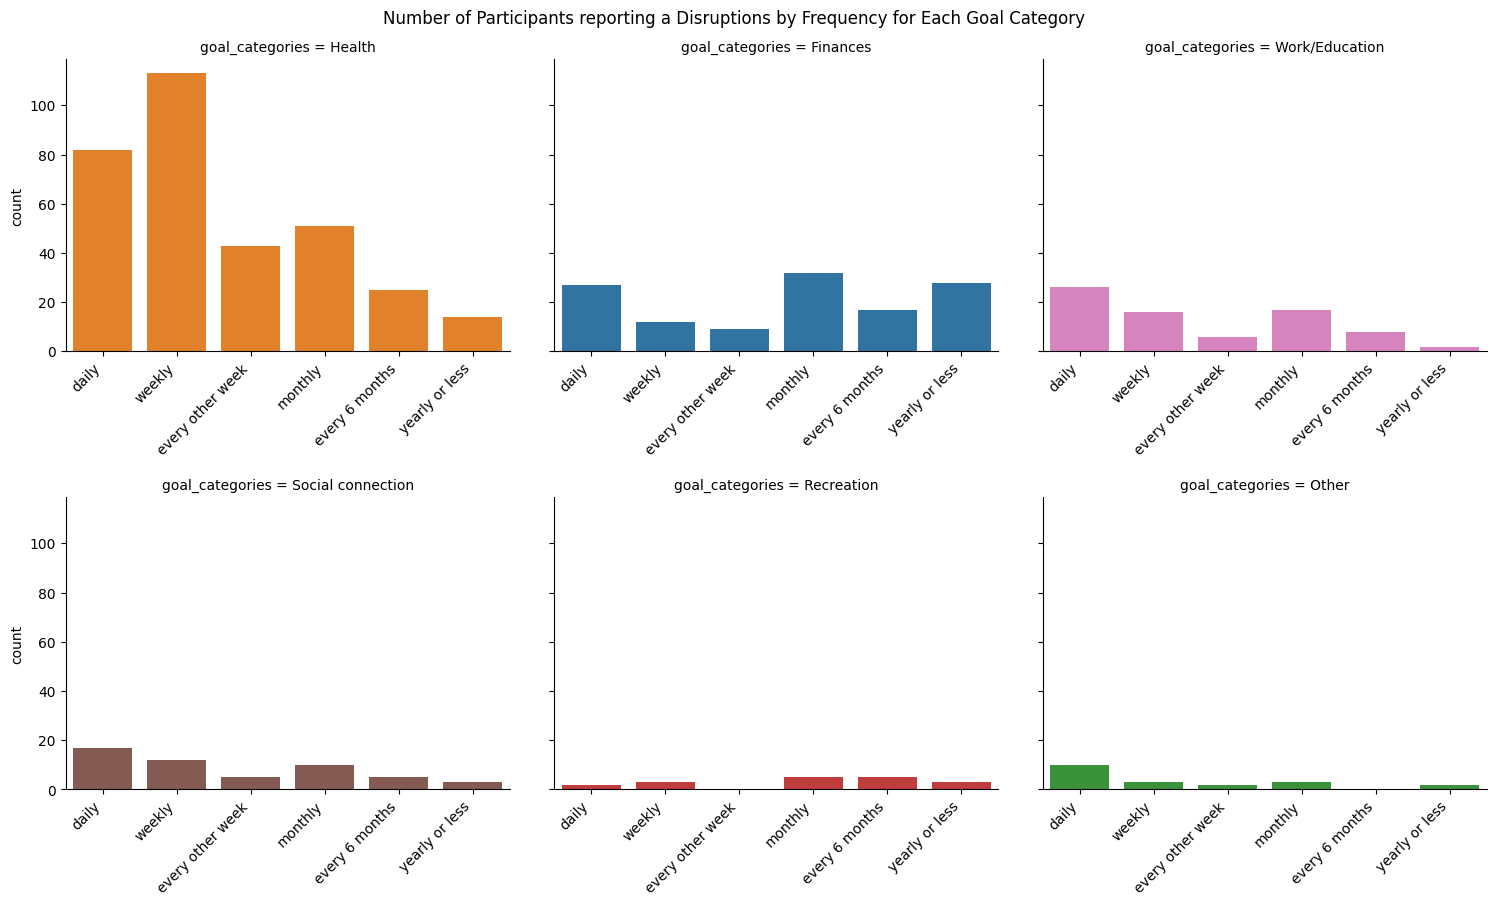

In [ ]:
# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_frequency_df = count_by_goal_frequency.reset_index()

#rename
count_by_goal_frequency_df.rename(columns={'pid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['daily','weekly','every other week', 'monthly','every 6 months','yearly or less']

count_by_goal_freq_df['frequency'] = pd.Categorical(count_by_goal_freq_df['frequency'], categories=xlabels_order, ordered=True)

#set order of plots
plot_order = ['Health', 'Finances', 'Work/Education','Social connection','Recreation','Other']


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='frequency', y='count', hue='goal_categories', data=count_by_goal_freq_df, kind='bar', col='goal_categories', col_wrap=3, col_order=plot_order,sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.93, wspace=0.1, hspace=0.5)
g.fig.suptitle('Number of Participants reporting a Disruptions by Frequency for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

### combining goal categories

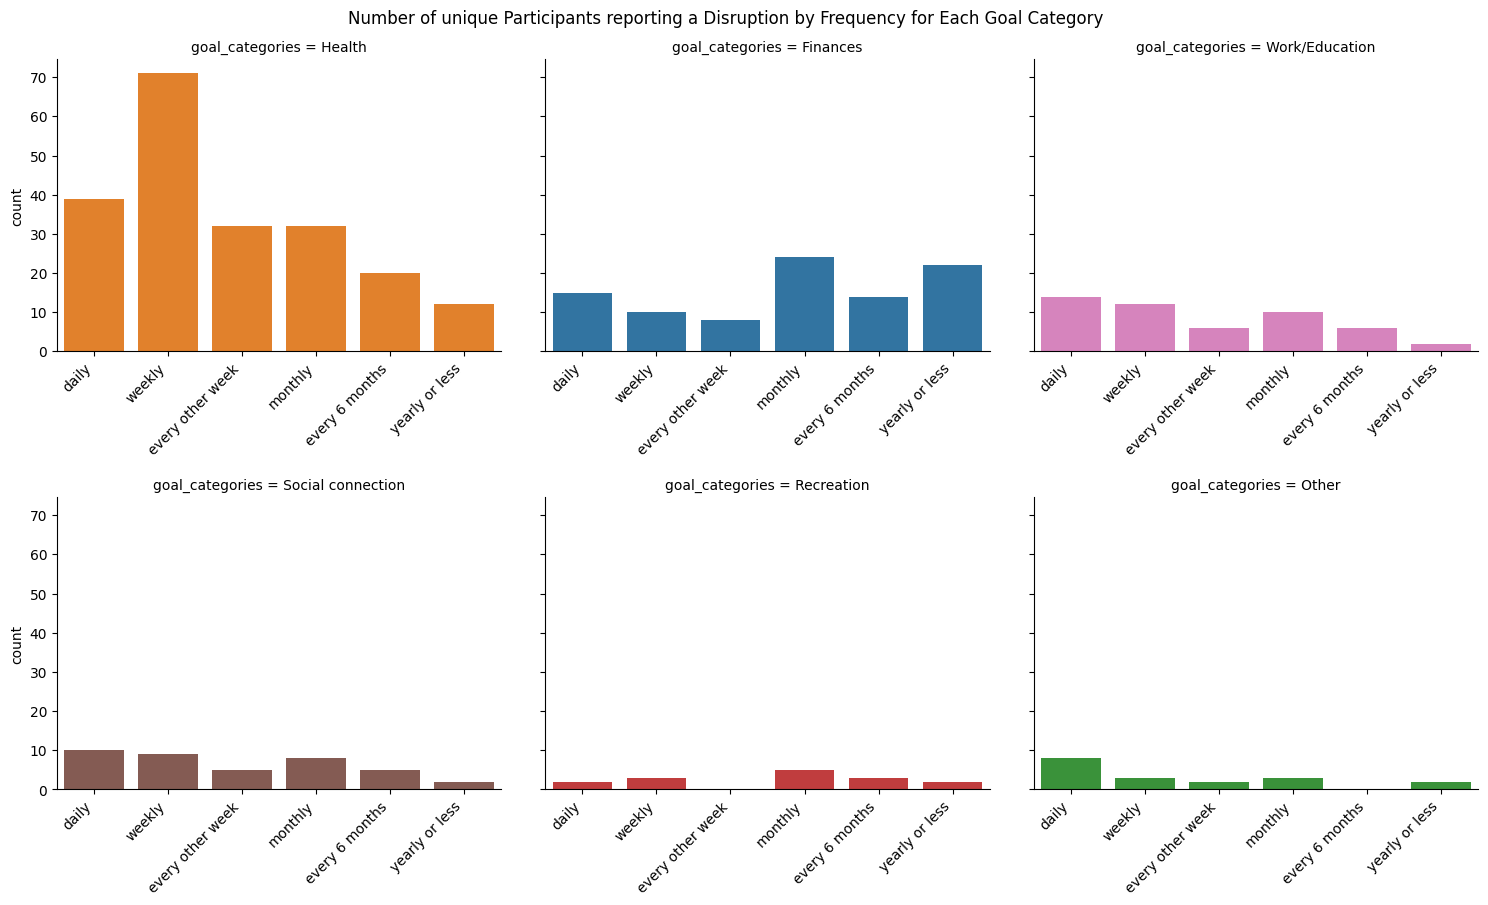

In [ ]:
#grouping goal categories
disruptions_frequency_goaltype['goal_categories'] = disruptions_frequency_goaltype['goal_categories'].replace({
    'Manage chronic condition': 'Health',
    'Sleep': 'Health',
    'Physical Activity': 'Health',
    'Mental health and wellbeing': 'Health',
    'Weight management': 'Health',
    'Nutrition': 'Health',
    'Health - other': 'Health',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education',
    'Financial Stability/Safety': 'Finances',
    'Shopping': 'Finances',
    'Housing': 'Finances',
    'Screentime management': 'Other',
    'Cleaning/organizing' : 'Other'
})

#filter out unique values
disruptions_frequency_goaltype = disruptions_frequency_goaltype[['pid','goal_categories','frequency']].drop_duplicates()

# Group by goal_categories and frequency and count the number of values
count_by_goal_frequency = disruptions_frequency_goaltype.groupby(['goal_categories', 'frequency'])['pid'].count()

# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_frequency_df = count_by_goal_frequency.reset_index()


#rename
count_by_goal_frequency_df.rename(columns={'pid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['daily','weekly','every other week', 'monthly','every 6 months','yearly or less']

count_by_goal_frequency_df['frequency'] = pd.Categorical(count_by_goal_frequency_df['frequency'], categories=xlabels_order, ordered=True)

#set order of plots
plot_order = ['Health', 'Finances', 'Work/Education','Social connection','Recreation','Other']


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='frequency', y='count', hue='goal_categories', data=count_by_goal_frequency_df, kind='bar', col='goal_categories', col_wrap=3,col_order=plot_order, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.93, wspace=0.1, hspace=0.5)
g.fig.suptitle('Number of unique Participants reporting a Disruption by Frequency for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

## count of participants as  %

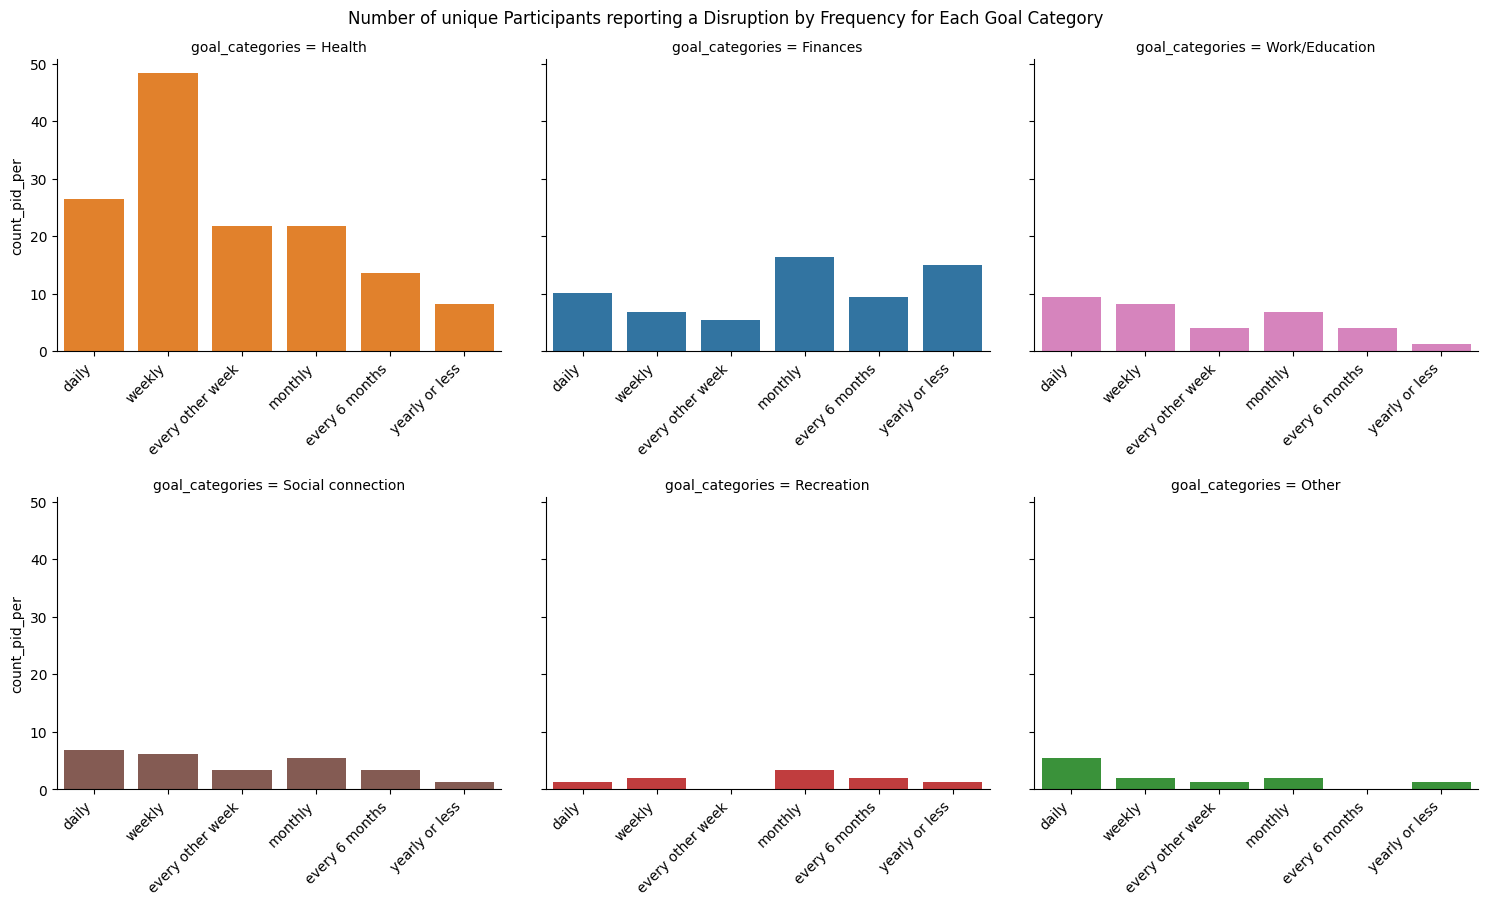

In [ ]:
#grouping goal categories
disruptions_frequency_goaltype['goal_categories'] = disruptions_frequency_goaltype['goal_categories'].replace({
    'Manage chronic condition': 'Health',
    'Sleep': 'Health',
    'Physical Activity': 'Health',
    'Mental health and wellbeing': 'Health',
    'Weight management': 'Health',
    'Nutrition': 'Health',
    'Health - other': 'Health',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education',
    'Financial Stability/Safety': 'Finances',
    'Shopping': 'Finances',
    'Housing': 'Finances',
    'Screentime management': 'Other',
    'Cleaning/organizing' : 'Other'
})

#sum of pids for calculating % should be around 149
tot_pid=disruptions_duration_goaltype_combo['pid'].nunique()

#filter out unique values
disruptions_frequency_goaltype = disruptions_frequency_goaltype[['pid','goal_categories','frequency']].drop_duplicates()

# Group by goal_categories and frequency and count the number of values
count_by_goal_frequency = disruptions_frequency_goaltype.groupby(['goal_categories', 'frequency'])['pid'].count()

# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_frequency_df = count_by_goal_frequency.reset_index()


#rename
count_by_goal_frequency_df.rename(columns={'pid': 'count'}, inplace=True)

# add new column count_pid_per with count as a % of tot_pid
count_by_goal_frequency_df['count_pid_per'] = count_by_goal_frequency_df['count'] / tot_pid * 100

# get label and set order
xlabels_order = ['daily','weekly','every other week', 'monthly','every 6 months','yearly or less']

count_by_goal_frequency_df['frequency'] = pd.Categorical(count_by_goal_frequency_df['frequency'], categories=xlabels_order, ordered=True)

#set order of plots
plot_order = ['Health', 'Finances', 'Work/Education','Social connection','Recreation','Other']


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='frequency', y='count_pid_per', hue='goal_categories', data=count_by_goal_frequency_df, kind='bar', col='goal_categories', col_wrap=3,col_order=plot_order, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.93, wspace=0.1, hspace=0.5)
g.fig.suptitle('Number of unique Participants reporting a Disruption by Frequency for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

## number of participants who reported a disruption with different adjustments for each goal category

In [ ]:
pp_disruptions_changes_goaltype = df[['pid', 'goal_categories','goal_changes', 'disruption_status']]


#filter out no disruptions
pp_disruptions_changes_goaltype = pp_disruptions_changes_goaltype[pp_disruptions_changes_goaltype['disruption_status'] == 'Disruption']

#filter out no response
pp_disruptions_changes_goaltype = pp_disruptions_changes_goaltype[pp_disruptions_changes_goaltype['goal_changes'] != 'No response']

#grouping [chronic and sleep] and [work and education]
pp_disruptions_changes_goaltype['goal_categories'] = pp_disruptions_changes_goaltype['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})


pp_disruptions_changes_goaltype = pp_disruptions_changes_goaltype[['pid', 'goal_changes', 'goal_categories']]
#filter out unique values
pp_disruptions_changes_goaltype = pp_disruptions_changes_goaltype[['pid','goal_categories','goal_changes']].drop_duplicates()

# Group by goal_categories and frequency and count the number of values
count_by_goal_changes = pp_disruptions_changes_goaltype.groupby(['goal_categories', 'goal_changes'])['pid'].count()
print(count_by_goal_changes.to_string()) # Use .to_string() to display all rows of the Series

goal_categories              goal_changes              
Cleaning/organizing          Abandoned                      1
                             Changed environment            1
                             Changed quantity               2
                             Changed/ adopted support       1
                             No change                      2
                             Rescheduled                    3
                             Skipped                        3
                             Substituted activity           1
Financial Stability/Safety   Abandoned                      4
                             Changed environment            3
                             Changed quantity              13
                             Changed strategy-other         3
                             Changed thoughts or belief     2
                             Changed/ adopted support       2
                             No change                      6
              

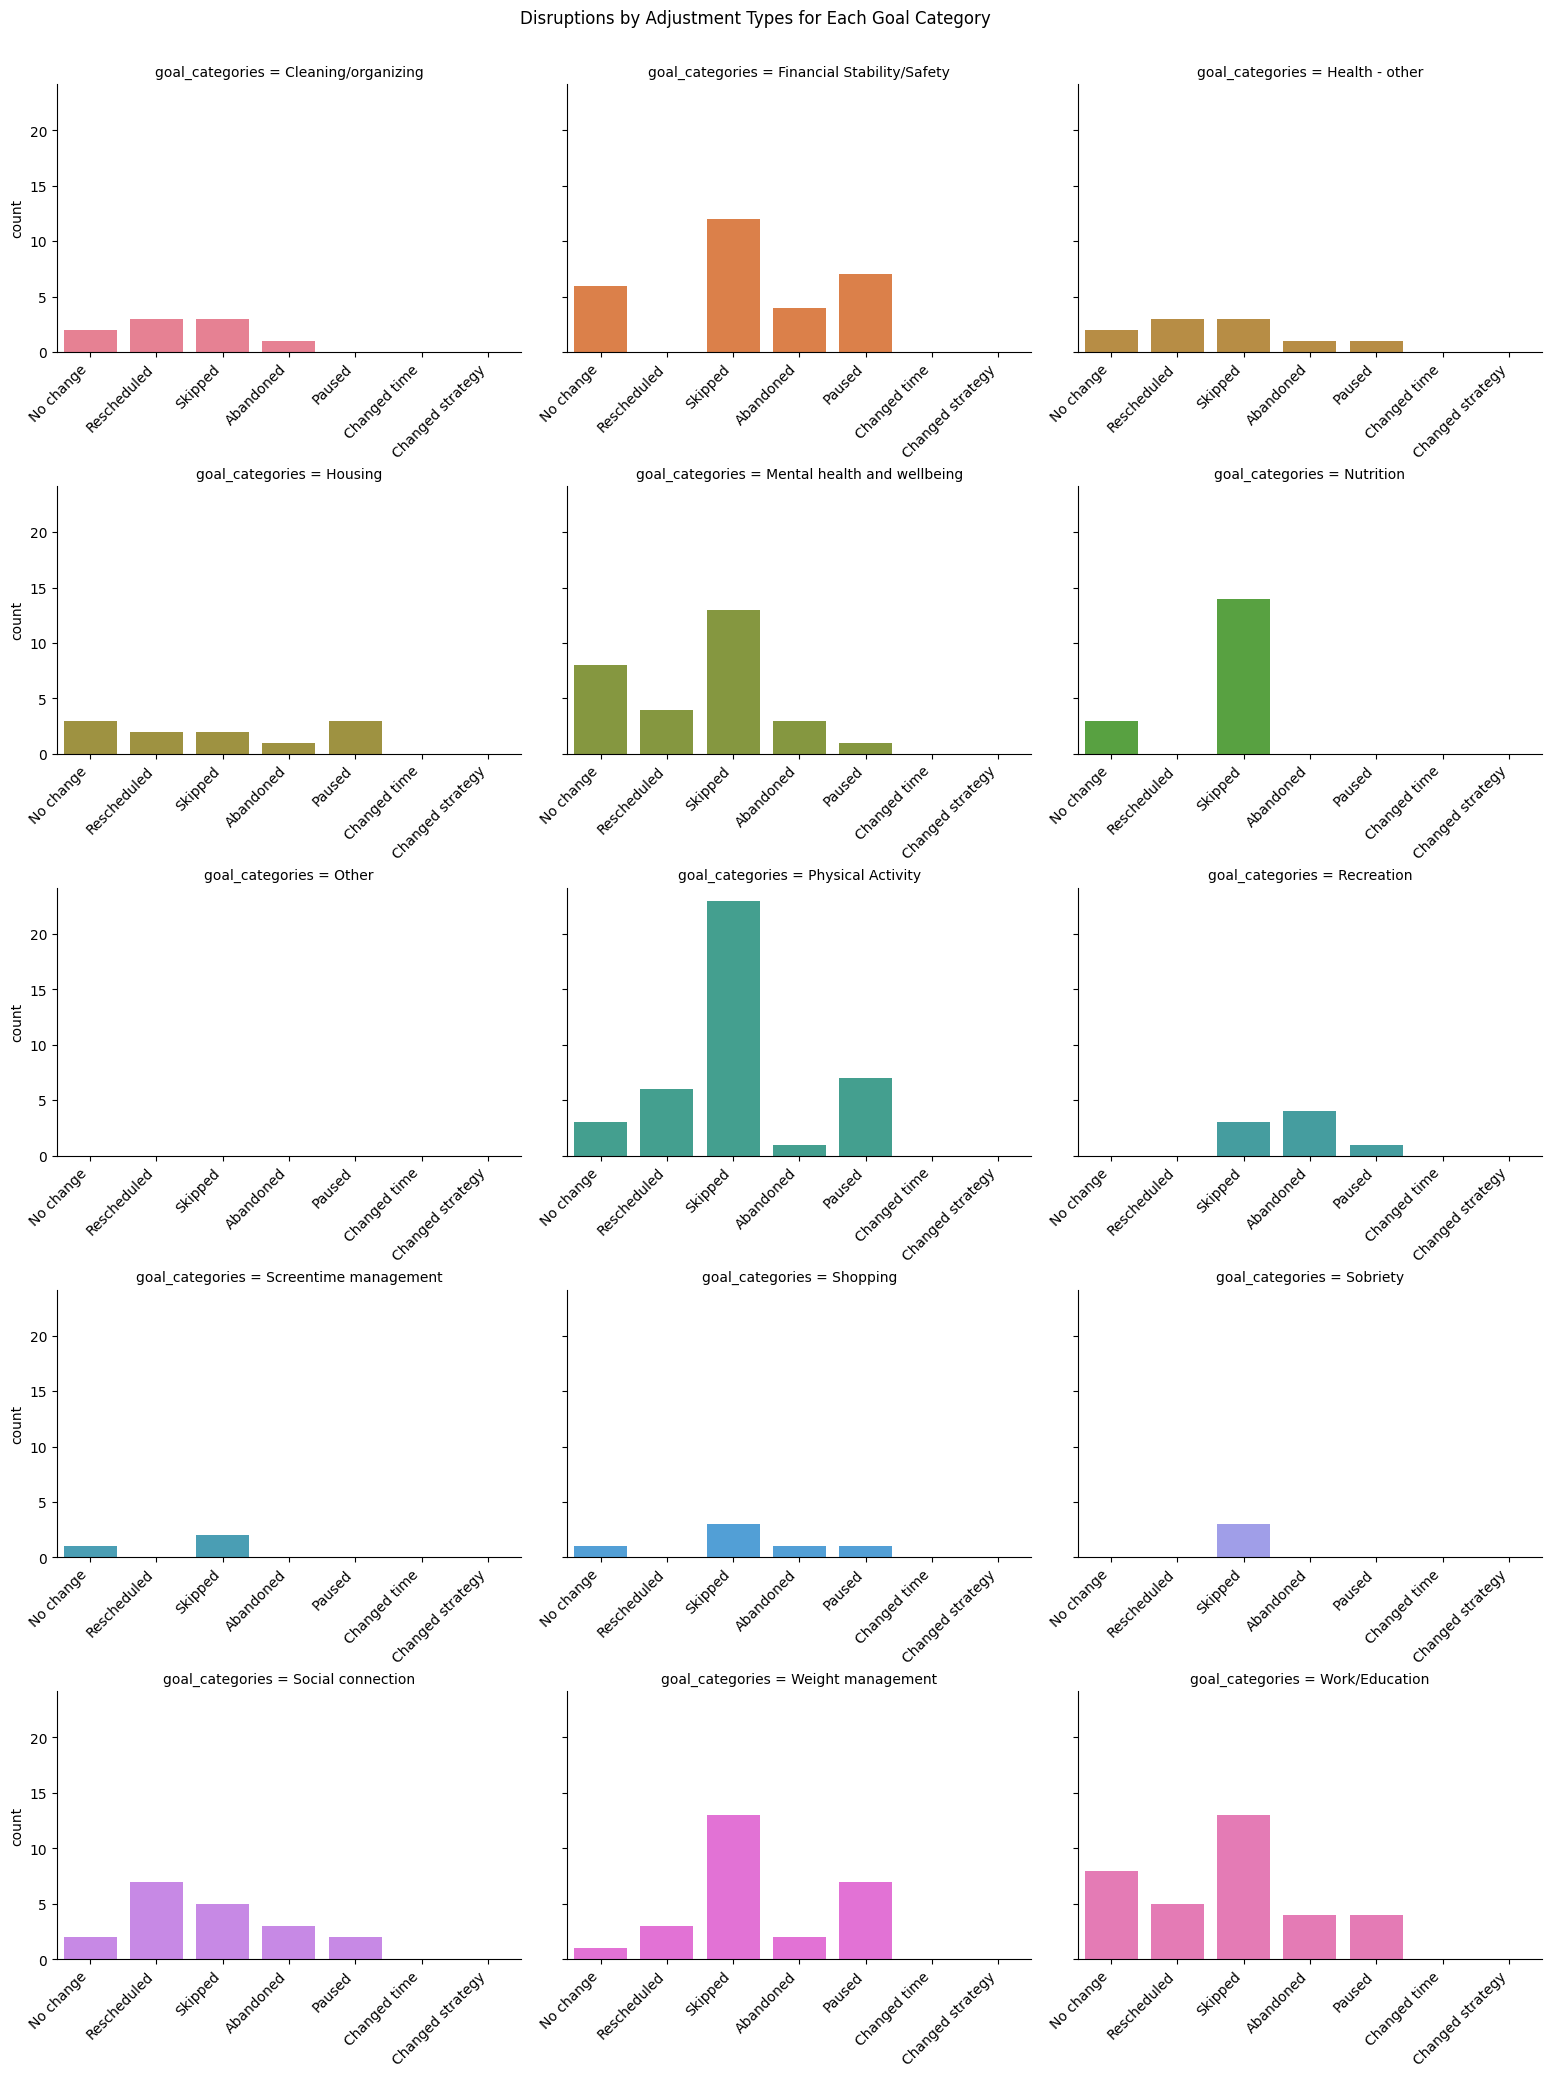

In [ ]:
# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_changes_df = count_by_goal_changes.reset_index()

#rename
count_by_goal_changes_df.rename(columns={'pid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['No change', 'Rescheduled', 'Skipped','Abandoned','Paused', 'Changed time', 'Changed strategy']


count_by_goal_changes_df['goal_changes'] = pd.Categorical(count_by_goal_changes_df['goal_changes'], categories=xlabels_order, ordered=True)


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='goal_changes', y='count', hue='goal_categories', data=count_by_goal_changes_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Adjustment Types for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

### combining goal categories

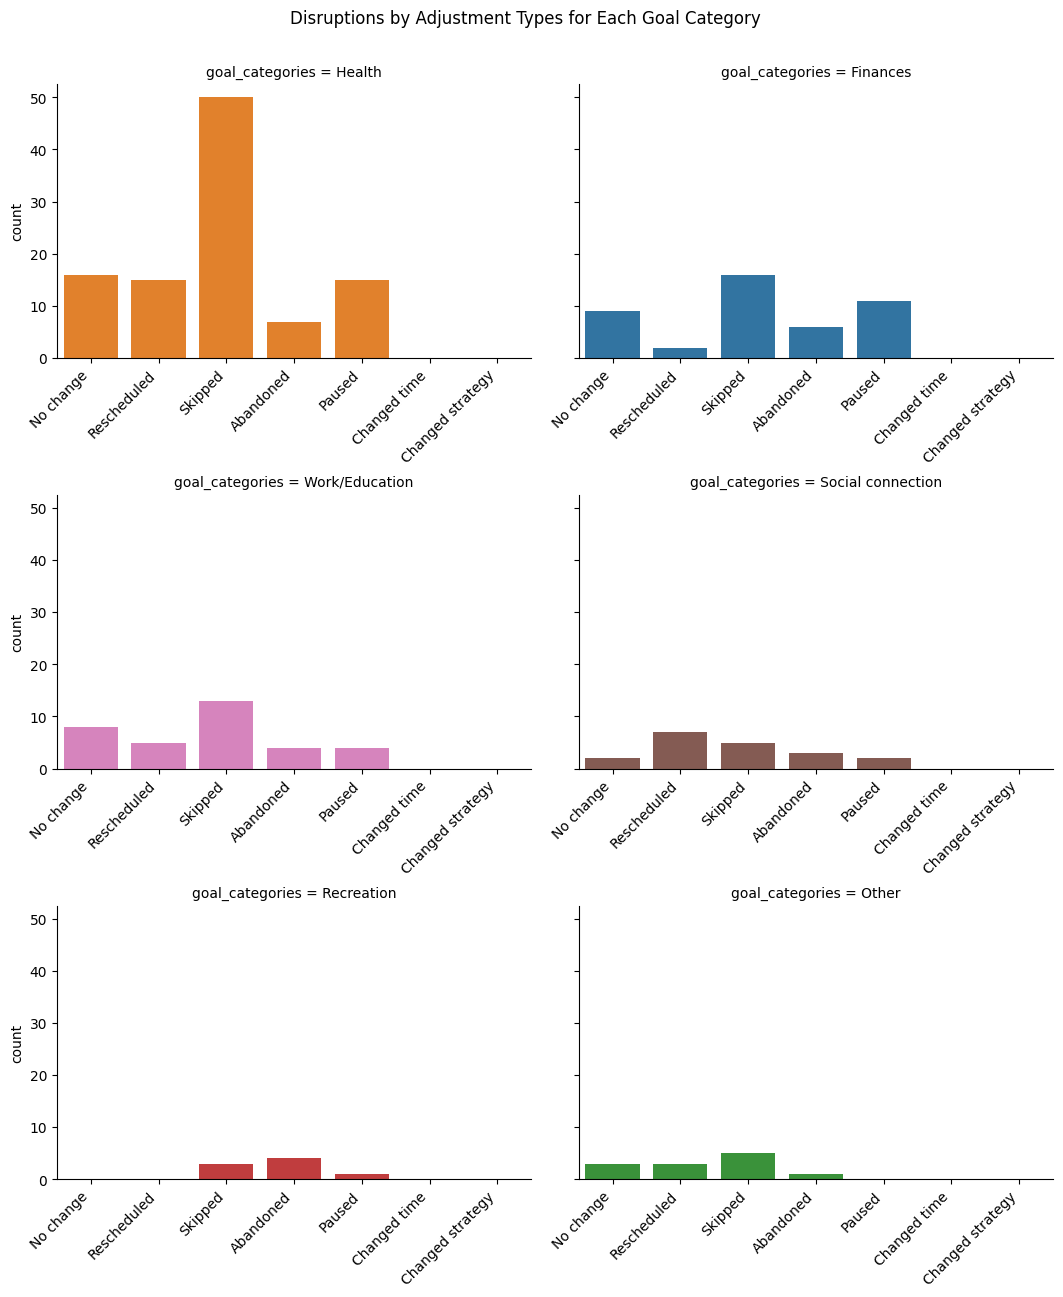

In [ ]:
pp_disruptions_changes_goaltype_combo = df[['pid', 'goal_categories','goal_changes', 'disruption_status']]


#filter out no disruptions
pp_disruptions_changes_goaltype_combo = pp_disruptions_changes_goaltype_combo[pp_disruptions_changes_goaltype_combo['disruption_status'] == 'Disruption']

#filter out no response
pp_disruptions_changes_goaltype_combo = pp_disruptions_changes_goaltype_combo[pp_disruptions_changes_goaltype_combo['goal_changes'] != 'No response']

#grouping [chronic and sleep] and [work and education]
pp_disruptions_changes_goaltype_combo['goal_categories'] = pp_disruptions_changes_goaltype_combo['goal_categories'].replace({
     'Manage chronic condition': 'Health',
    'Sleep': 'Health',
    'Physical Activity': 'Health',
    'Mental health and wellbeing': 'Health',
    'Weight management': 'Health',
    'Nutrition': 'Health',
    'Health - other': 'Health',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education',
    'Financial Stability/Safety': 'Finances',
    'Shopping': 'Finances',
    'Housing': 'Finances',
    'Screentime management': 'Other',
    'Cleaning/organizing' : 'Other'
})


pp_disruptions_changes_goaltype = pp_disruptions_changes_goaltype_combo[['pid', 'goal_changes', 'goal_categories']]

#filter out unique values
pp_disruptions_changes_goaltype = pp_disruptions_changes_goaltype[['pid','goal_categories','goal_changes']].drop_duplicates()

# Group by goal_categories and frequency and count the number of values
count_by_goal_changes = pp_disruptions_changes_goaltype.groupby(['goal_categories', 'goal_changes'])['pid'].count()
# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_changes_df = count_by_goal_changes.reset_index()

#rename
count_by_goal_changes_df.rename(columns={'pid': 'count'}, inplace=True)

# get label and set order
xlabels_order = ['No change', 'Rescheduled', 'Skipped','Abandoned','Paused', 'Changed time', 'Changed strategy']


count_by_goal_changes_df['goal_changes'] = pd.Categorical(count_by_goal_changes_df['goal_changes'], categories=xlabels_order, ordered=True)

#set order of plots
plot_order = ['Health', 'Finances', 'Work/Education','Social connection','Recreation','Other']

# Create a small multiple bar plot using seaborn
g = sns.catplot(x='goal_changes', y='count', hue='goal_categories', data=count_by_goal_changes_df, kind='bar', col='goal_categories', col_wrap=2, col_order=plot_order, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.93, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Adjustment Types for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order, rotation=45, ha='right')

plt.show()

## number of disruptions by type of burden created for each goal category

In [ ]:
pp_disruptions_burden_goaltype = df[['pid', 'goal_categories','disruption_labor_aggregated', 'disruption_status']]
#filter out no disruptions
pp_disruptions_burden_goaltype = pp_disruptions_burden_goaltype[pp_disruptions_burden_goaltype['disruption_status'] == 'Disruption']

# explode this column to ensure each disruption labor type is in a single row

pp_survey_data_exploded = pp_disruptions_burden_goaltype.assign(disruption_labor_split=pp_disruptions_burden_goaltype['disruption_labor_aggregated'].str.split(', ')).explode('disruption_labor_split')


# Filter out 'No response', 'No labor- positive disruption', 'Other' before unstacking
pp_survey_data_exploded = pp_survey_data_exploded[~pp_survey_data_exploded['disruption_labor_split'].isin(['No response','No labor- positive disruption','Other'])]

#grouping [chronic and sleep] and [work and education]
pp_survey_data_exploded['goal_categories'] = pp_survey_data_exploded['goal_categories'].replace({
    'Manage chronic condition': 'Health - other',
    'Sleep': 'Health - other',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education'
})

pp_survey_data_exploded = pp_survey_data_exploded[['pid', 'disruption_labor_split', 'goal_categories']]

#filter out unique values
pp_survey_data_exploded = pp_survey_data_exploded[['pid','goal_categories','disruption_labor_split']].drop_duplicates()

# Group by goal_categories and frequency and count the number of values
count_by_goal_burden = pp_survey_data_exploded.groupby(['goal_categories', 'disruption_labor_split'])['pid'].count()

print(count_by_goal_burden.to_string()) # Use .to_string() to display all rows of the DataFrame

goal_categories              disruption_labor_split
Cleaning/organizing          Emotional                  6
                             Logistical                 1
                             Physical                   4
Financial Stability/Safety   Emotional                 37
                             Financial                 25
                             Logistical                14
                             Physical                   6
Health - other               Emotional                  8
                             Financial                  1
                             Logistical                 4
                             Physical                   4
Housing                      Emotional                 12
                             Financial                  6
                             Logistical                 3
                             Physical                   1
Mental health and wellbeing  Emotional                 39
                    

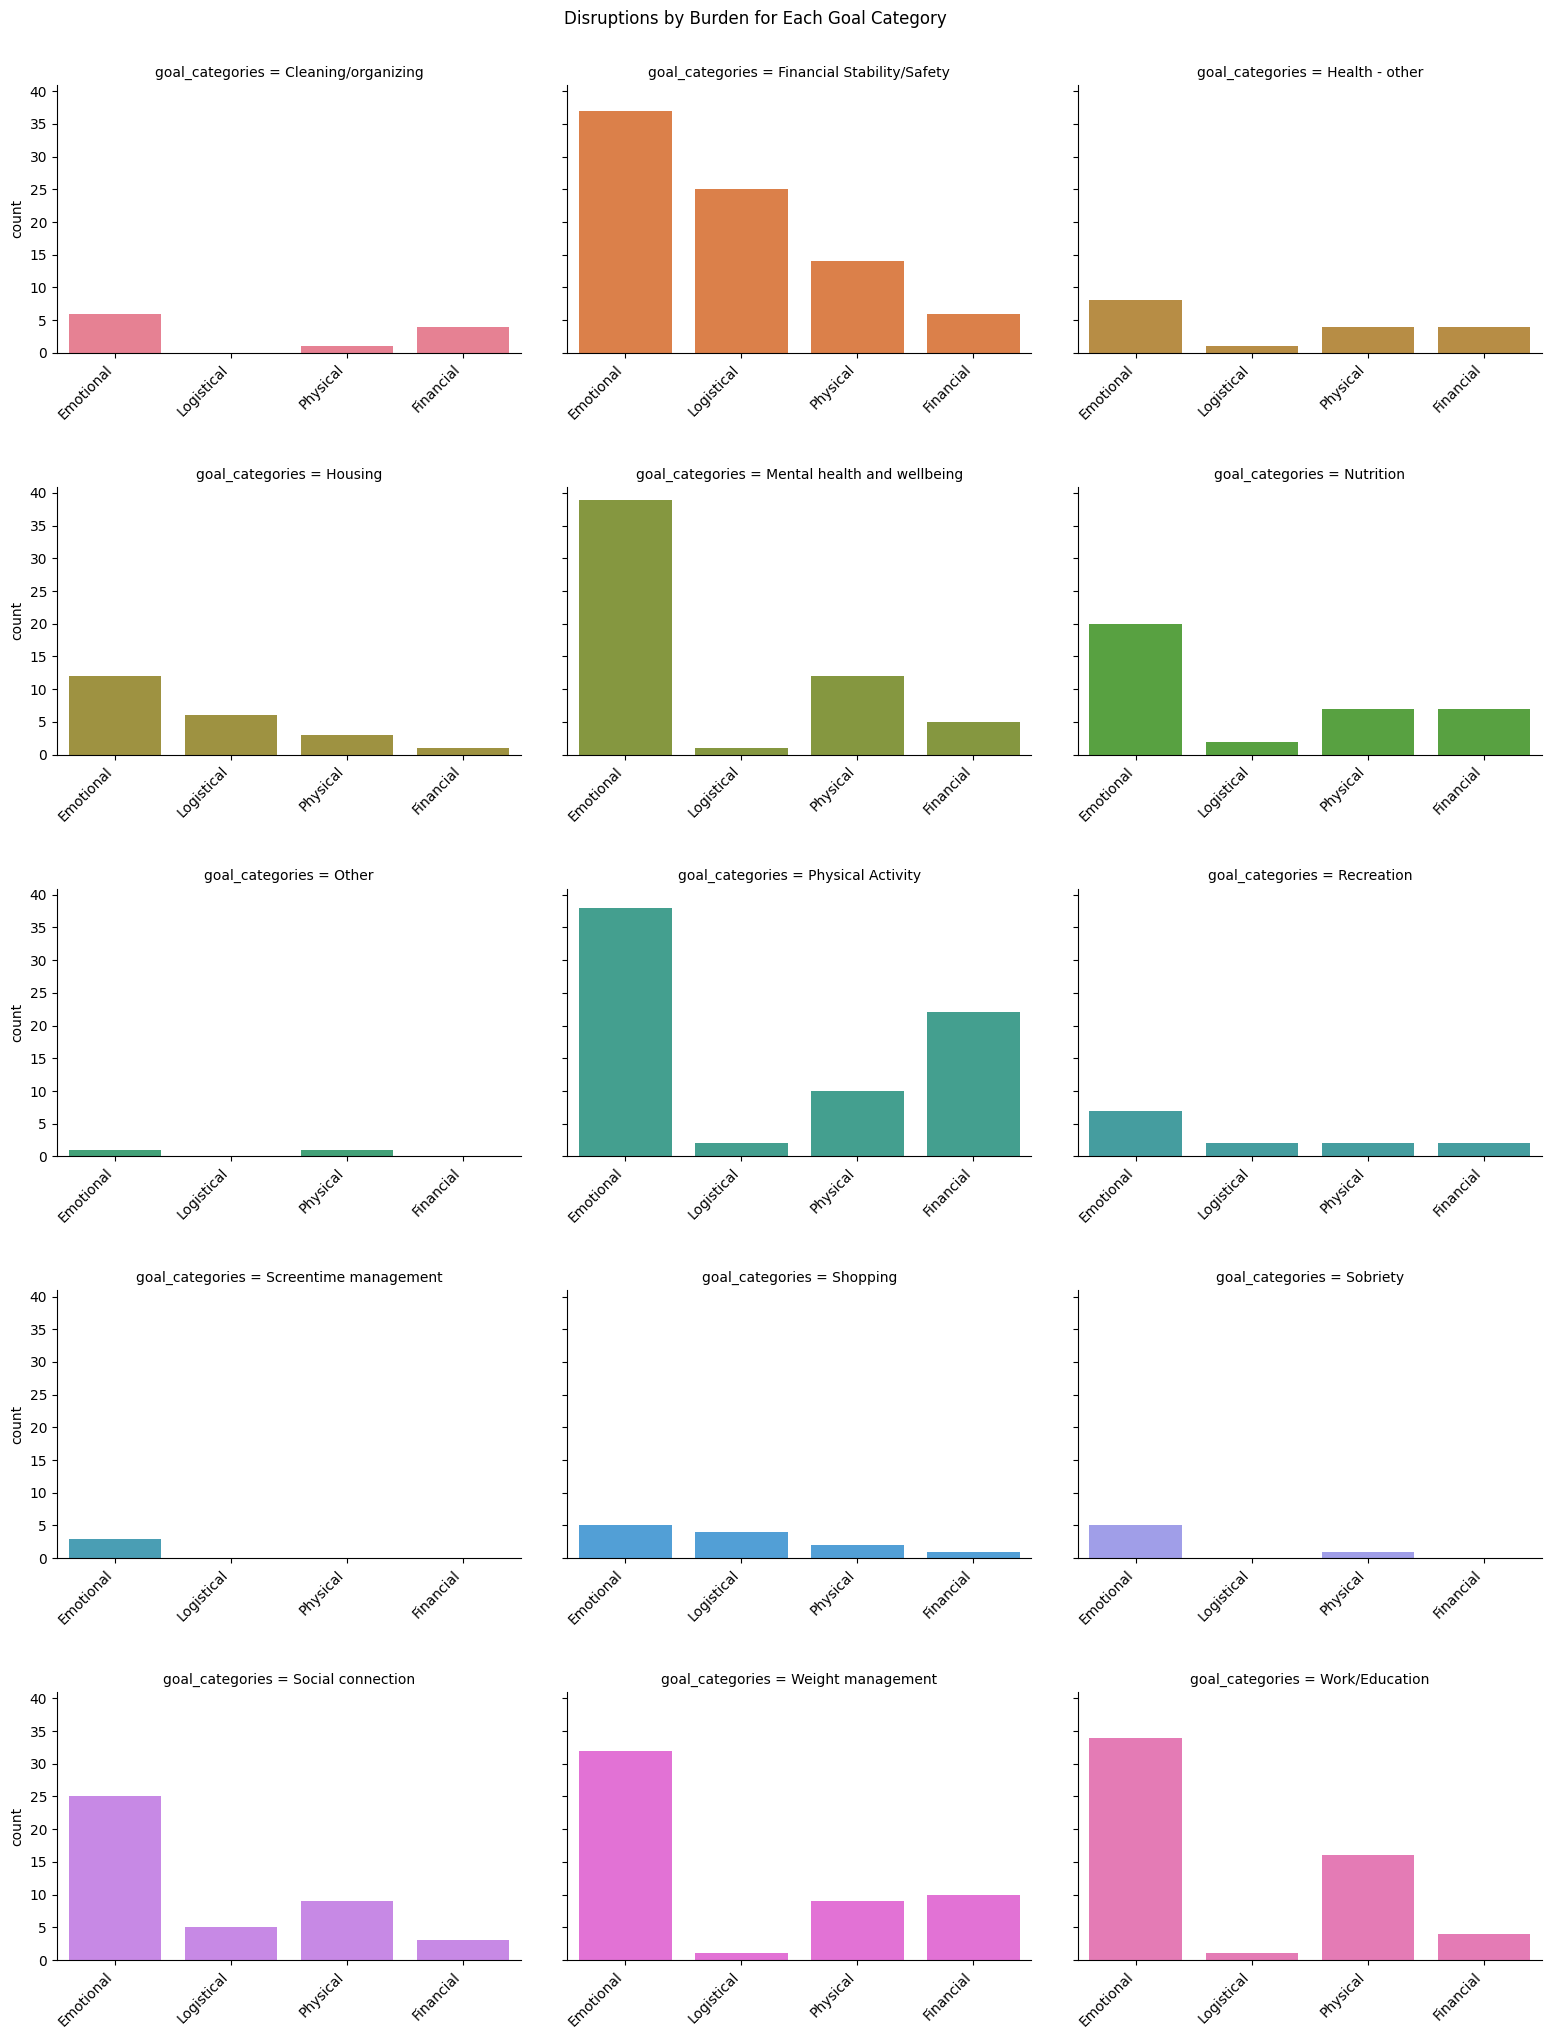

In [ ]:
# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_burden_df = count_by_goal_burden.reset_index()

#rename
count_by_goal_burden_df.rename(columns={'pid': 'count'}, inplace=True)


count_by_goal_burden_df['disruption_labor_split'] = pd.Categorical(count_by_goal_burden_df['disruption_labor_split'])

# get label and set order
xlabels_order = ['Emotional', 'Logistical', 'Physical','Financial']


# Create a small multiple bar plot using seaborn
g = sns.catplot(x='disruption_labor_split', y='count', hue='goal_categories', data=count_by_goal_burden_df, kind='bar', col='goal_categories', col_wrap=3, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Burden for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order,rotation=45, ha='right')

plt.show()

### combining goal categories

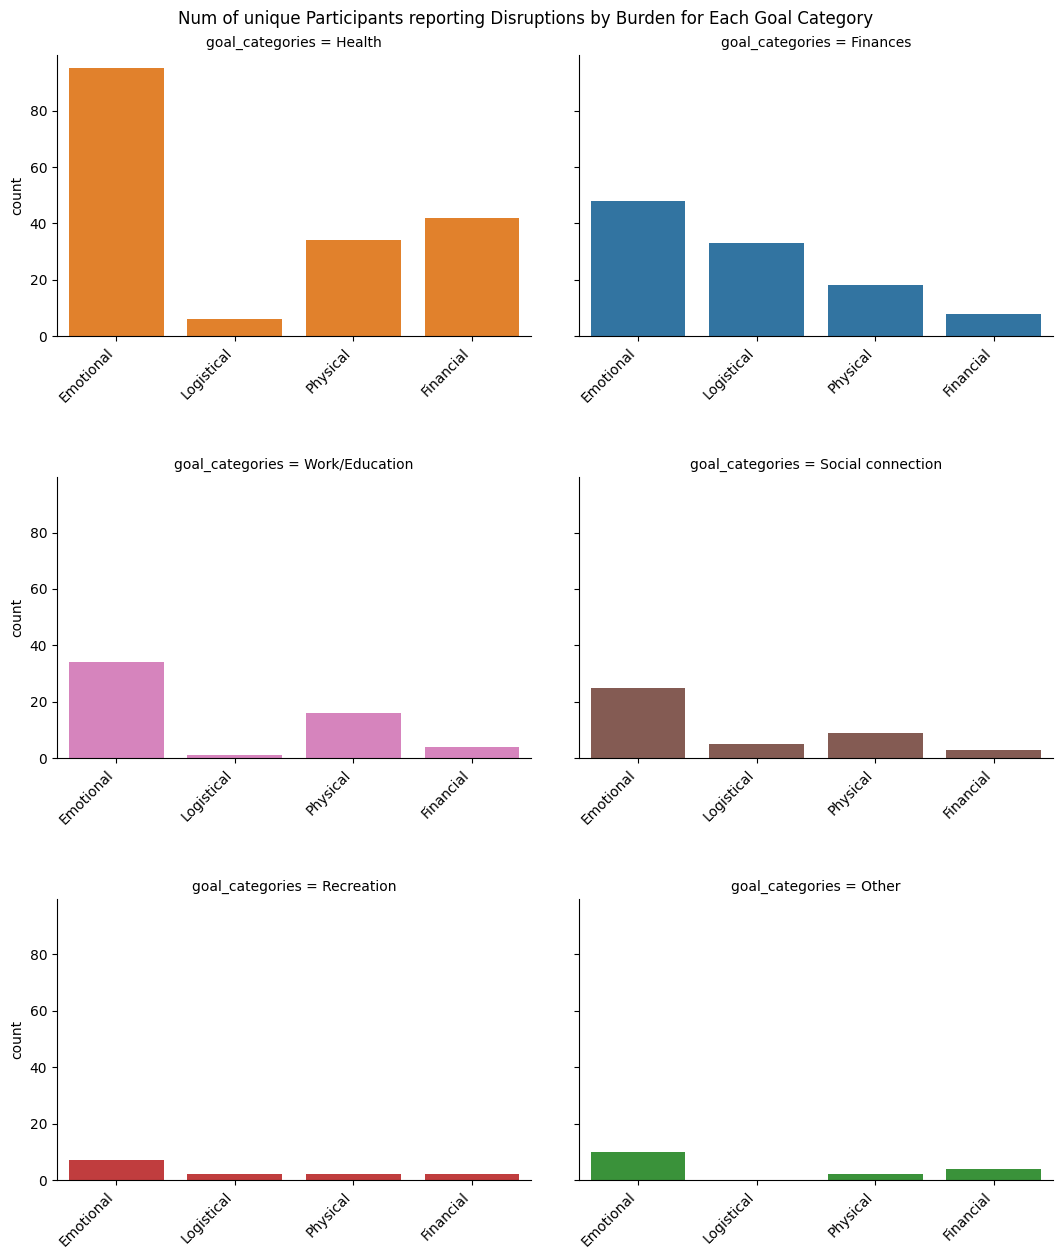

In [ ]:
pp_disruptions_burden_goaltype = df[['pid', 'goal_categories','disruption_labor_aggregated', 'disruption_status']]
#filter out no disruptions
pp_disruptions_burden_goaltype = pp_disruptions_burden_goaltype[pp_disruptions_burden_goaltype['disruption_status'] == 'Disruption']

# explode this column to ensure each disruption labor type is in a single row

pp_survey_data_exploded = pp_disruptions_burden_goaltype.assign(disruption_labor_split=pp_disruptions_burden_goaltype['disruption_labor_aggregated'].str.split(', ')).explode('disruption_labor_split')


# Filter out 'No response', 'No labor- positive disruption', 'Other' before unstacking
pp_survey_data_exploded = pp_survey_data_exploded[~pp_survey_data_exploded['disruption_labor_split'].isin(['No response','No labor- positive disruption','Other'])]

#grouping [chronic and sleep] and [work and education]
pp_survey_data_exploded['goal_categories'] = pp_survey_data_exploded['goal_categories'].replace({
         'Manage chronic condition': 'Health',
    'Sleep': 'Health',
    'Physical Activity': 'Health',
    'Mental health and wellbeing': 'Health',
    'Weight management': 'Health',
    'Nutrition': 'Health',
    'Health - other': 'Health',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education',
    'Financial Stability/Safety': 'Finances',
    'Shopping': 'Finances',
    'Housing': 'Finances',
    'Screentime management': 'Other',
    'Cleaning/organizing' : 'Other'
})

pp_survey_data_exploded = pp_survey_data_exploded[['pid', 'disruption_labor_split', 'goal_categories']]

#filter out unique values
pp_survey_data_exploded = pp_survey_data_exploded[['pid','goal_categories','disruption_labor_split']].drop_duplicates()

# Group by goal_categories and frequency and count the number of values
count_by_goal_burden = pp_survey_data_exploded.groupby(['goal_categories', 'disruption_labor_split'])['pid'].count()

# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_burden_df = count_by_goal_burden.reset_index()

#rename
count_by_goal_burden_df.rename(columns={'pid': 'count'}, inplace=True)


count_by_goal_burden_df['disruption_labor_split'] = pd.Categorical(count_by_goal_burden_df['disruption_labor_split'])

# get label and set order
xlabels_order = ['Emotional', 'Logistical', 'Physical','Financial']


#set order of plots
plot_order = ['Health', 'Finances', 'Work/Education','Social connection','Recreation','Other']

# Create a small multiple bar plot using seaborn
g = sns.catplot(x='disruption_labor_split', y='count', hue='goal_categories', data=count_by_goal_burden_df, kind='bar', col='goal_categories', col_wrap=2, col_order=plot_order, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Num of unique Participants reporting Disruptions by Burden for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order,rotation=45, ha='right')

plt.show()

## plotted as a % of total participants

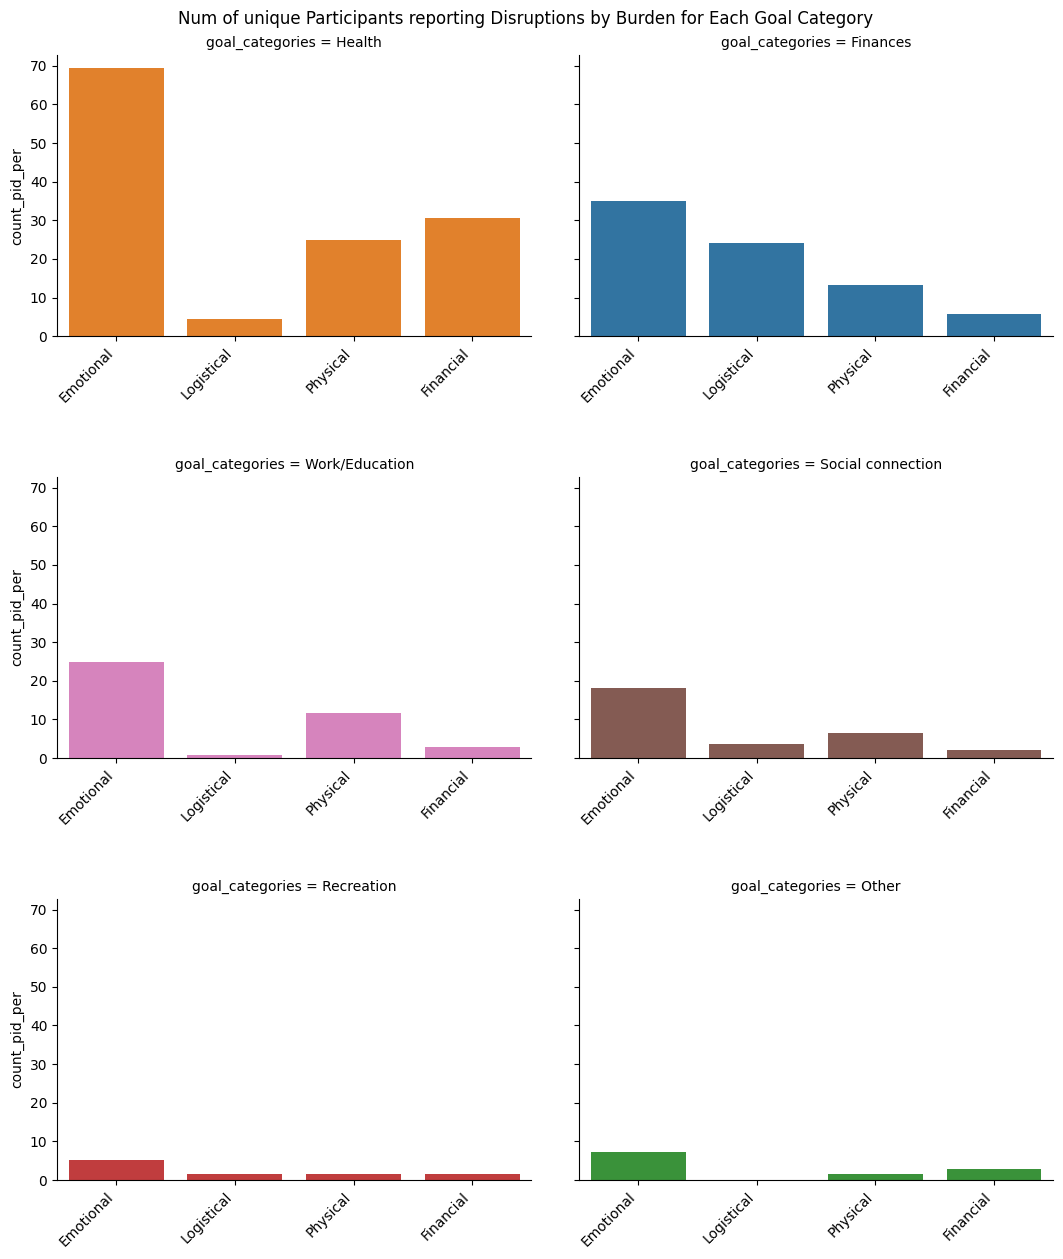

In [ ]:
pp_disruptions_burden_goaltype = df[['pid', 'goal_categories','disruption_labor_aggregated', 'disruption_status']]
#filter out no disruptions
pp_disruptions_burden_goaltype = pp_disruptions_burden_goaltype[pp_disruptions_burden_goaltype['disruption_status'] == 'Disruption']

# explode this column to ensure each disruption labor type is in a single row

pp_survey_data_exploded = pp_disruptions_burden_goaltype.assign(disruption_labor_split=pp_disruptions_burden_goaltype['disruption_labor_aggregated'].str.split(', ')).explode('disruption_labor_split')


# Filter out 'No response', 'No labor- positive disruption', 'Other' before unstacking
pp_survey_data_exploded = pp_survey_data_exploded[~pp_survey_data_exploded['disruption_labor_split'].isin(['No response','No labor- positive disruption','Other'])]

#grouping [chronic and sleep] and [work and education]
pp_survey_data_exploded['goal_categories'] = pp_survey_data_exploded['goal_categories'].replace({
         'Manage chronic condition': 'Health',
    'Sleep': 'Health',
    'Physical Activity': 'Health',
    'Mental health and wellbeing': 'Health',
    'Weight management': 'Health',
    'Nutrition': 'Health',
    'Health - other': 'Health',
    'Education/Learning': 'Work/Education',
    'Work/Career': 'Work/Education',
    'Financial Stability/Safety': 'Finances',
    'Shopping': 'Finances',
    'Housing': 'Finances',
    'Screentime management': 'Other',
    'Cleaning/organizing' : 'Other'
})

pp_survey_data_exploded = pp_survey_data_exploded[['pid', 'disruption_labor_split', 'goal_categories']]

#sum of pids for calculating % should be around 149
tot_pid=pp_survey_data_exploded['pid'].nunique()

#filter out unique values
pp_survey_data_exploded = pp_survey_data_exploded[['pid','goal_categories','disruption_labor_split']].drop_duplicates()

# Group by goal_categories and frequency and count the number of values
count_by_goal_burden = pp_survey_data_exploded.groupby(['goal_categories', 'disruption_labor_split'])['pid'].count()

# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_burden_df = count_by_goal_burden.reset_index()

#rename
count_by_goal_burden_df.rename(columns={'pid': 'count'}, inplace=True)

# add new column count_pid_per with count as a % of tot_pid
count_by_goal_burden_df['count_pid_per'] = count_by_goal_burden_df['count'] / tot_pid * 100


count_by_goal_burden_df['disruption_labor_split'] = pd.Categorical(count_by_goal_burden_df['disruption_labor_split'])

# get label and set order
xlabels_order = ['Emotional', 'Logistical', 'Physical','Financial']


#set order of plots
plot_order = ['Health', 'Finances', 'Work/Education','Social connection','Recreation','Other']

# Create a small multiple bar plot using seaborn
g = sns.catplot(x='disruption_labor_split', y='count_pid_per', hue='goal_categories', data=count_by_goal_burden_df, kind='bar', col='goal_categories', col_wrap=2, col_order=plot_order, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Num of unique Participants reporting Disruptions by Burden for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order,rotation=45, ha='right')

plt.show()

In [ ]:
# Convert the grouped data to a DataFrame for easier plotting
count_by_goal_burden_df = count_by_goal_burden.reset_index()

#rename
count_by_goal_burden_df.rename(columns={'pid*gid*cid': 'count'}, inplace=True)


count_by_goal_burden_df['disruption_labor_split'] = pd.Categorical(count_by_goal_burden_df['disruption_labor_split'])

# get label and set order
xlabels_order = ['Emotional', 'Logistical', 'Physical','Financial']

#set order of plots
plot_order = ['Health', 'Finances', 'Work/Education','Social connection','Recreation','Other']

# Create a small multiple bar plot using seaborn
g = sns.catplot(x='disruption_labor_split', y='count', hue='goal_categories', data=count_by_goal_burden_df, kind='bar', col='goal_categories', col_wrap=2, col_order=plot_order, sharex=False)
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.95, top=0.95, wspace=0.1, hspace=0.5)
g.fig.suptitle('Disruptions by Burden for Each Goal Category')
g._legend.remove()

# Iterate through the axes
for ax in g.axes.flat:
    ax.set_xlabel('')
    # Set tick positions before labels
    ax.set_xticks(range(len(xlabels_order)))
    ax.set_xticklabels(labels=xlabels_order,rotation=45, ha='right')

plt.show()

ValueError: Could not interpret value `count` for `y`. An entry with this name does not appear in `data`.